# Análise de personalidade de clientes

Nesse projeto será realizada uma aplicação de **machine learning** para a segmentação de clientes baseado na técnica de clusterização, cujo a abordagem utiliza um **modelo de aprendizado não-supervisionado** para dividir em agrupamentos os dados que possuam características diferentes.

## Estrutura de projeto

A estrutura **CRISP-DM** foi utilizada como base para desenvolver esse trabalho, realizando a seguinte metodologia:


    
<b>1. Definir o problema de negócio.</b><br>
<b>2. Coletar os dados e realizar análises preliminares dos mesmos.</b><br>
<b>3. Aplicar etapas de pré-processamento: filtragem, tratamentos de dados e criação de *features*.</b><br> 
<b>4. Realizar uma análise exploratória dos dados, detecção e remoção de outliers.</b><br>
<b>5. Preparação dos dados para o modelo. </b><br>
<b>6. Divisão de clusters.</b><br>
<b>7. Escolha do número ótimo de clusters.</b><br>
<b>8. Testes no modelo final, avaliação e interpretação dos resultados.</b><br>
<b>9. Implementar modelo.</b><br>

## Descrição do notebook

Neste notebook será realizada uma **análise exploratória inicial e aprofundada** sobre os dados (Etapas 1 à 4), com a finalidade de **extarir informações** valiosas para a determinação nos **padrões de comportamentos** que os clientes possuem.

# 1. Definição do problema de negócio.

Suponhamos que uma empresa está querendo promover **estratégias de marketing para o lançamento de um determinado produto** para todos as regiões disponíveis ao alcance almejando atingir **todo o seu público**, porém o custo de fabricação e transporte do produto podem não ter um retorno esperado em determinados setores, gerando assim uma **redução considerável na margem de lucro**. Um modelo capaz de ler a base de dados dos clientes e **segmentar em diversos grupos** com base em suas preferências e características, pode contornar gastos desnecessários direcionando as estratégias utilizando de informações adicionais que possam auxilar nas tomadas de decisões comerciais.
***
## 1.1 Quais os objetivos do projeto?
* **Objetivo Geral**:
    * Implementar um modelo que seja capaz de segmentar os clientes em grupos distintos para uma melhor tomada de decisões.
    
* **Objetivos Específicos**:
    * Agrupar corretamente, de forma que os grupos tenham características mais distintas possíveis, para evitar equívocos durante as implementações de estratégias de negócio.
    * Extrair informações que possam estar correlacionadas a cada agrupamento, realizando um resumo das principais características de cada grupo.
    * Oferecer estratégias para aplicação em cada grupo com base nos dados obtidos.
***
## 1.2 Quais os benefícios?

* **Organização e gestão de mercado mais eficiente**
* **Experiência personalizada para os grupos de consumidores**
* **Aumento da relação custo-benefício**


# Preparando bibliotecas e configurações do notebook

In [2]:
import sys
import os

# Caminho até a raiz do projeto
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Adiciona o caminho ao path
if project_root not in sys.path:
    sys.path.append(project_root)

from config import BASE_DIR


from config import BASE_DIR
sys.path.insert(0, BASE_DIR)

from src.preprocessing import *
from src.utils_EDA import *
from src.utils import *
from scipy import stats

%matplotlib inline


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test


# 2. Coleta e análise preliminar dos dados

In [3]:
set_graph_configs()

# Carregando dados
raw_path = f'{BASE_DIR}\\data\\raw\\marketing_campaign.csv'
df = carregar_dados(raw_path,parse_dates=['Dt_Customer'],sep='\t',drop_col=None)
df

c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\preprocessing.py:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(path, sep=sep, parse_dates=parse_dates)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-04-09       58       635  ...                  7   
1            1  2014-08-03       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-10-02       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-10-06       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

## Descrição dos dados
***
**Pessoal**
* ID: Número de identificação único do cliente;
* Year_Birth: Ano de nascimento;
* Education: Nível de escolaridade;
* Marital_Status: Estado civil;
* Income: Renda anual familiar;
* Kidhome: Número de crianças na residência do cliente;
* Teenhome: Número de adolescentes na residência do cliente;
* Dt_Customer: Data de cadastro do cliente na empresa;
* Recency: Número de dias desde a última compra do cliente;
* Complain: Indicação se o cliente reclamou pelo menos uma vez nos últimos 2 anos.
***
**Produtos**
* Pré-fixo **Mnt** indica a quantidade de dinheiro gasto com o produto nos últimos 2 anos:
    * MntWines: Gastos com vinho;
    * MntFruits: Gastos com frutas;
    * MntMeatProducts: Gastos com carnes;
    * MntFishProducts: Gastos com peixes;
    * MntSweetProducts: Gastos com doces;
    * MntGoldProds: Gastos com ouro.
***
**Promoções**
* NumDealsPurchases: Número de compras feitas com desconto;
* AcceptCmp1 - AcceptCmp5: Aceitação do cliente na oferta de N° correspondente ao sufixo (1 caso aceito, caso contrário 0);
* Response: Se o cliente aceitou a oferta na ultima campanha.
***
**Lugares**
* NumWebPurchases: Número de compras feitas pelo site da empresa;
* NumCatalogPurchases: Número de compras feitas usando um catálogo;
* NumStorePurchases: Número de compras feitas diretamente na loja;
* NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.
***
**Demais variáveis**

As variáveis Z_CostContact e Z_Revenue não foram documentadas informações que indicassem os seus significados ou importâncias das mesmas, posteriormente na análise exploratória será dada importância a tentar explicar essas variáveis, e se são relevantes para nosso objetivo. 

In [4]:
#Coletando informações gerais sobre o tipo de dados presentes nas features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
# Verificar a quantidade de valores únicos de cada feature
df.nunique().sort_values(ascending=False)

ID                     2240
Income                 1974
MntWines                776
Dt_Customer             663
MntMeatProducts         558
MntGoldProds            213
MntFishProducts         182
MntSweetProducts        177
MntFruits               158
Recency                 100
Year_Birth               59
NumWebVisitsMonth        16
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
Marital_Status            8
Education                 5
Teenhome                  3
Kidhome                   3
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

* Insigths:
    * Todas as colunas de ID são diferentes, indicando que o cliente não aparece duas vezes no mesmo conjunto de dados.
    * Os dados de Z_CostContact e Z_Revenue possuem um único valor para todo o conjunto de dados analisado, logo não serão úteis para explicar a variância dos dados e podem ser desconsiderados para essa amostra. 

In [6]:
#Análise dos valores categóricos do cliente
categorical_personal = ['Marital_Status', 'Education']
qtd_cat_distintas(df, categorical_personal)

----------------------------------------------------------------------
Valores distintos e suas quantidades para a variável "Marital_Status"
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------
Valores distintos e suas quantidades para a variável "Education"
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [7]:
#Análise inicial da distribuição dos dados
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

# 3 Pré-processamento

## 3.1 Filtragem e tratamento de dados

In [8]:
# Remoção das colunas Z_CostContact e Z_Revenue e demais colunas consideradas irrelevantes
df_preprocess = preprocess_data(df,['Z_CostContact', 'Z_Revenue', 'ID'],verbose=True)
df_preprocess

As colunas nulas e seu percentual são:
Income    1.071 %
dtype: object
Um total de 24 linhas (clientes) foram removidas.


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     2012-04-09       58       635         88  ...                   10   
1     2014-08-03       38        11          1  ...                    1   
2     2013-08-21       26       426         49  ...                    2   
3     2014-10-02       26        11          4  ...                    0   
4     2014-01-19       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2235  2013-06-13       46       709         43  ...                    3   
2236  2014-10-06       56       406          0  ...                    2   
2237  2014-01-25       91       908         48  ...                    3   
2238  2014-01-24        8       428         30  ...                    5   
2239  2012-10-15       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2216 rows x 26 columns]

Foi optado por **não remover as duplicatas**, tendo em vista que elas podem indicar que para determinada combinação de valores um peso adicional é acrescido por conta disso. Isso significa que os valores similares não se tornam redundantes na hora de realizar a divisão de agrupamentos, **reforçando a idéia de que determinada combinação pertence a determinado cluster**.

Com o percentual baixo para os dados faltantes, a estratégia implementada para contornar a situação é a eliminação desses dados.

## 3.2 Feature Engineering (Criação de features)

In [9]:
df_feature, df_feature_cat = feature_engineering(df_preprocess)
df_feature_cat.head()

Education   Income  Kidhome  Teenhome    Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0    2 Meses       635         88   
1      Graduate  46344.0        1         1    2 Meses        11          1   
2      Graduate  71613.0        0         0      1 Mes       426         49   
3      Graduate  26646.0        1         0      1 Mes        11          4   
4  Postgraduate  58293.0        1         0  > 3 Meses       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Response  Promos_Total         Age  Dependants  Has_minor  Partner  \
0         1             0      Idosos           0          0        1   
1         0             0      Idosos           2          1        1   
2         0             0  Meia-idade           0          0        1   
3         0             0     Adultos           1          1        1   
4         0             0     Adultos           1          1        0   

   House_members  Income_per_members  Total_spent  
0              2             29069.0         1617  
1              4             11586.0           27  
2              2             35806.5          776  
3              3              8882.0           53  
4              2             29146.5          422  

[5 rows x 31 columns]

Novas features criadas:

- Promos_Total: Quantidade de promoções aceitas
- Dependants: N° de menores de idade presentes
- Partner: Status de relacionamento atual (solteiro ou não)
- House_members: Quantidade de pessoas residindo com o cliente
- Income_per_members: Renda per capita na residência do cliente
- Total_spent: Gastos totais
- Education: Dividida entre Undergraduates, Graduates e Postgraudates.

Os valores numéricos foram colocados em formas de dados categóricos para uma visualização mais compacta dos dados, sendo as mudanças nas features:

* A **idade** foi classificada como
    * 0-19: Jovens
    * 20-45: Adultos
    * 45-59: Meia-idade
    * 60+ : Idosos

* **Recency** foi classificada em:
    * Menos de um mês (variável: 1 Mes)
    * De 1 até 2 meses (variável: 2 Mes)
    * De 2 até 3 meses (variável: 3 Mes)
    * Maior que 3 meses (variável: > 3 Mes)

# 4 Análise exploratória dos dados

## 4.1 Análises univariadas

Será realizada uma análise nas distribuições dos dados em cima de cada feature de **forma individual**.

### 4.1.1 Dados categóricos

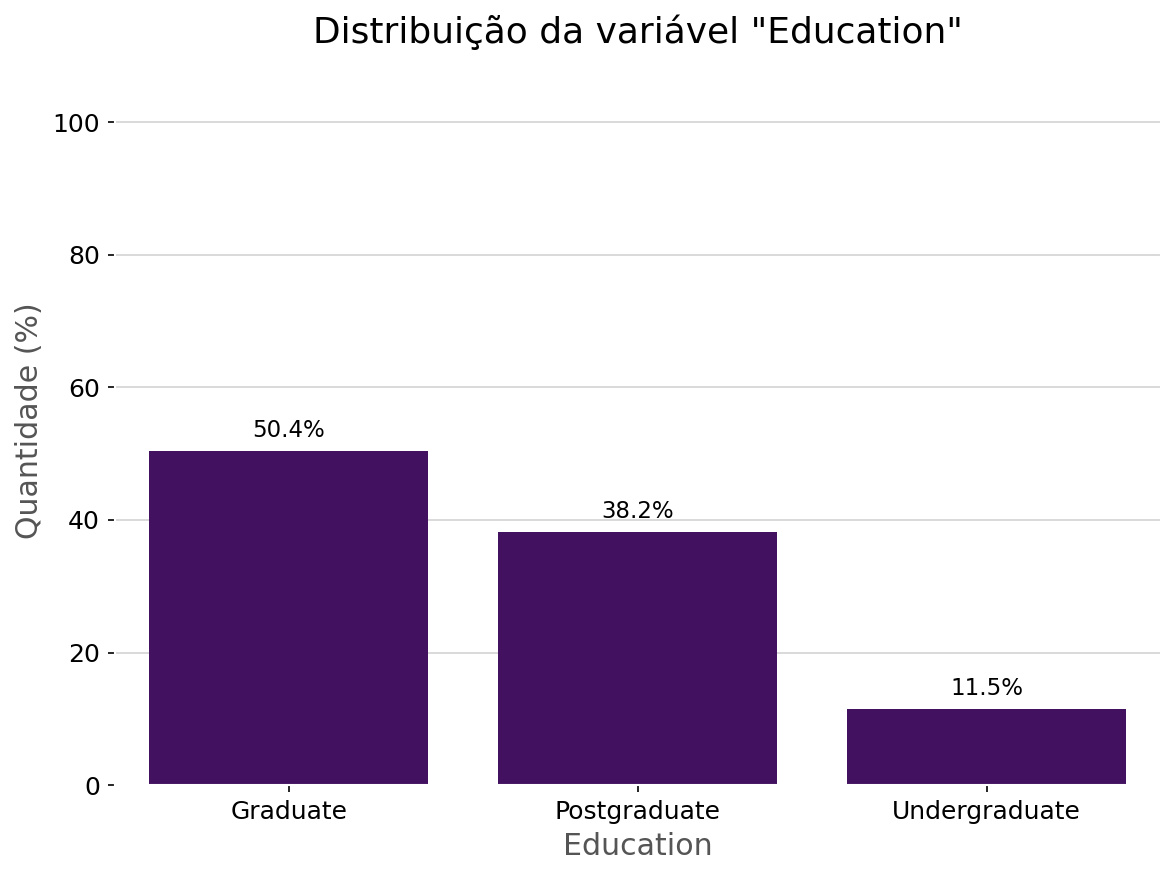

-----------------------------------------------------------------------------------------------------------------------------


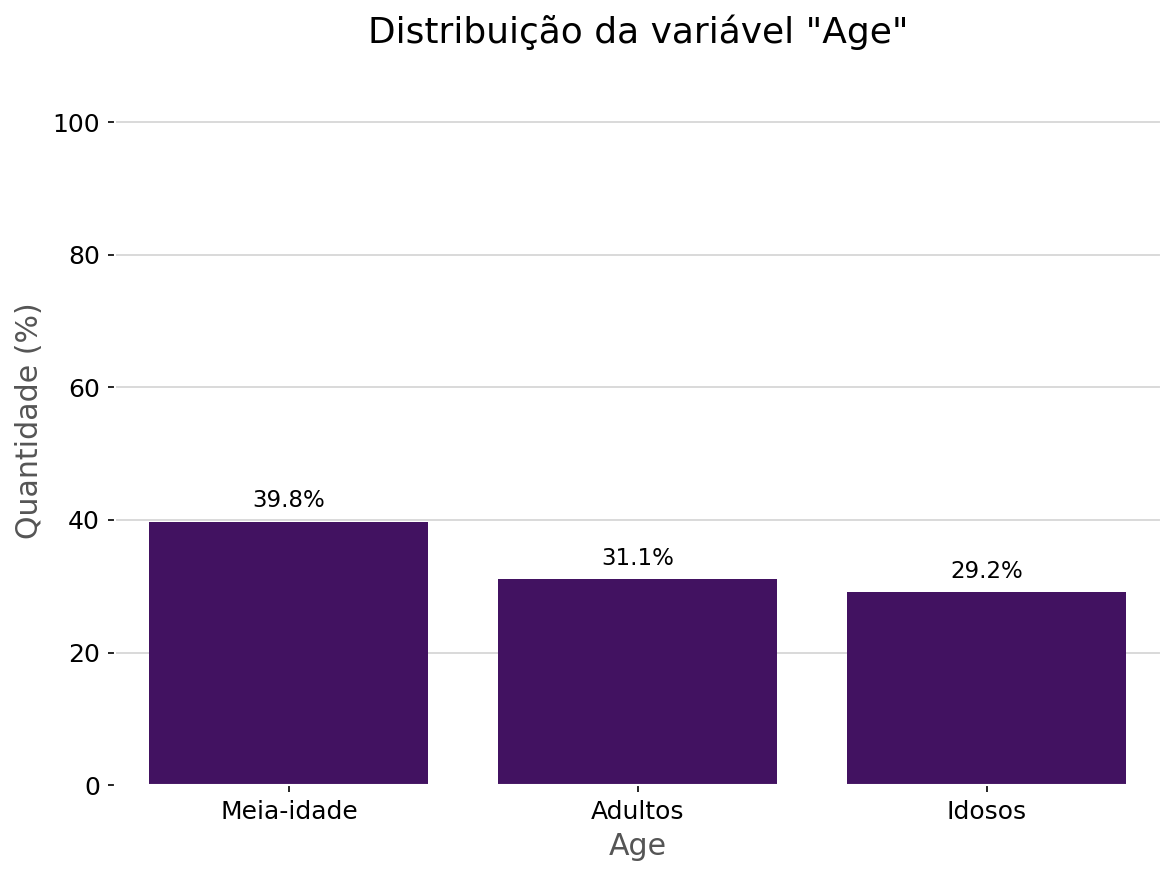

-----------------------------------------------------------------------------------------------------------------------------


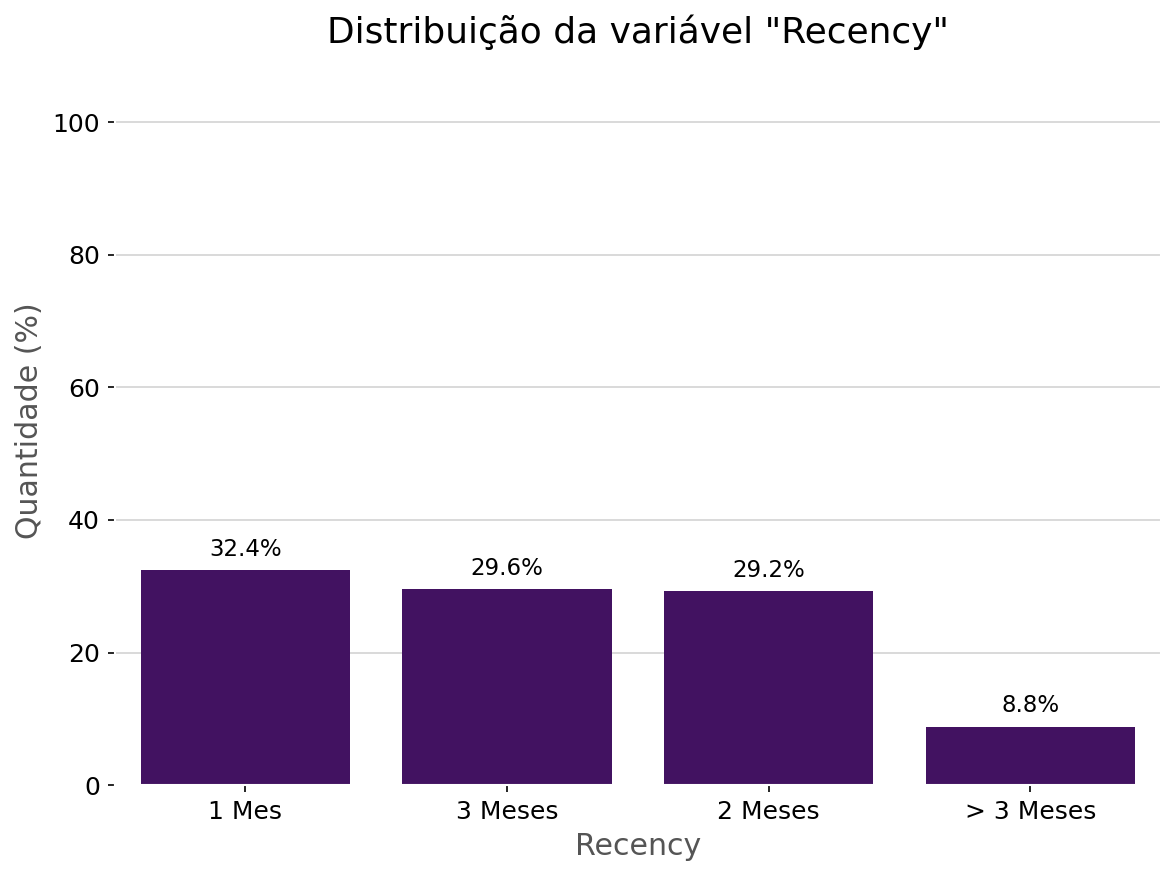

-----------------------------------------------------------------------------------------------------------------------------


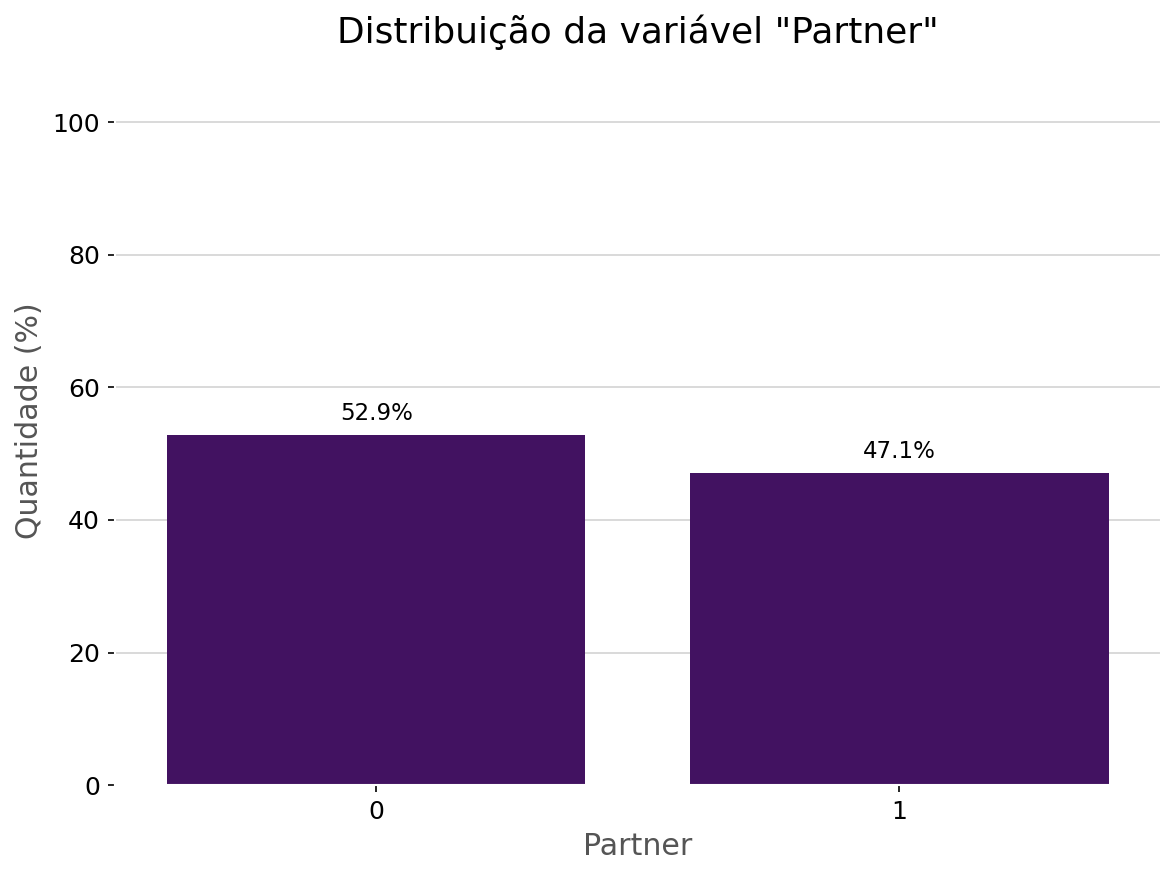

-----------------------------------------------------------------------------------------------------------------------------


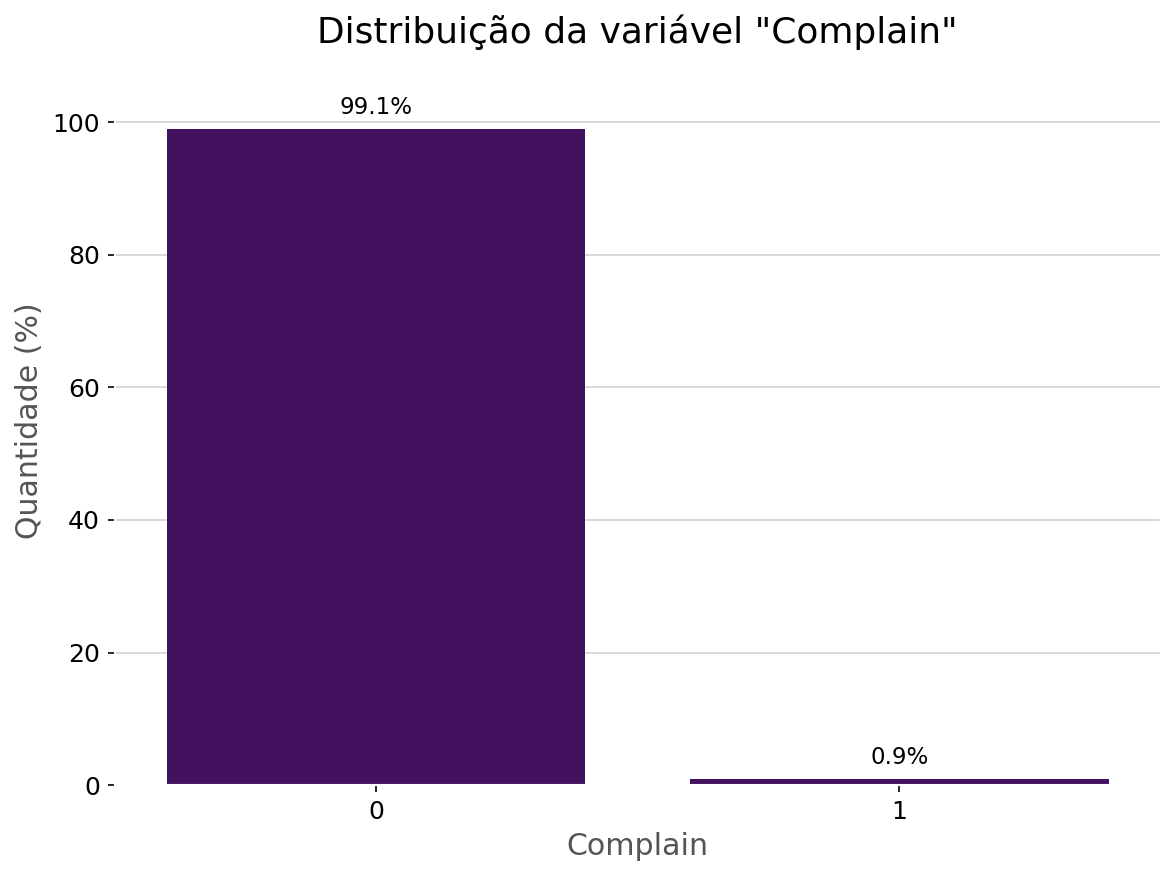

-----------------------------------------------------------------------------------------------------------------------------


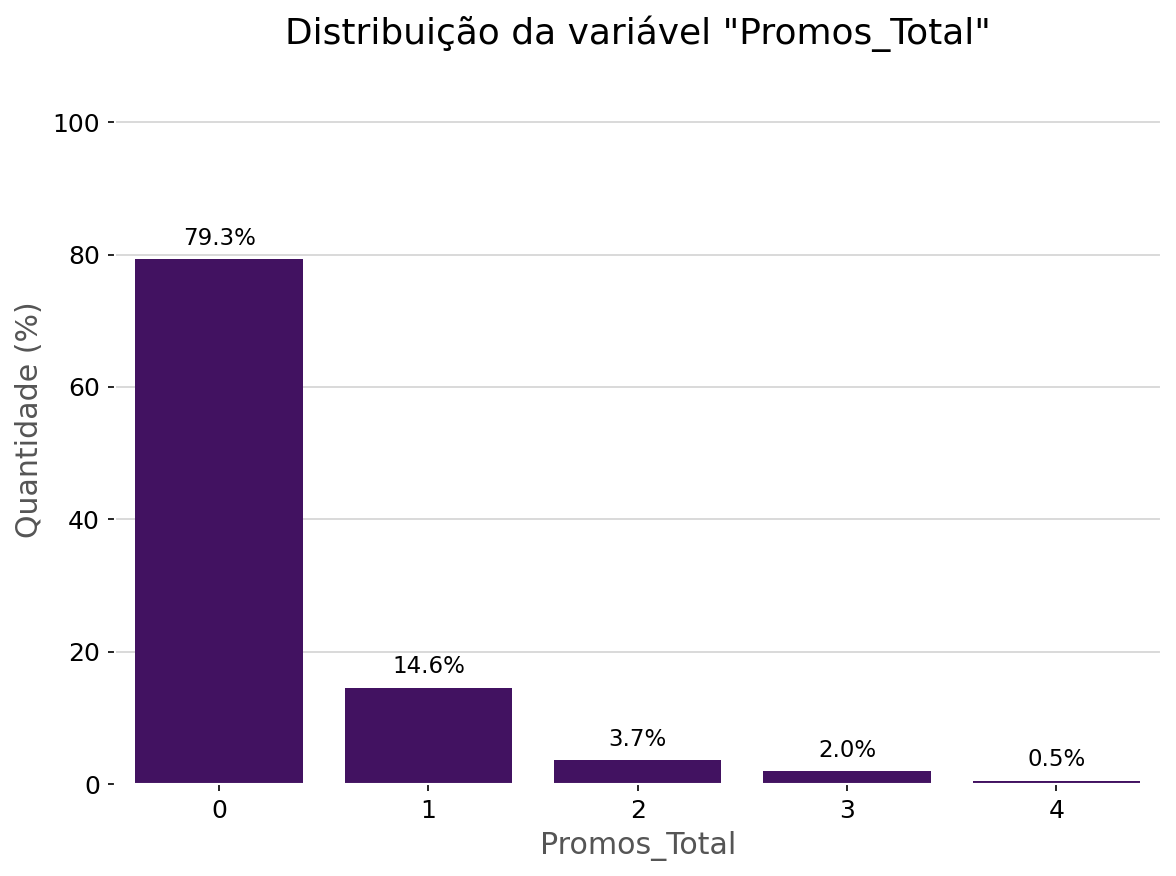

-----------------------------------------------------------------------------------------------------------------------------


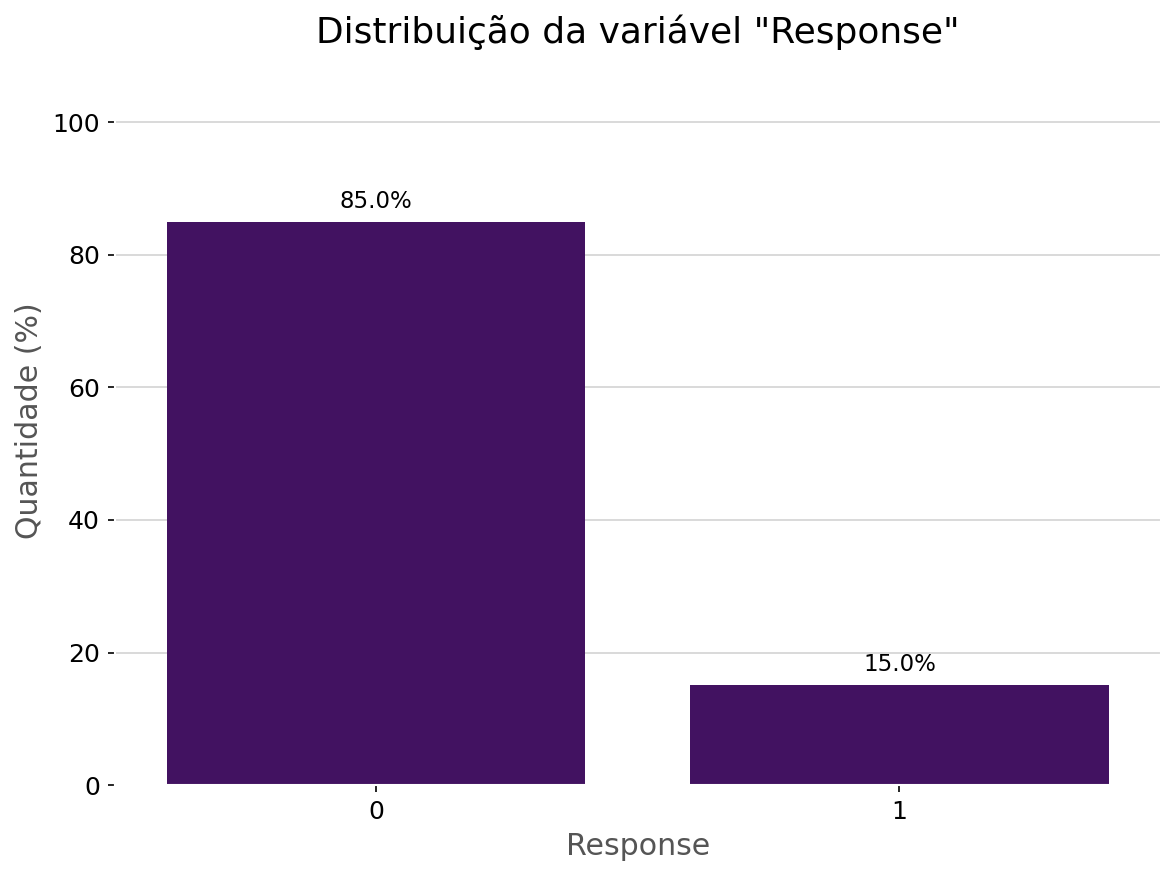

-----------------------------------------------------------------------------------------------------------------------------


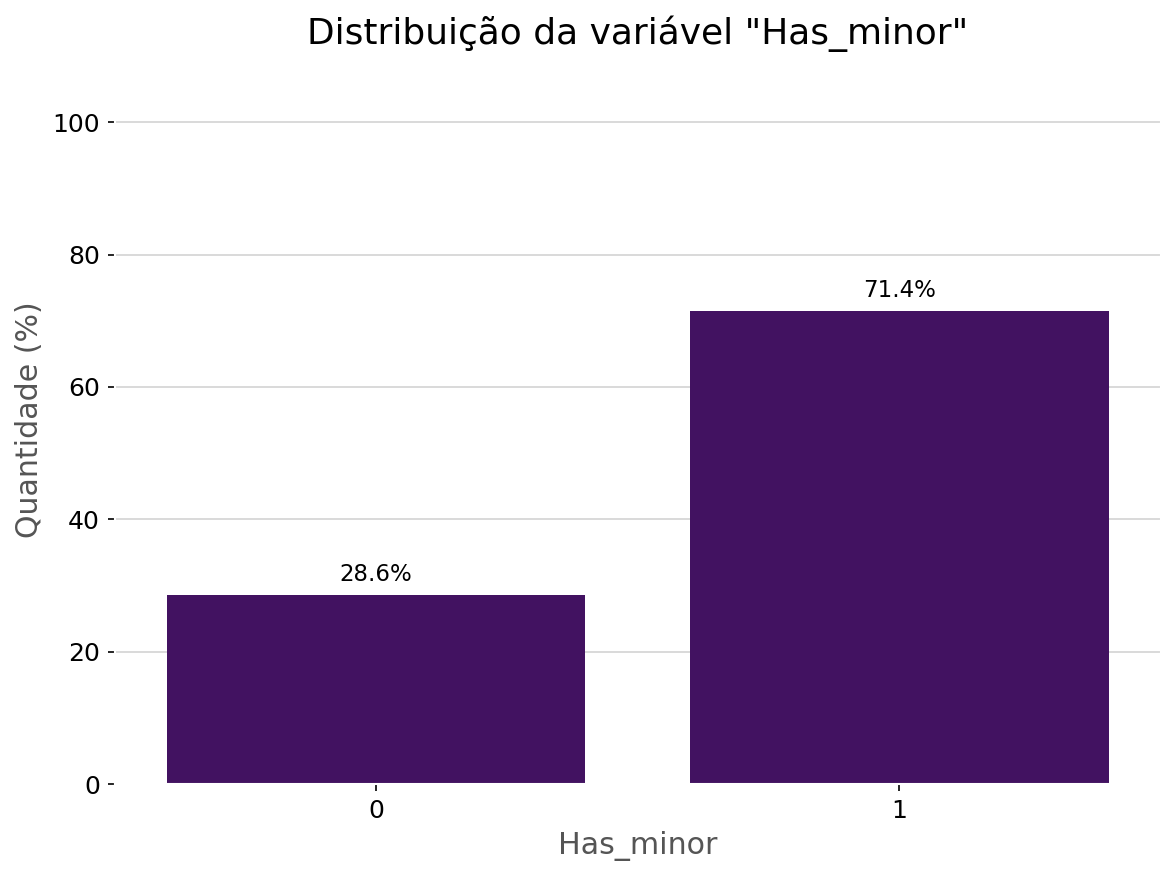

-----------------------------------------------------------------------------------------------------------------------------


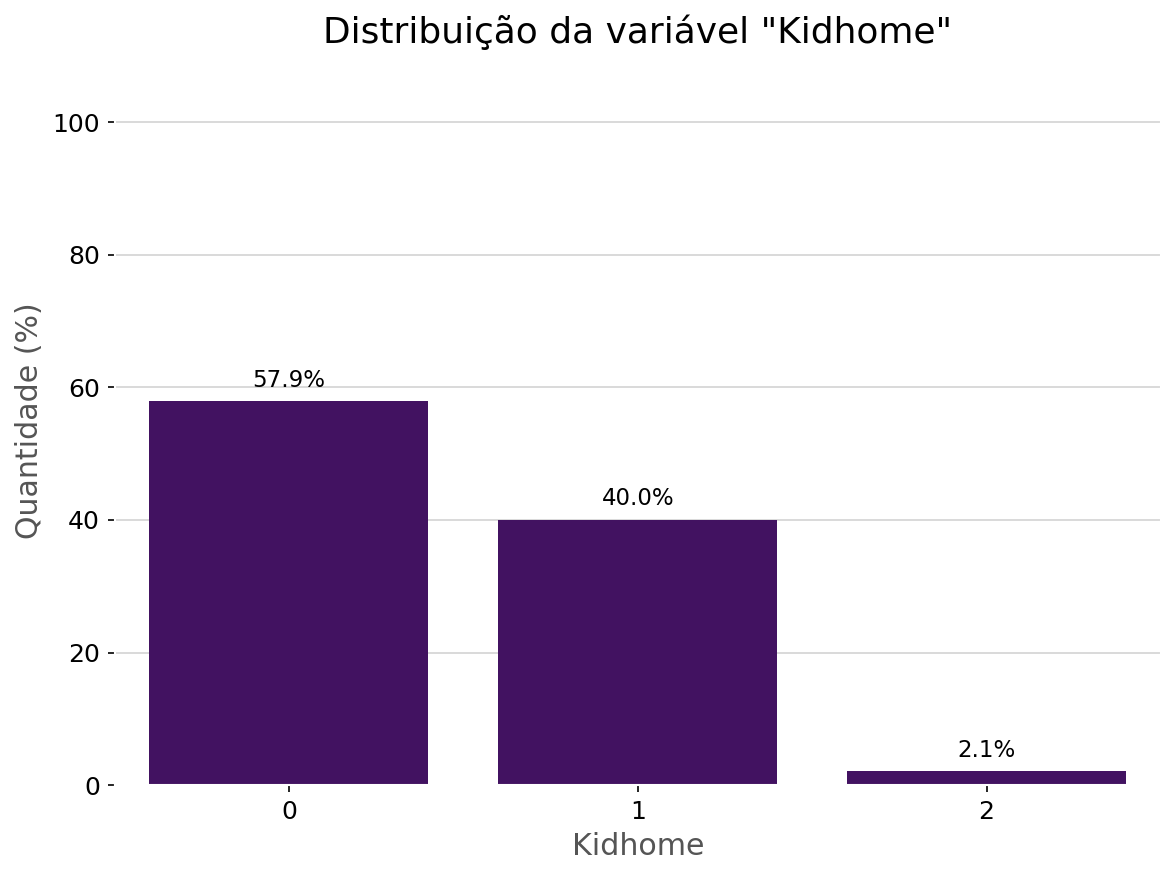

-----------------------------------------------------------------------------------------------------------------------------


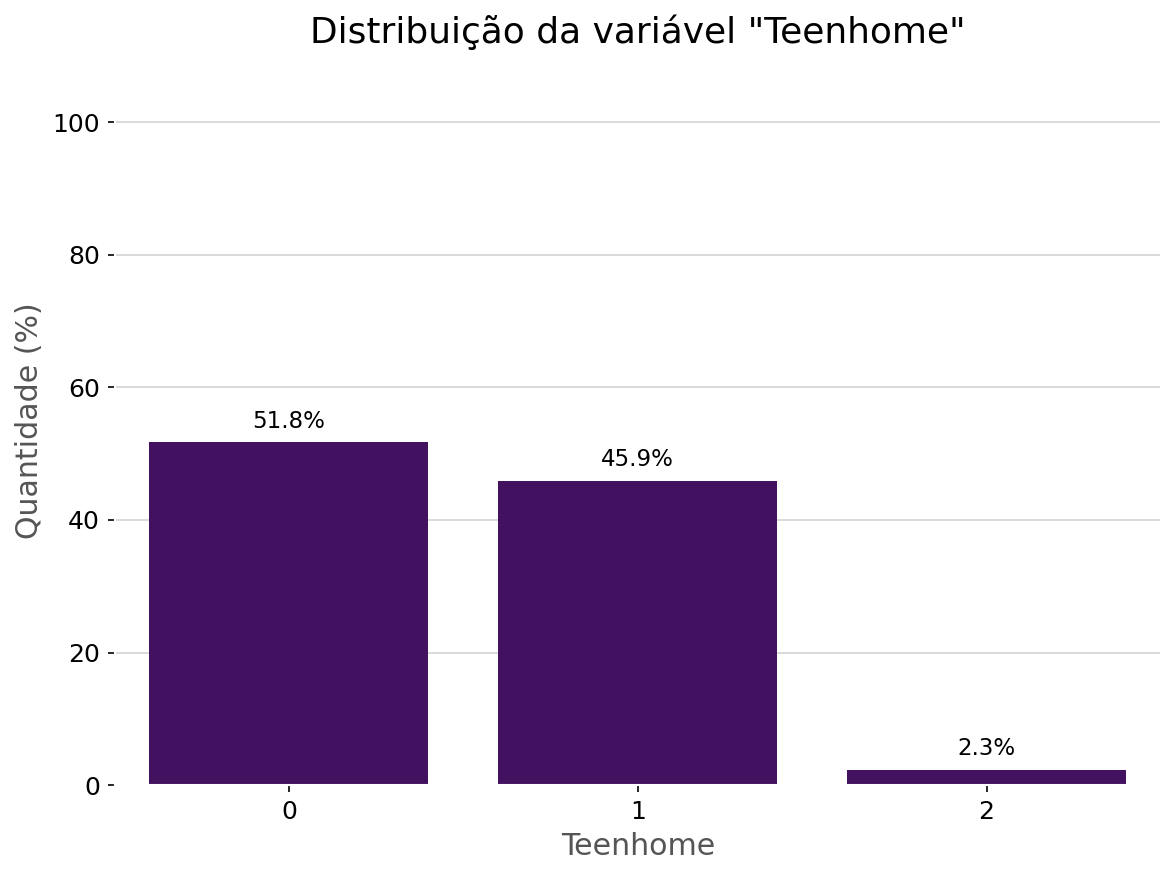

-----------------------------------------------------------------------------------------------------------------------------


In [10]:
lista_categoricas = ['Education', 'Age', 'Recency', 'Partner',
                     'Complain', 'Promos_Total', 'Response',
                     'Has_minor', 'Kidhome', 'Teenhome']

graph_categorical(df_feature_cat, lista_categoricas)


* Insights:
1. **O nível de escolaridade da maioria dos clientes é a graduação**, seguido por pós-graduados e com uma parcela inferior os não graduados.

2. O período **desde a última compra dos clientes** está bem distribuido entre os períodos de **menores que 1 mês, entre 1-2 e entre 2-3 meses**, com menores proporções (8.8%) de ocorrências em intervalos de compra **maiores que 3 meses**.


3. As idades de cadastro na empresa como cliente são mais levemente mais frequentes **(39.8%)** no grupo de pessoas com uma **meia-idade** em relação as outras faixas etárias adotadas.

4. Percebe-se que há divisão ao limiar do balanço entre a classe "Partner", onde **52.9% dos consumidores não possuem parceiros em relacionamentos**.
5. Uma **taxa de reclamações** vinda dos consumidores é **extremamente baixa**, em que apenas **0.9%** abriram pedidos de reclamação.
6. Os proporção entre consumidores que aceitaram pelo menos uma das propostas de desconto, indica que **mais de 2/3 dos clientes não aceitaram nenhuma das ofertas**, seguido por **14.6%** aceitarem em **pelo menos uma** das 5 ofertas oferecidas, e os demais totalizando cerca de **6.2%** dos clientes **aceitaram mais de uma oferta**.
7. Cerca de **15%** dos clientes **aceitaram as últimas ofertas** realizada à eles.
8. A proporção de pessoas com **pelo menos um menor de idade** é de **71.4%** em relação ao conjunto de dados total.
9. A quantidade de clientes que possuem **mais de 2** adolescentes ou crianças é baixa, **2.3% e 2.1% respectivamente**.

### 4.1.2 Dados numéricos

c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


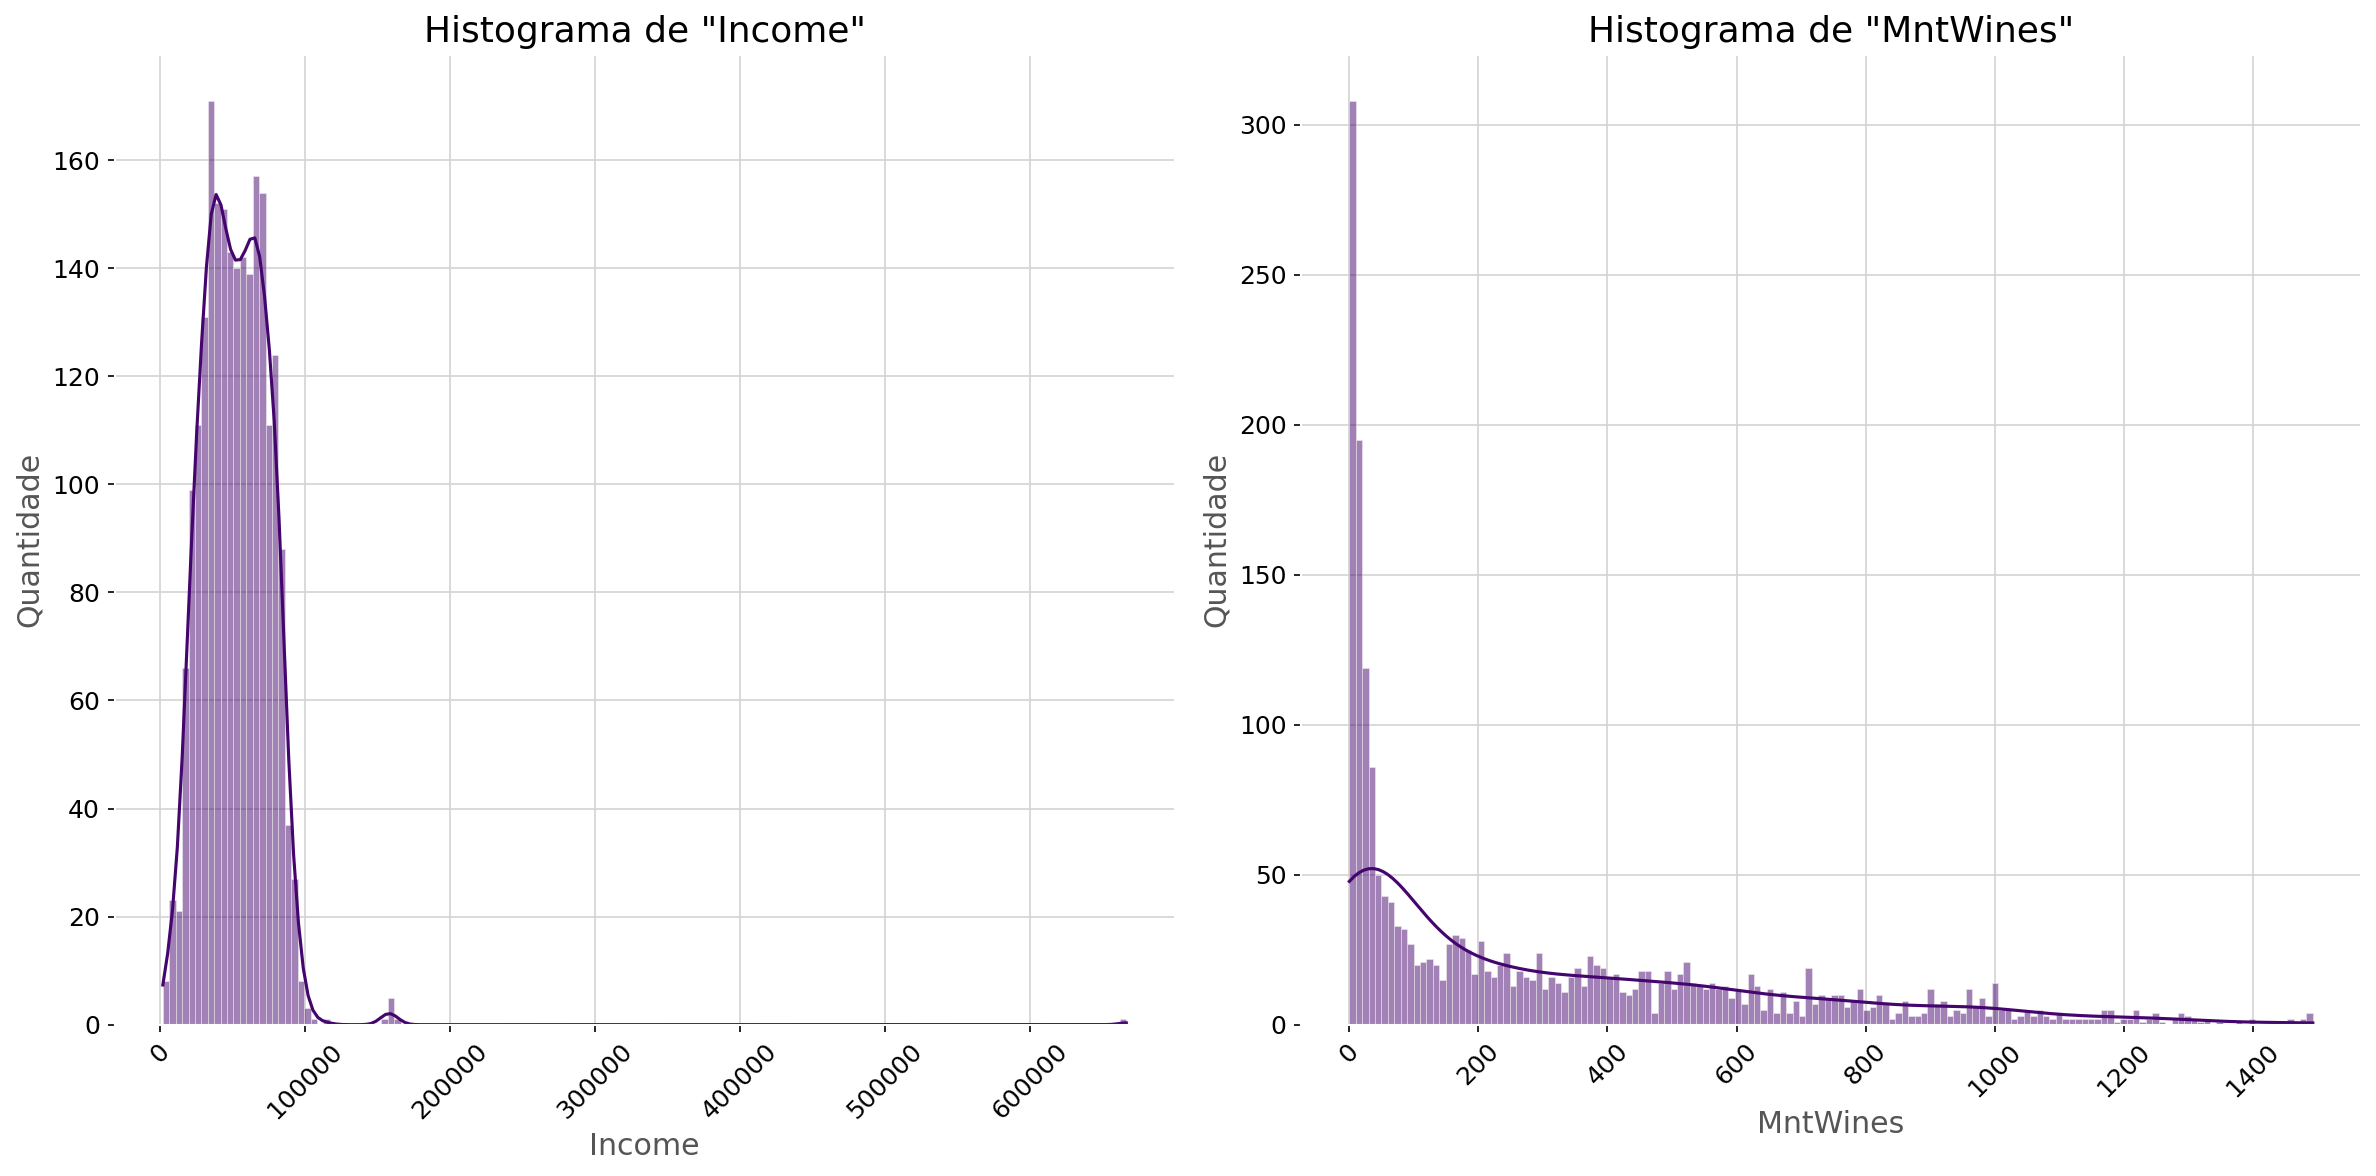

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


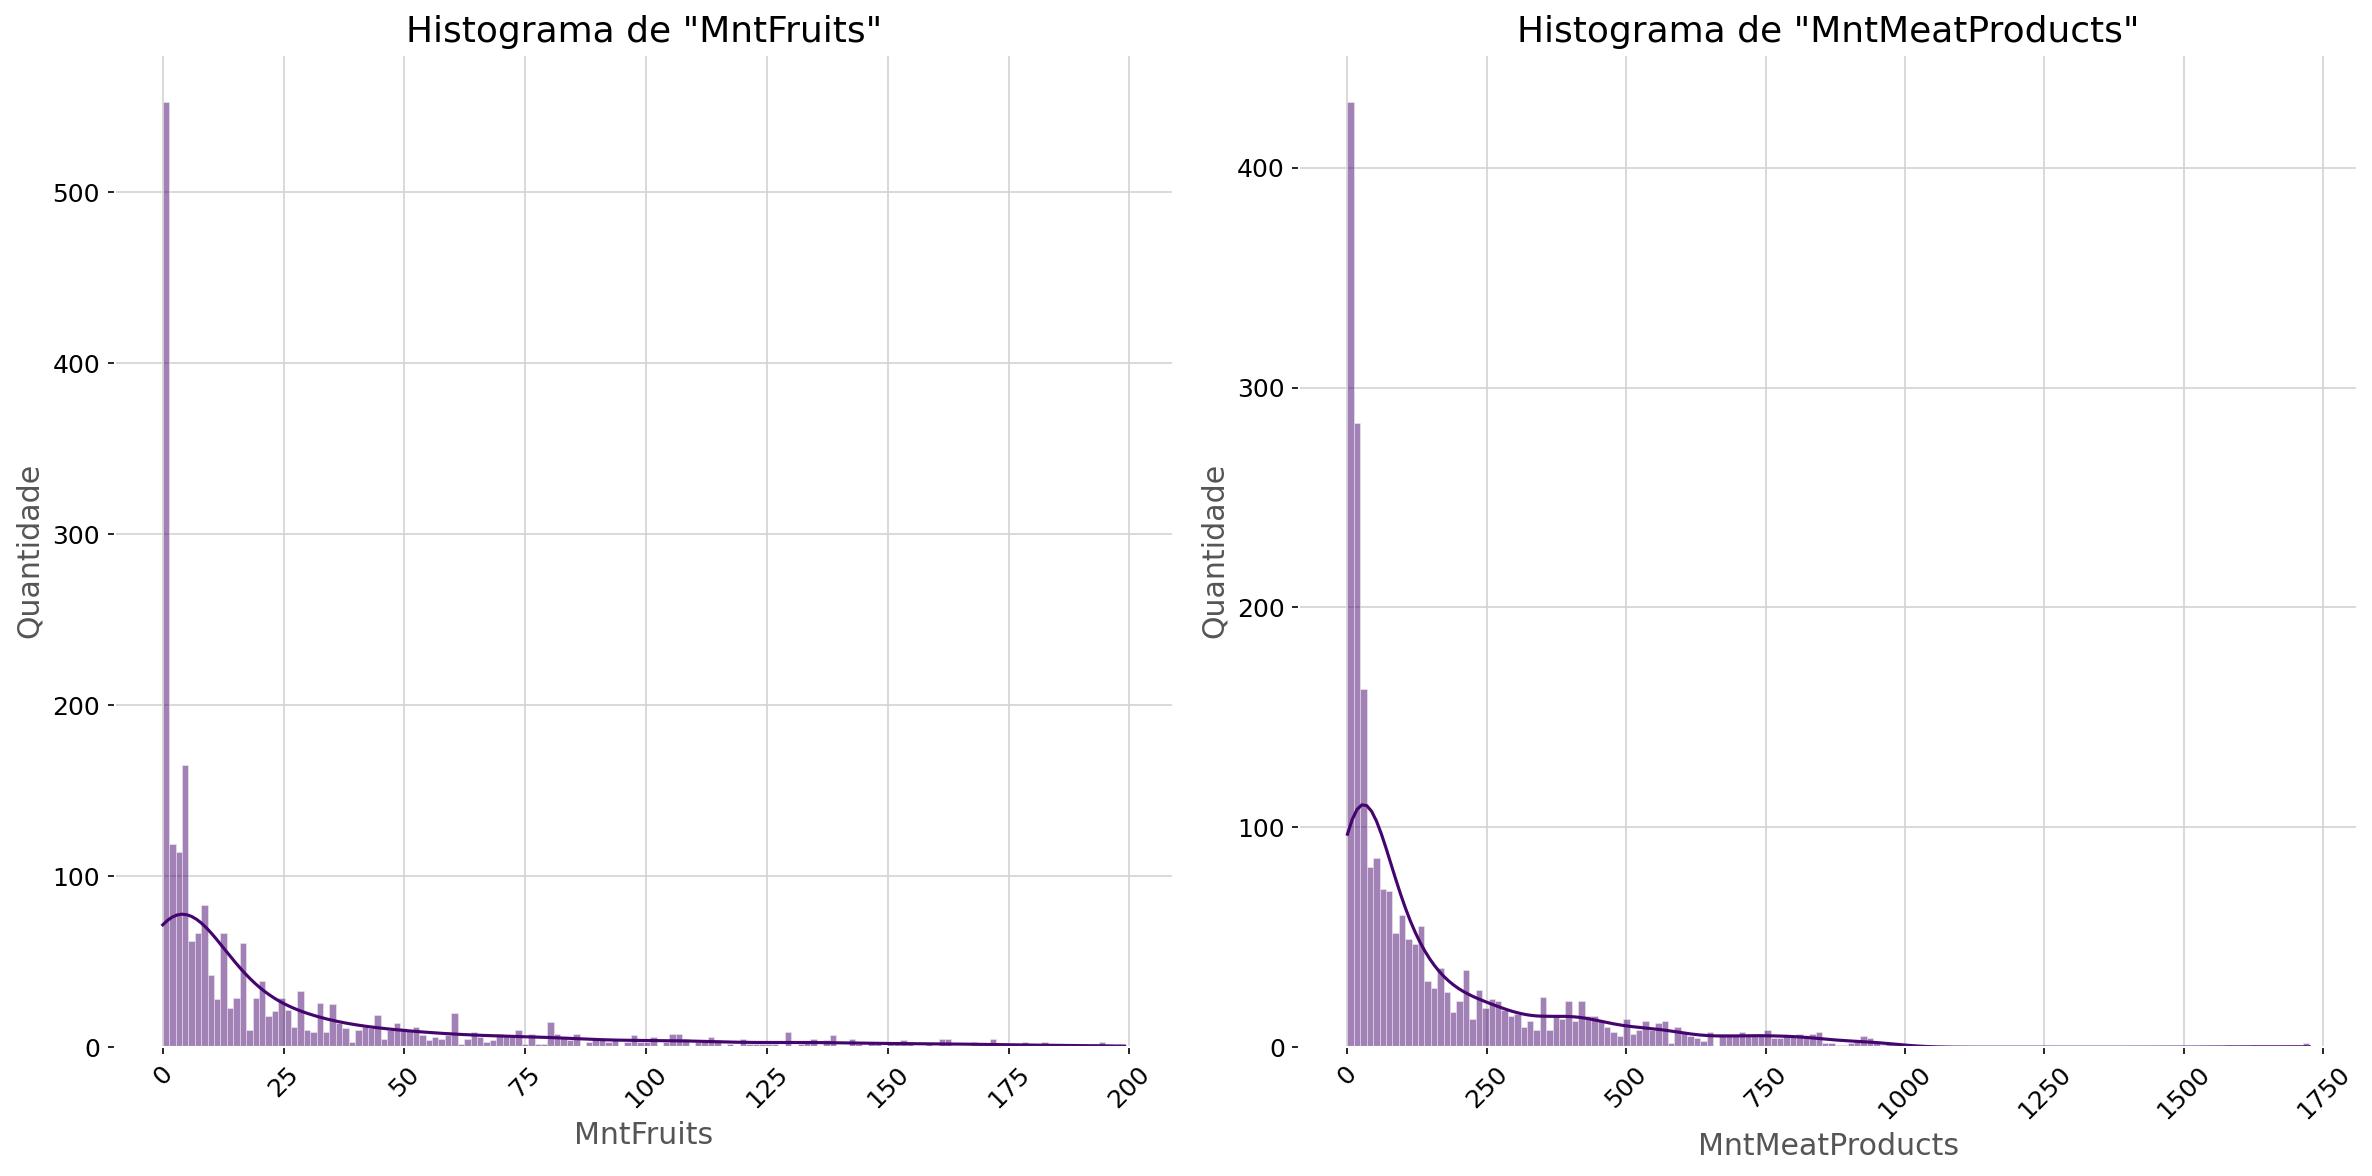

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


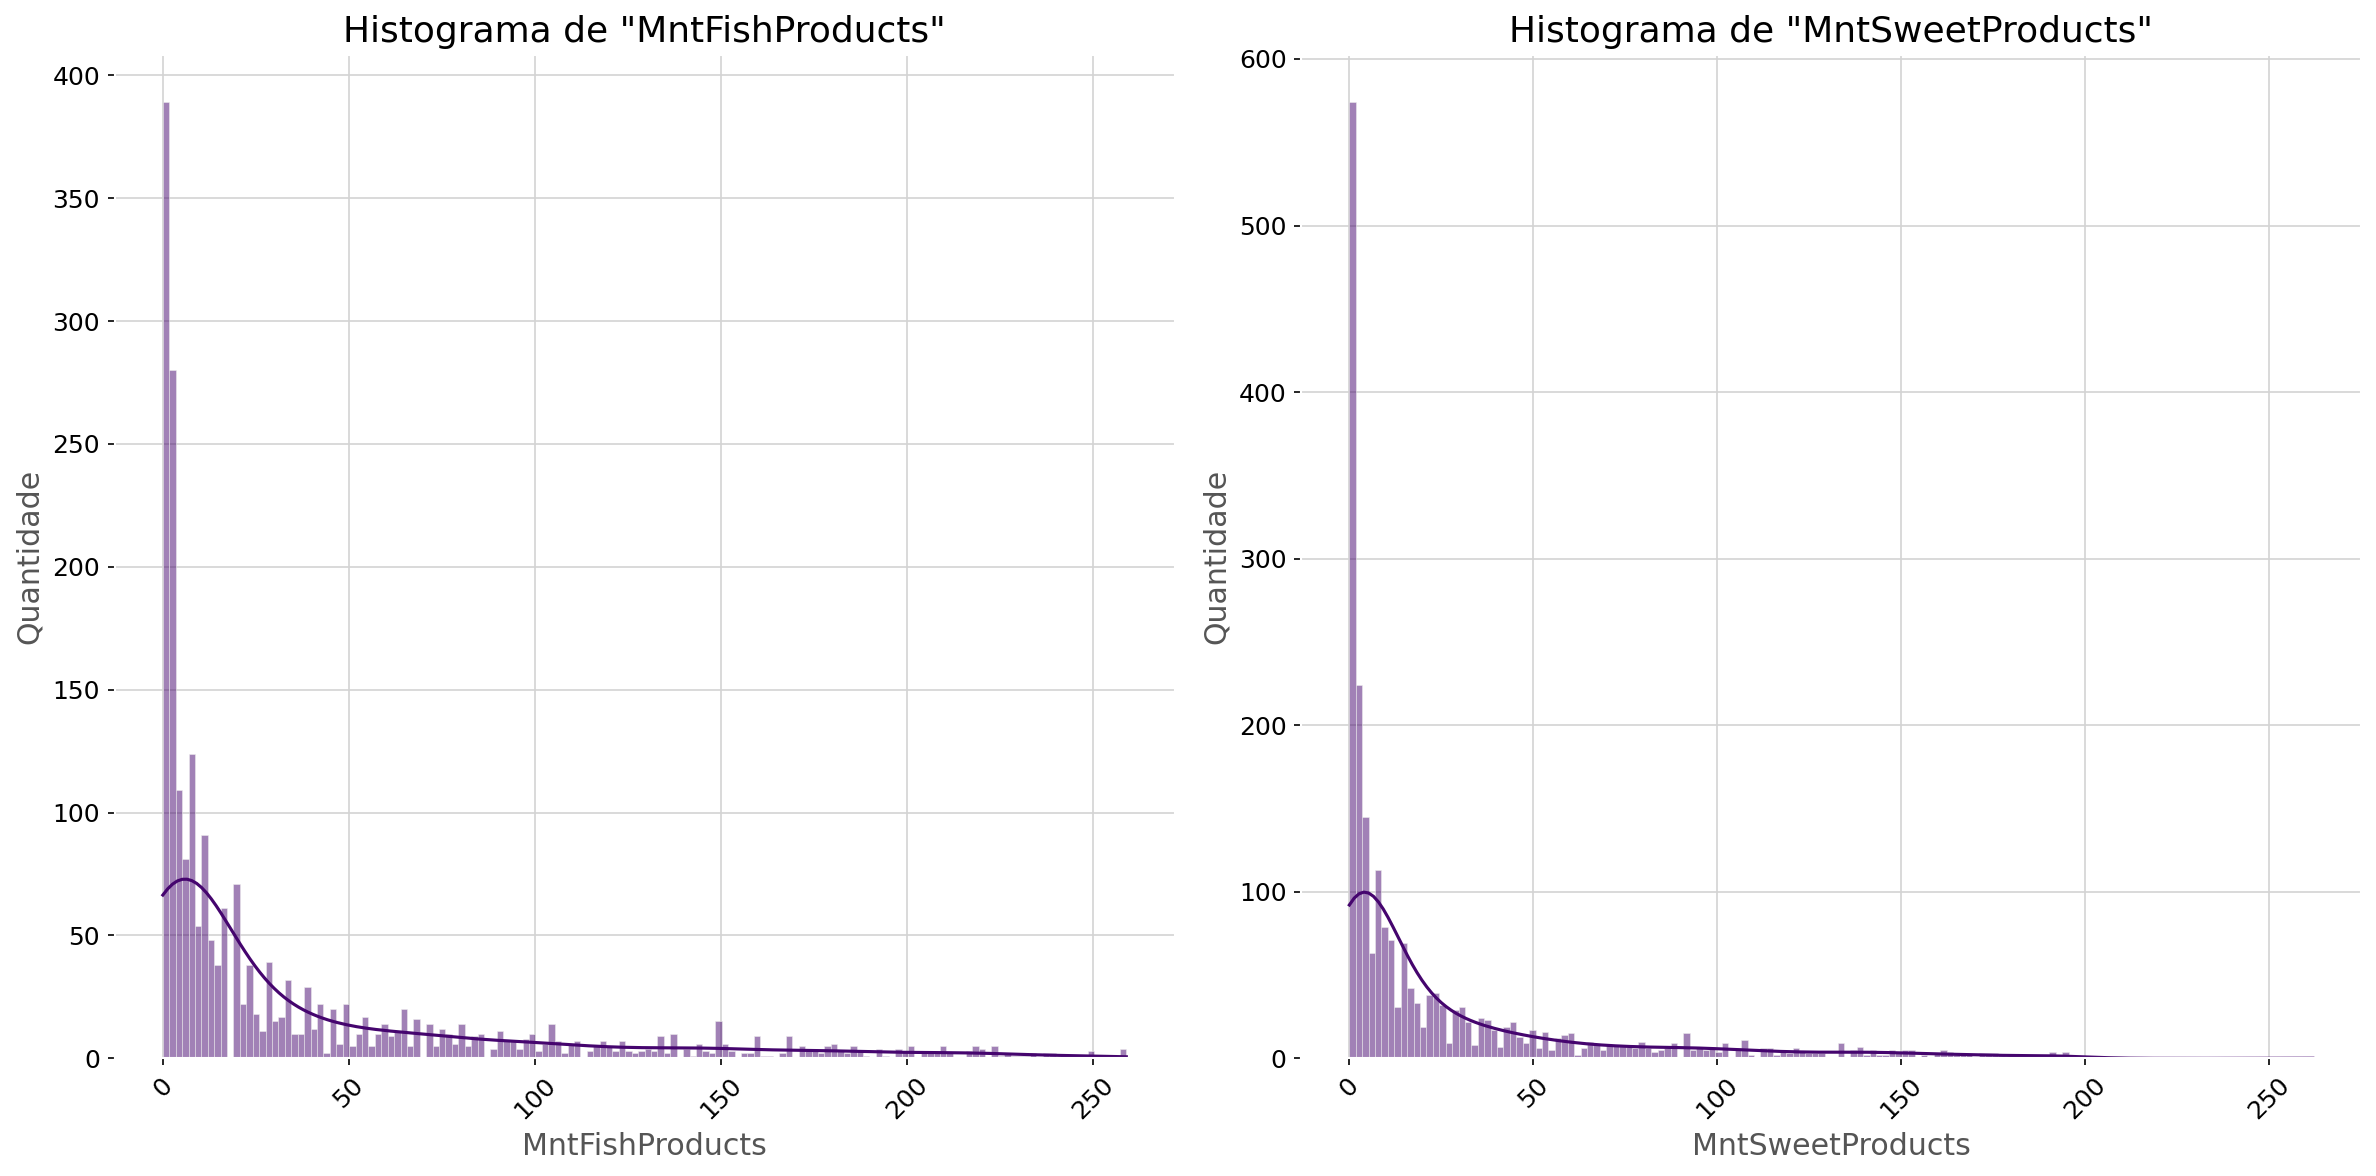

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


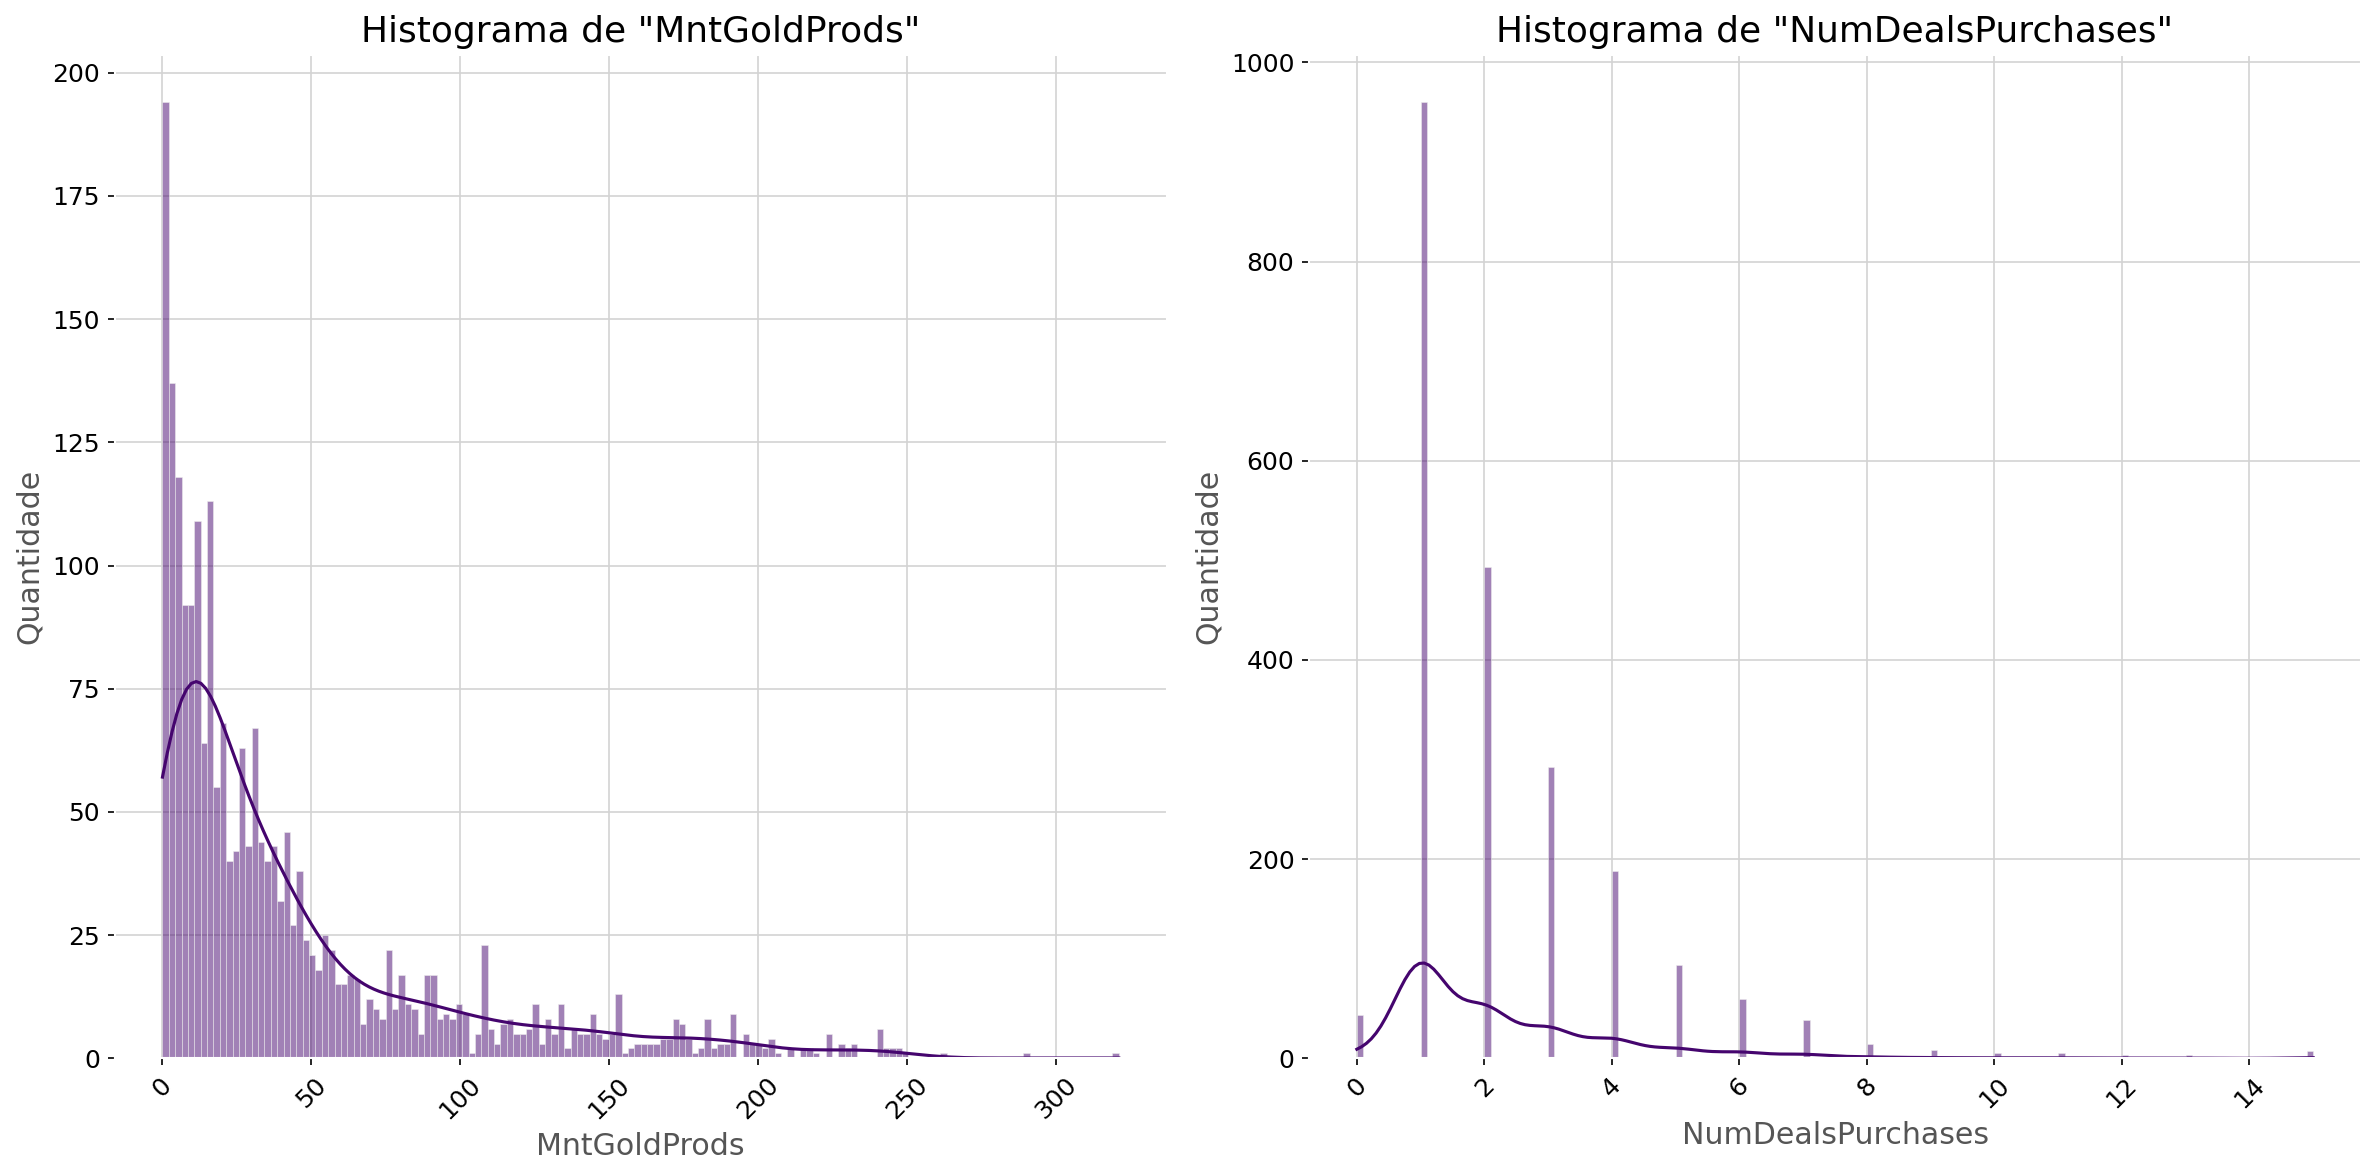

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


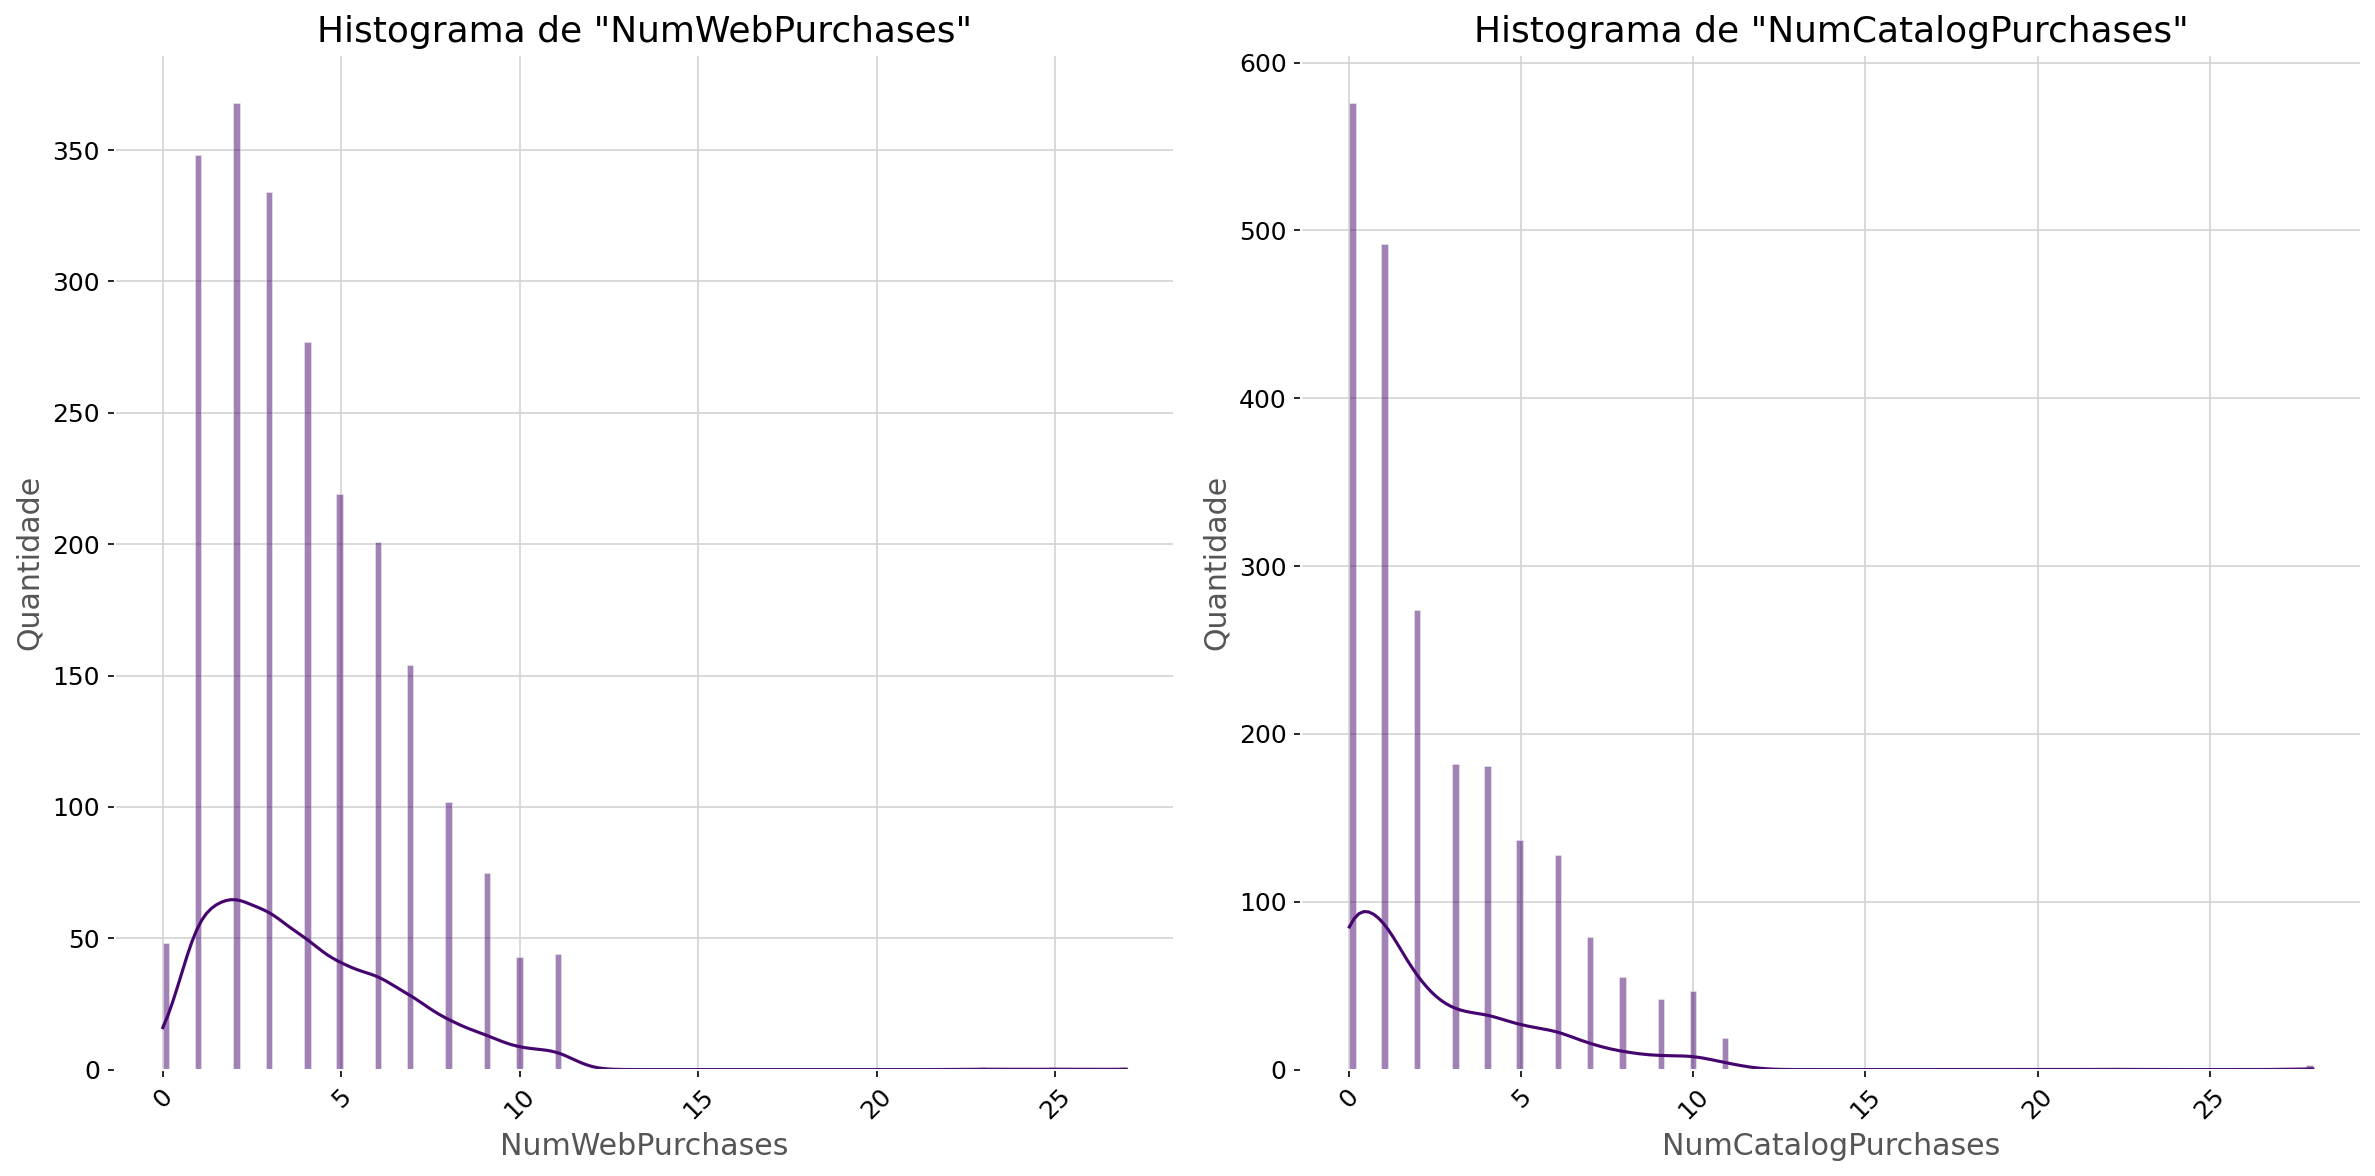

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


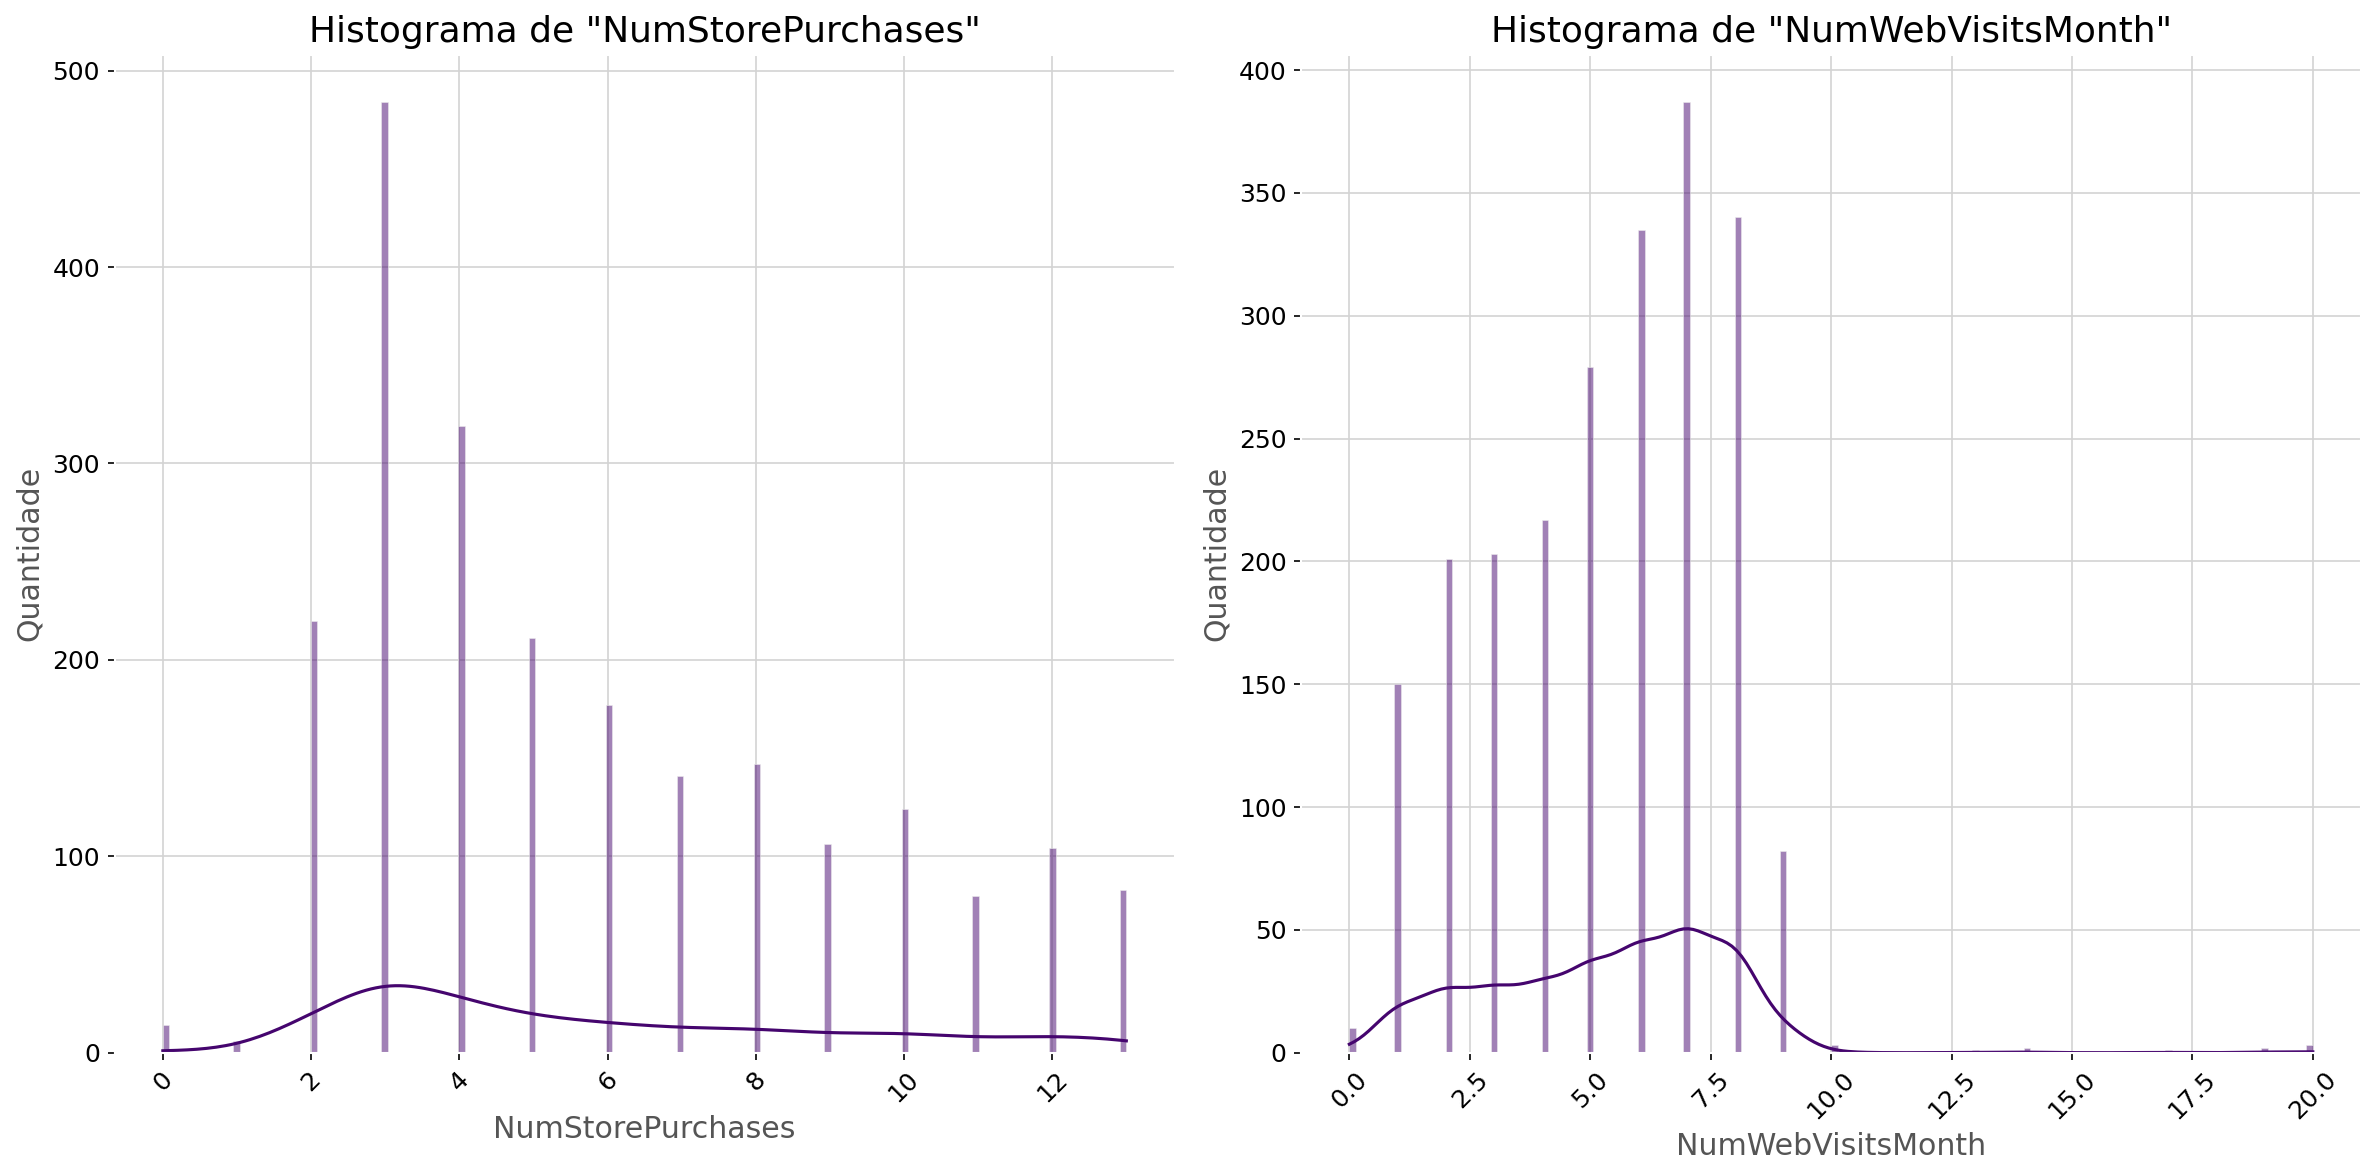

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


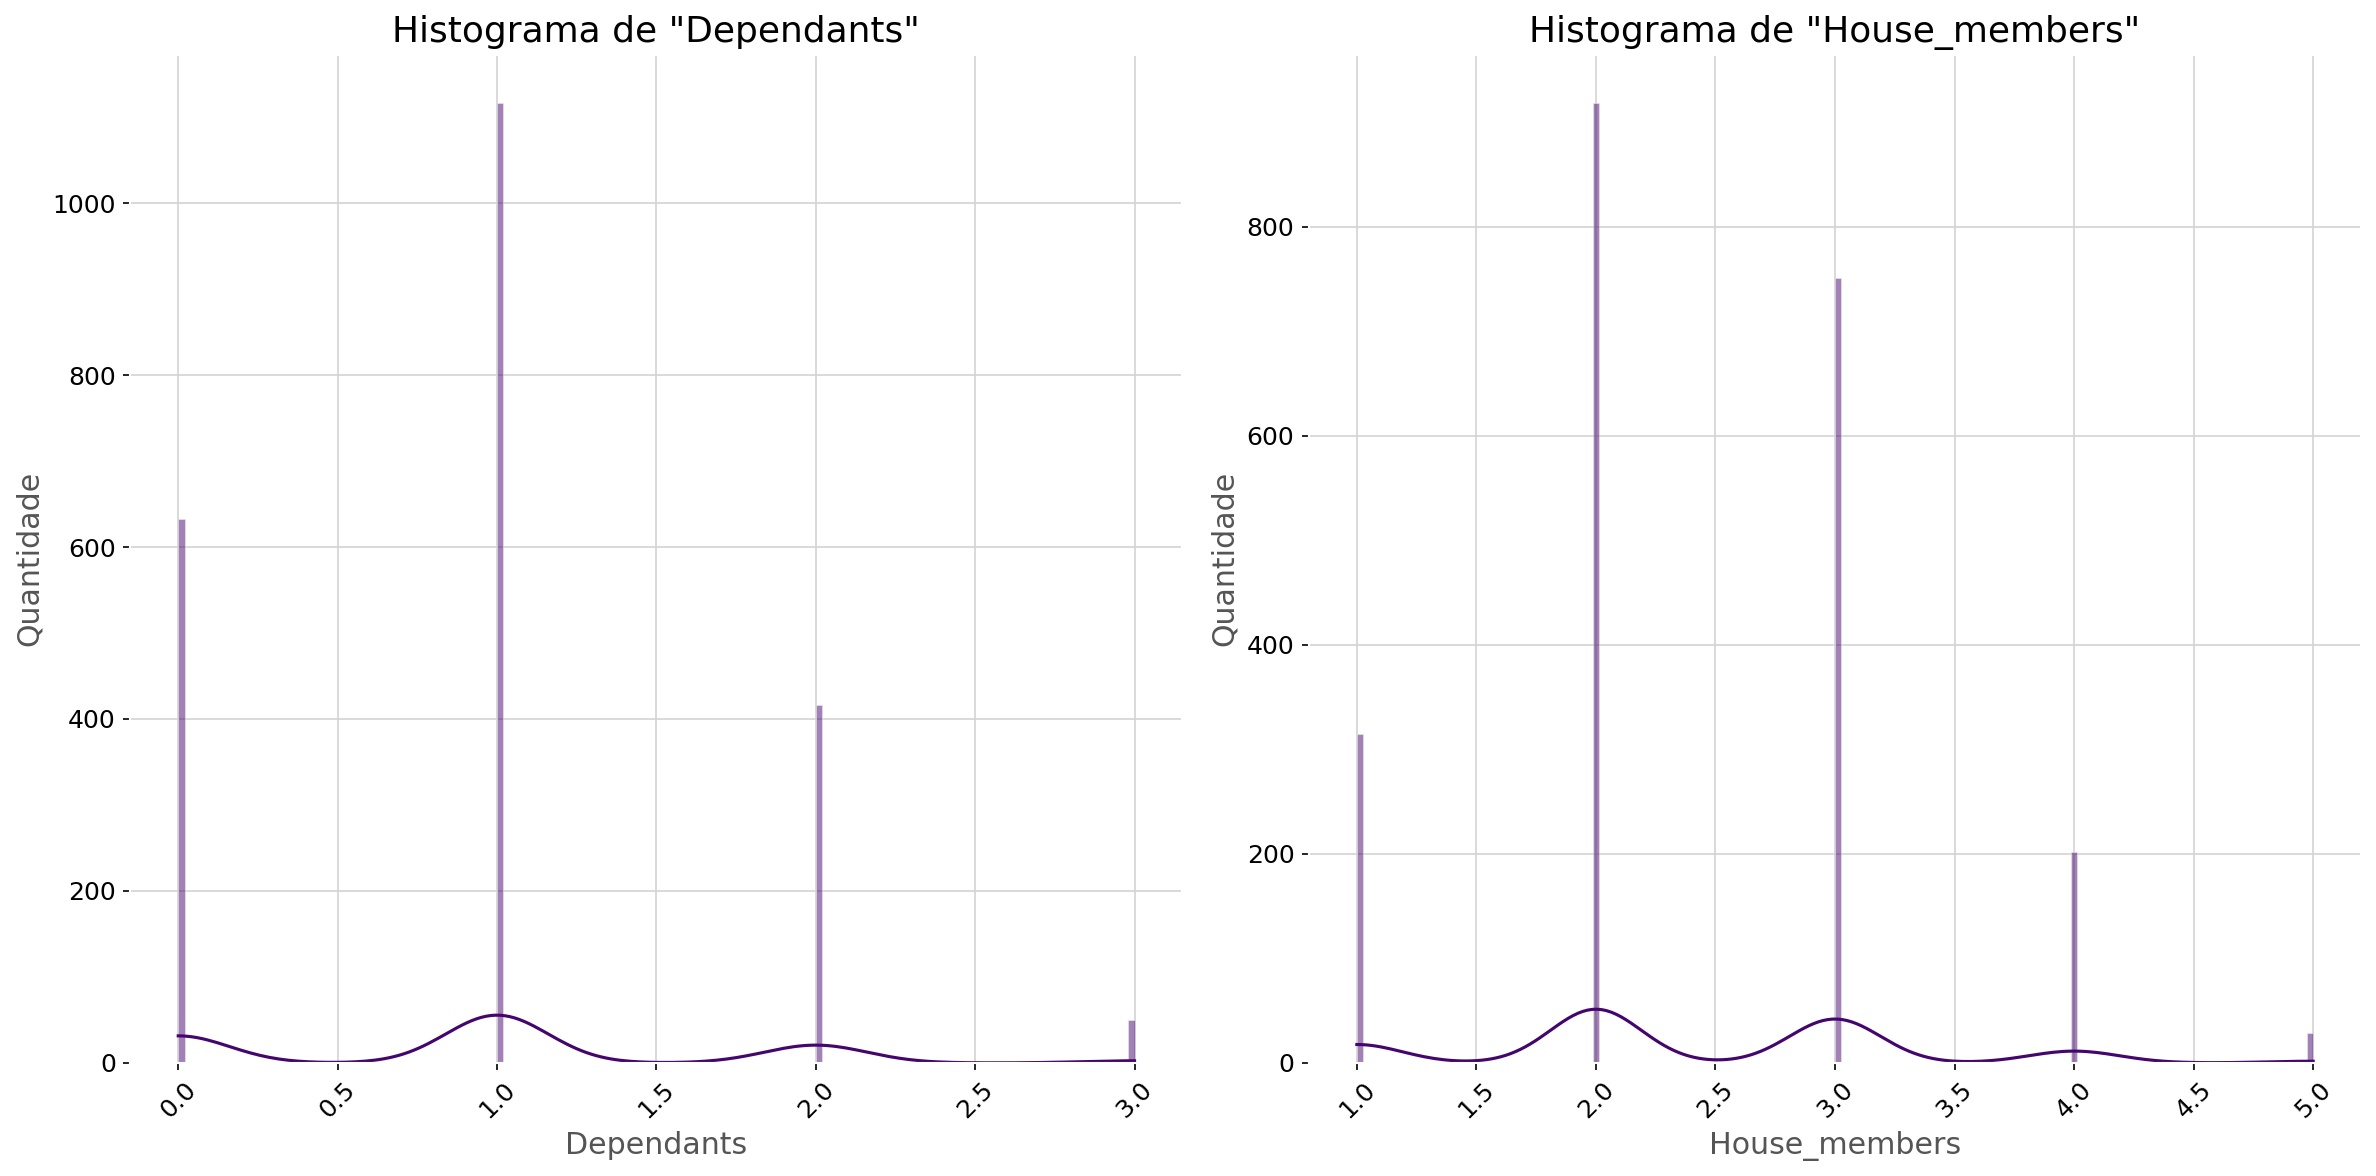

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


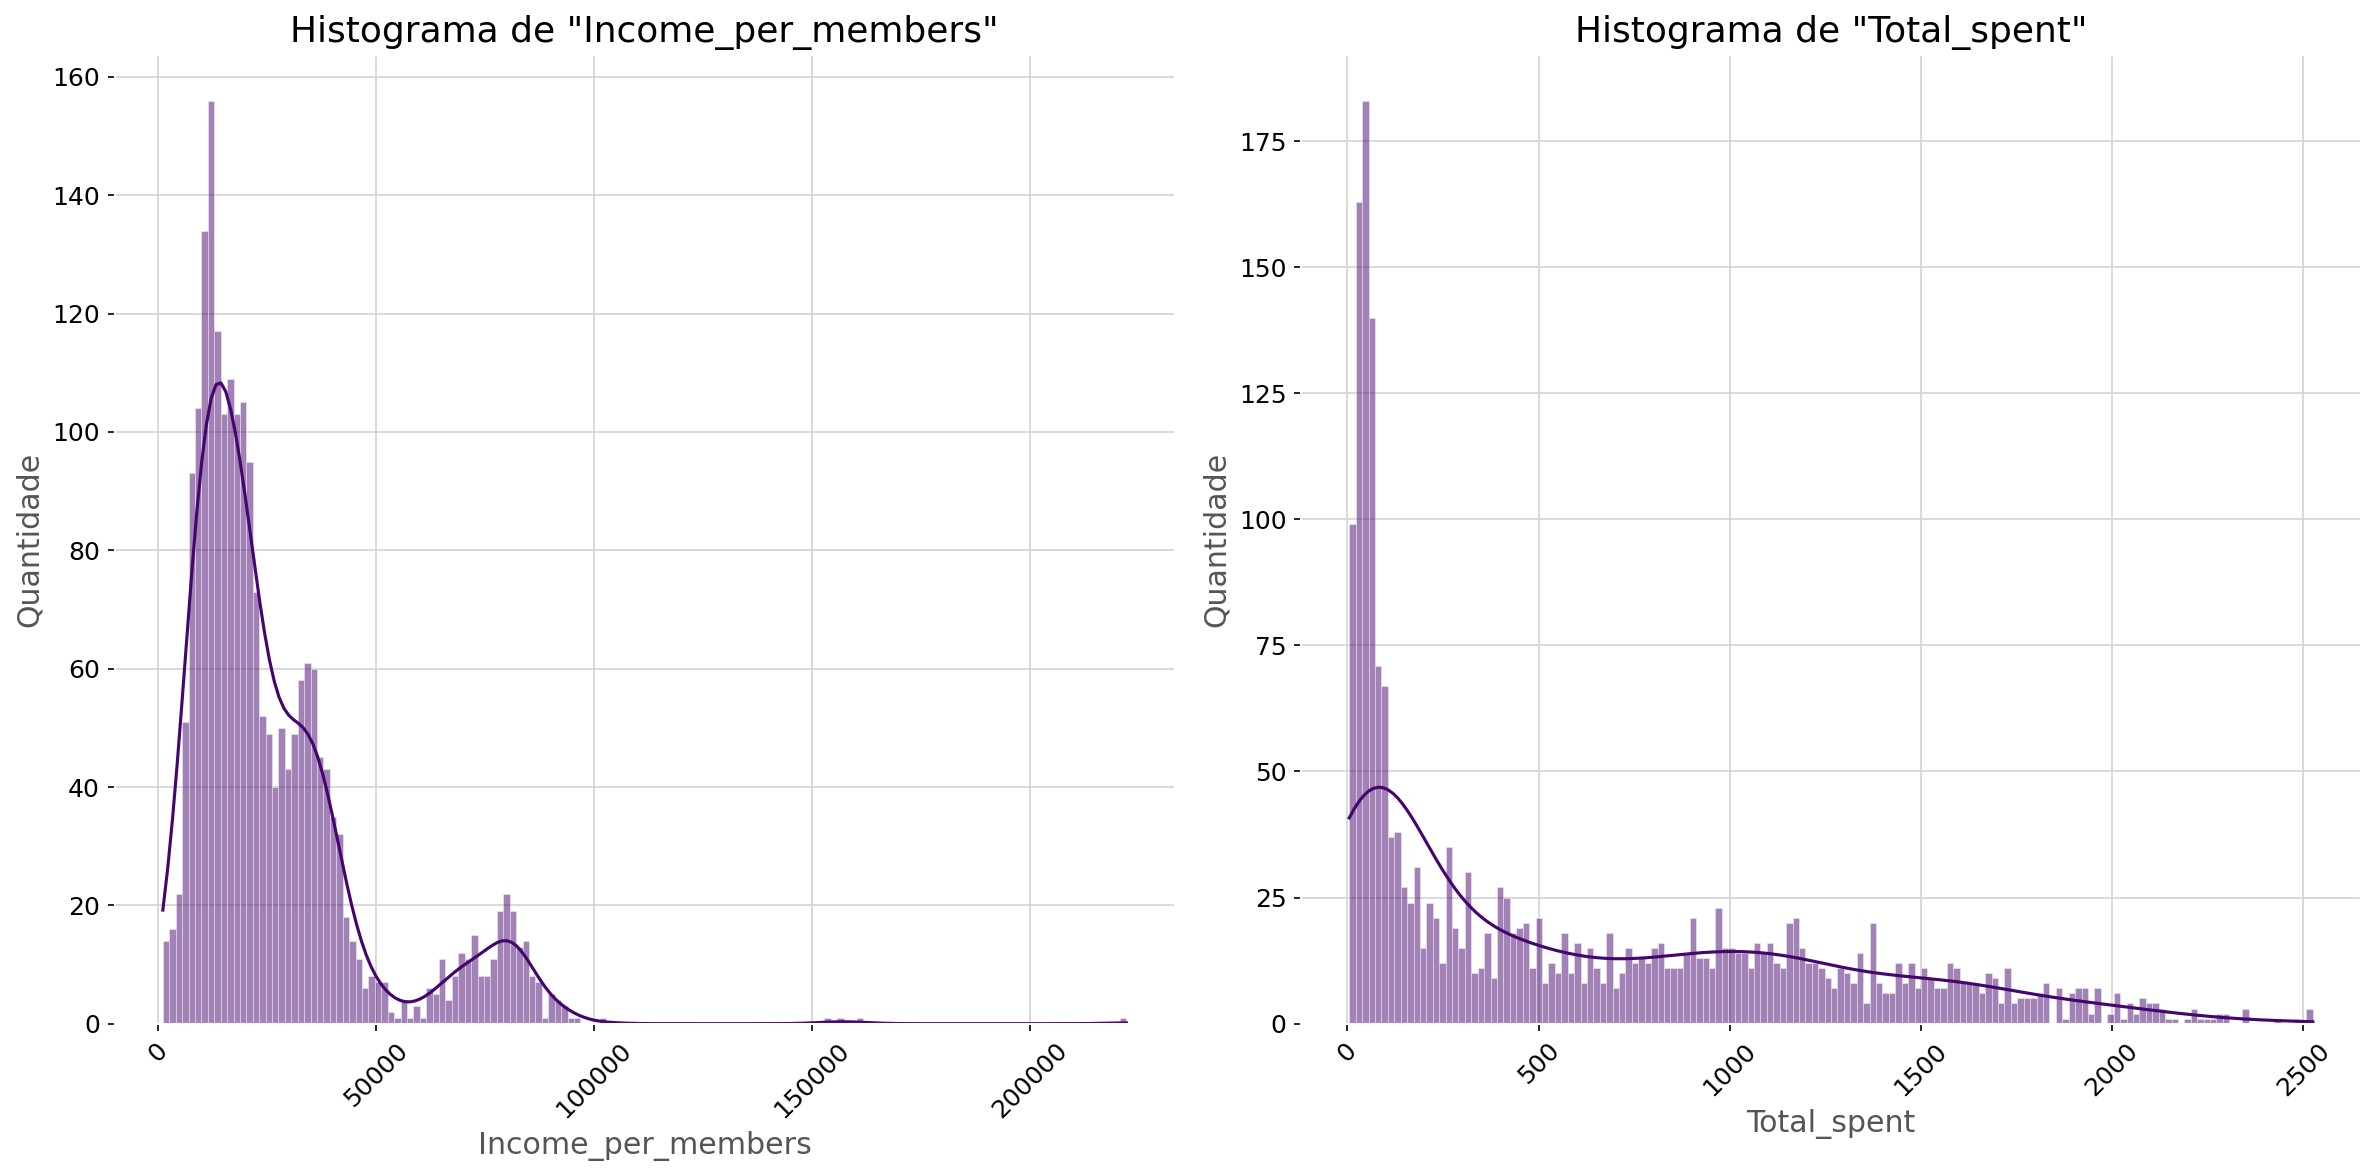

-----------------------------------------------------------------------------------------------------------------------------


c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
c:\Users\pablo\OneDrive\Área de Trabalho\Data_projects\MLops_test\src\utils_EDA.py:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


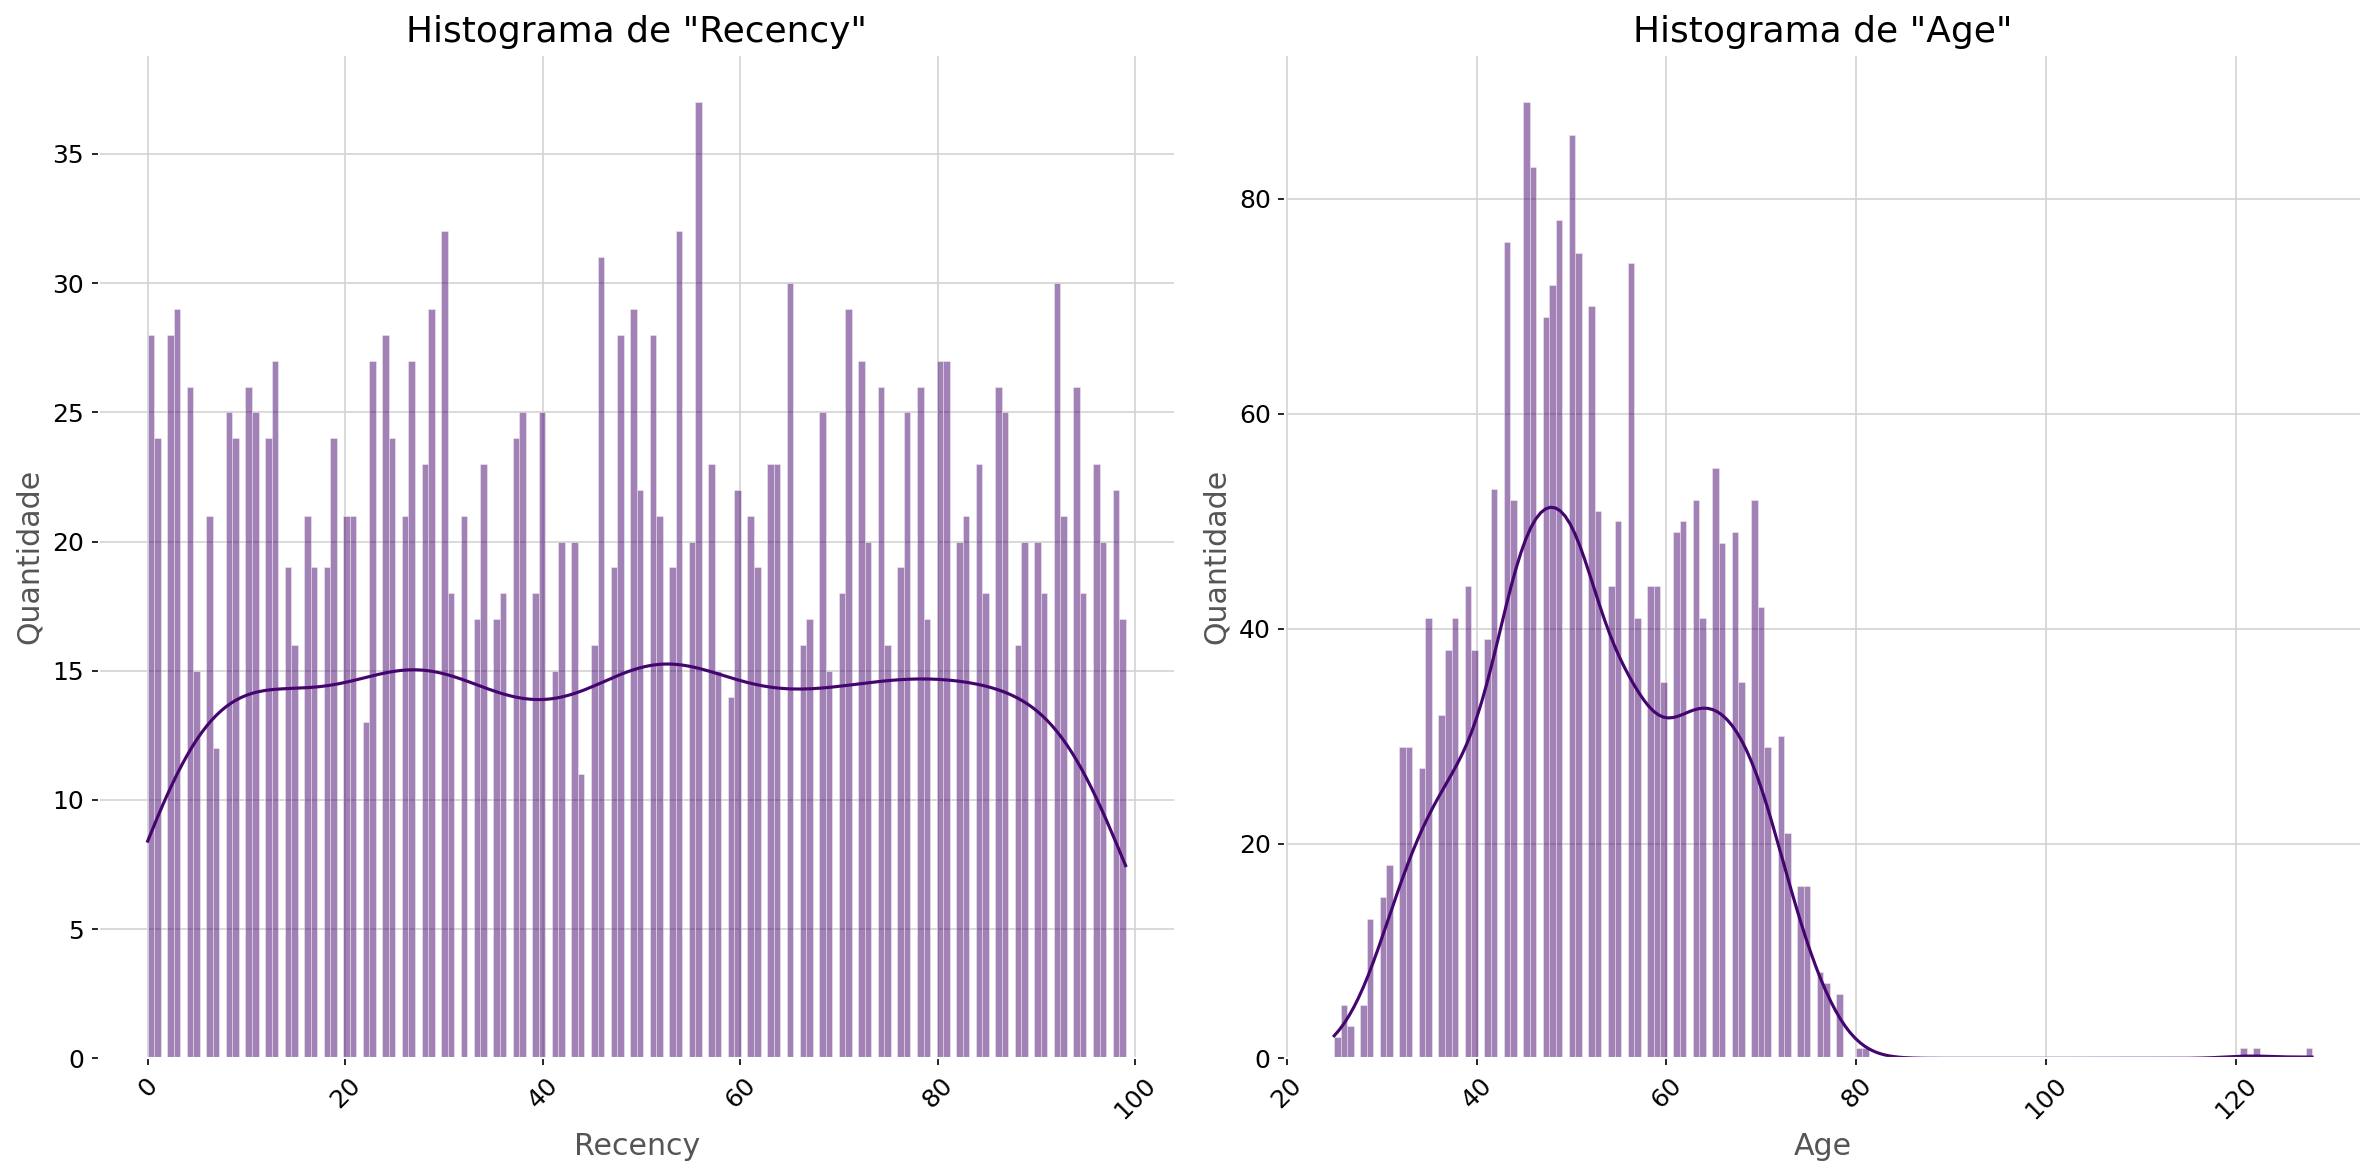

-----------------------------------------------------------------------------------------------------------------------------


In [11]:
lista_num = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
             'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth',
             'Dependants', 'House_members', 'Income_per_members',
             'Total_spent', 'Recency','Age']

hist_graph(df_feature, lista_num)

**Insights**:
1. A renda anual da maioria dos clientes está no alcance entre **0 - 100k dólares**.
***

2. Em relação os produtos (Vinhos,carnes,peixes,ouro,doces e frutas):
    * Há uma concentração mais dispersa em relação aos **gastos de maiores proporções** para as features de **vinhos e carnes**.
    * A procura por **peixes e doces** é levemente maior comparados à outros produtos.
***   
3. Sobre as compras realizadas:
    * A distribuição é maior entre **uma e duas compras realizadas com desconto**.
    * A maioria das compras é **feitas no site oficial** gira em torno de **1 - 4 compras por cada cliente**.
    * As compras realizadas utilizando catálogo são em sua maioria um **total de 0 compras por cliente**, e caso seja realizada uma compra a **quantidade de pessoas que realizam 1 compra** é mais que **2x** mais frequente que a realização de **2 compras**, que decai conforme a quantidade de compras aumenta, indicando que a maioria prefere comprar por outros meios.
    * As lojas físicas possuem uma **maior concentração de 2 à 4 compras por cliente**, e a **grande minoria** realiza apenas uma compra.
***
4. A frequência de visitas nos sites possui um **pico em 8 acessos**, do **9° acesso** em diante poucos clientes realizam um retorno ao site.

***
5. A maioria dos clientes possuem **1 dependente** menor de idade e de **2 à 3 membros residentes na casa**.
***
6. A distribuição de **renda anual por cada membro familiar** é mais abundante em valores **menores que 50k dólares**, e os clientes, em sua maior proporção, gastam no total valores **abaixo de 300 dólares** .

## 4.1.3 Detecção e remoção de outliers

Os **outliers**, também chamados de pontos "fora da curva" ou "valores discrepantes", são os pontos nos dados onde os seus valores **se diferem de forma significativa** do restante dos dados. 
***
Geralmente são dados que são encontrados na base de dados por conta de **3 principais fatores**:

<b>1. Erros de medição;</b><br>
<b>2. Ocorrências raras;</b><br>
<b>3. Variabilidade natural dos dados.</b><br>

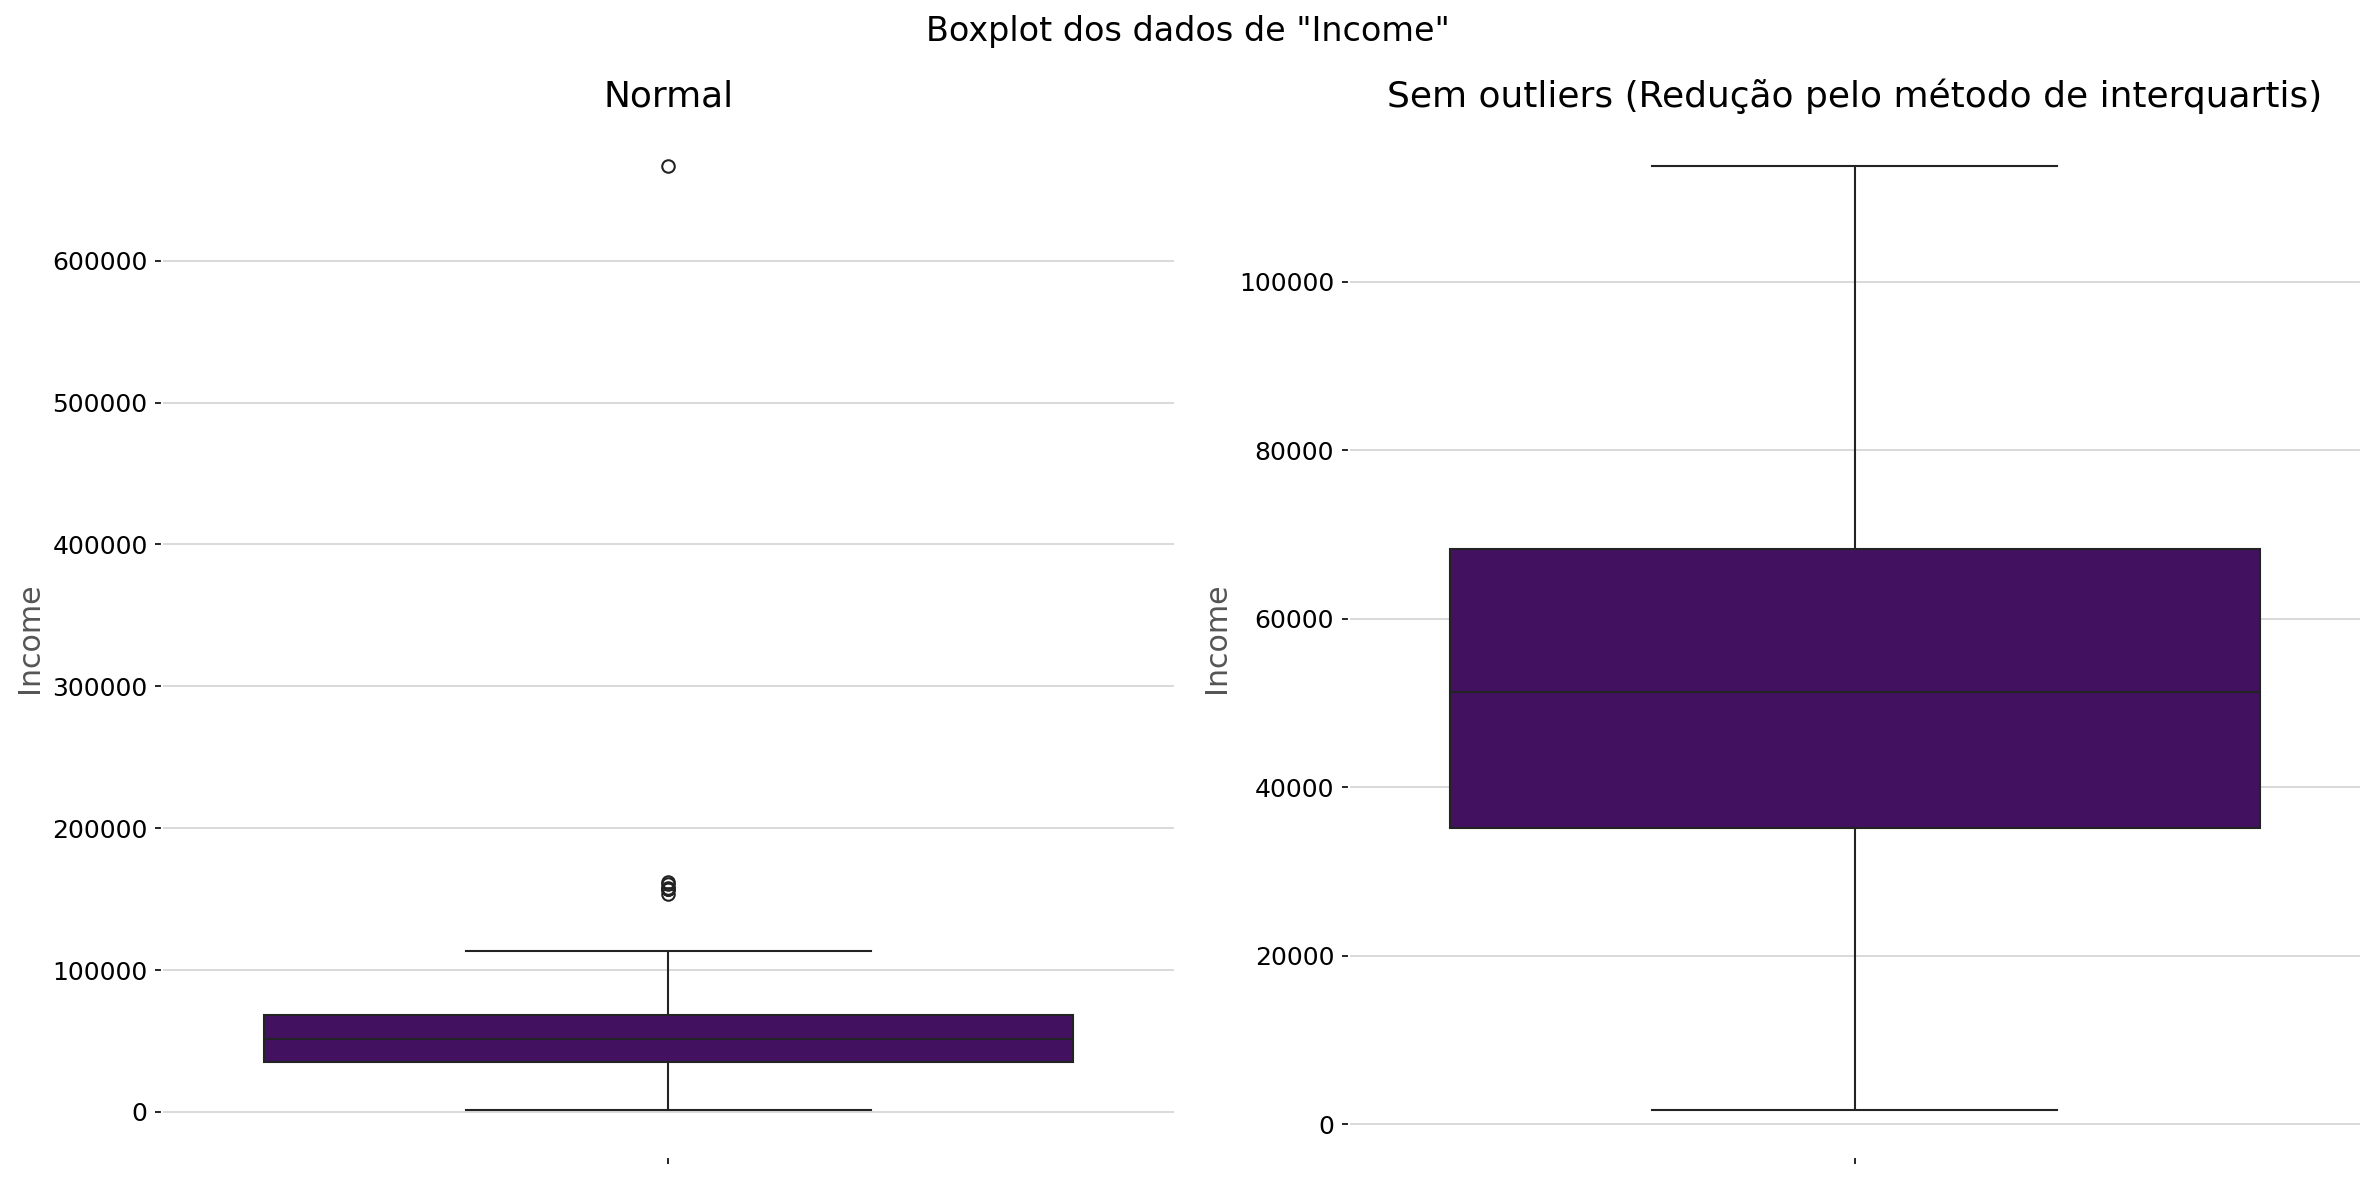

-----------------------------------------------------------------------------------------------------------------------------


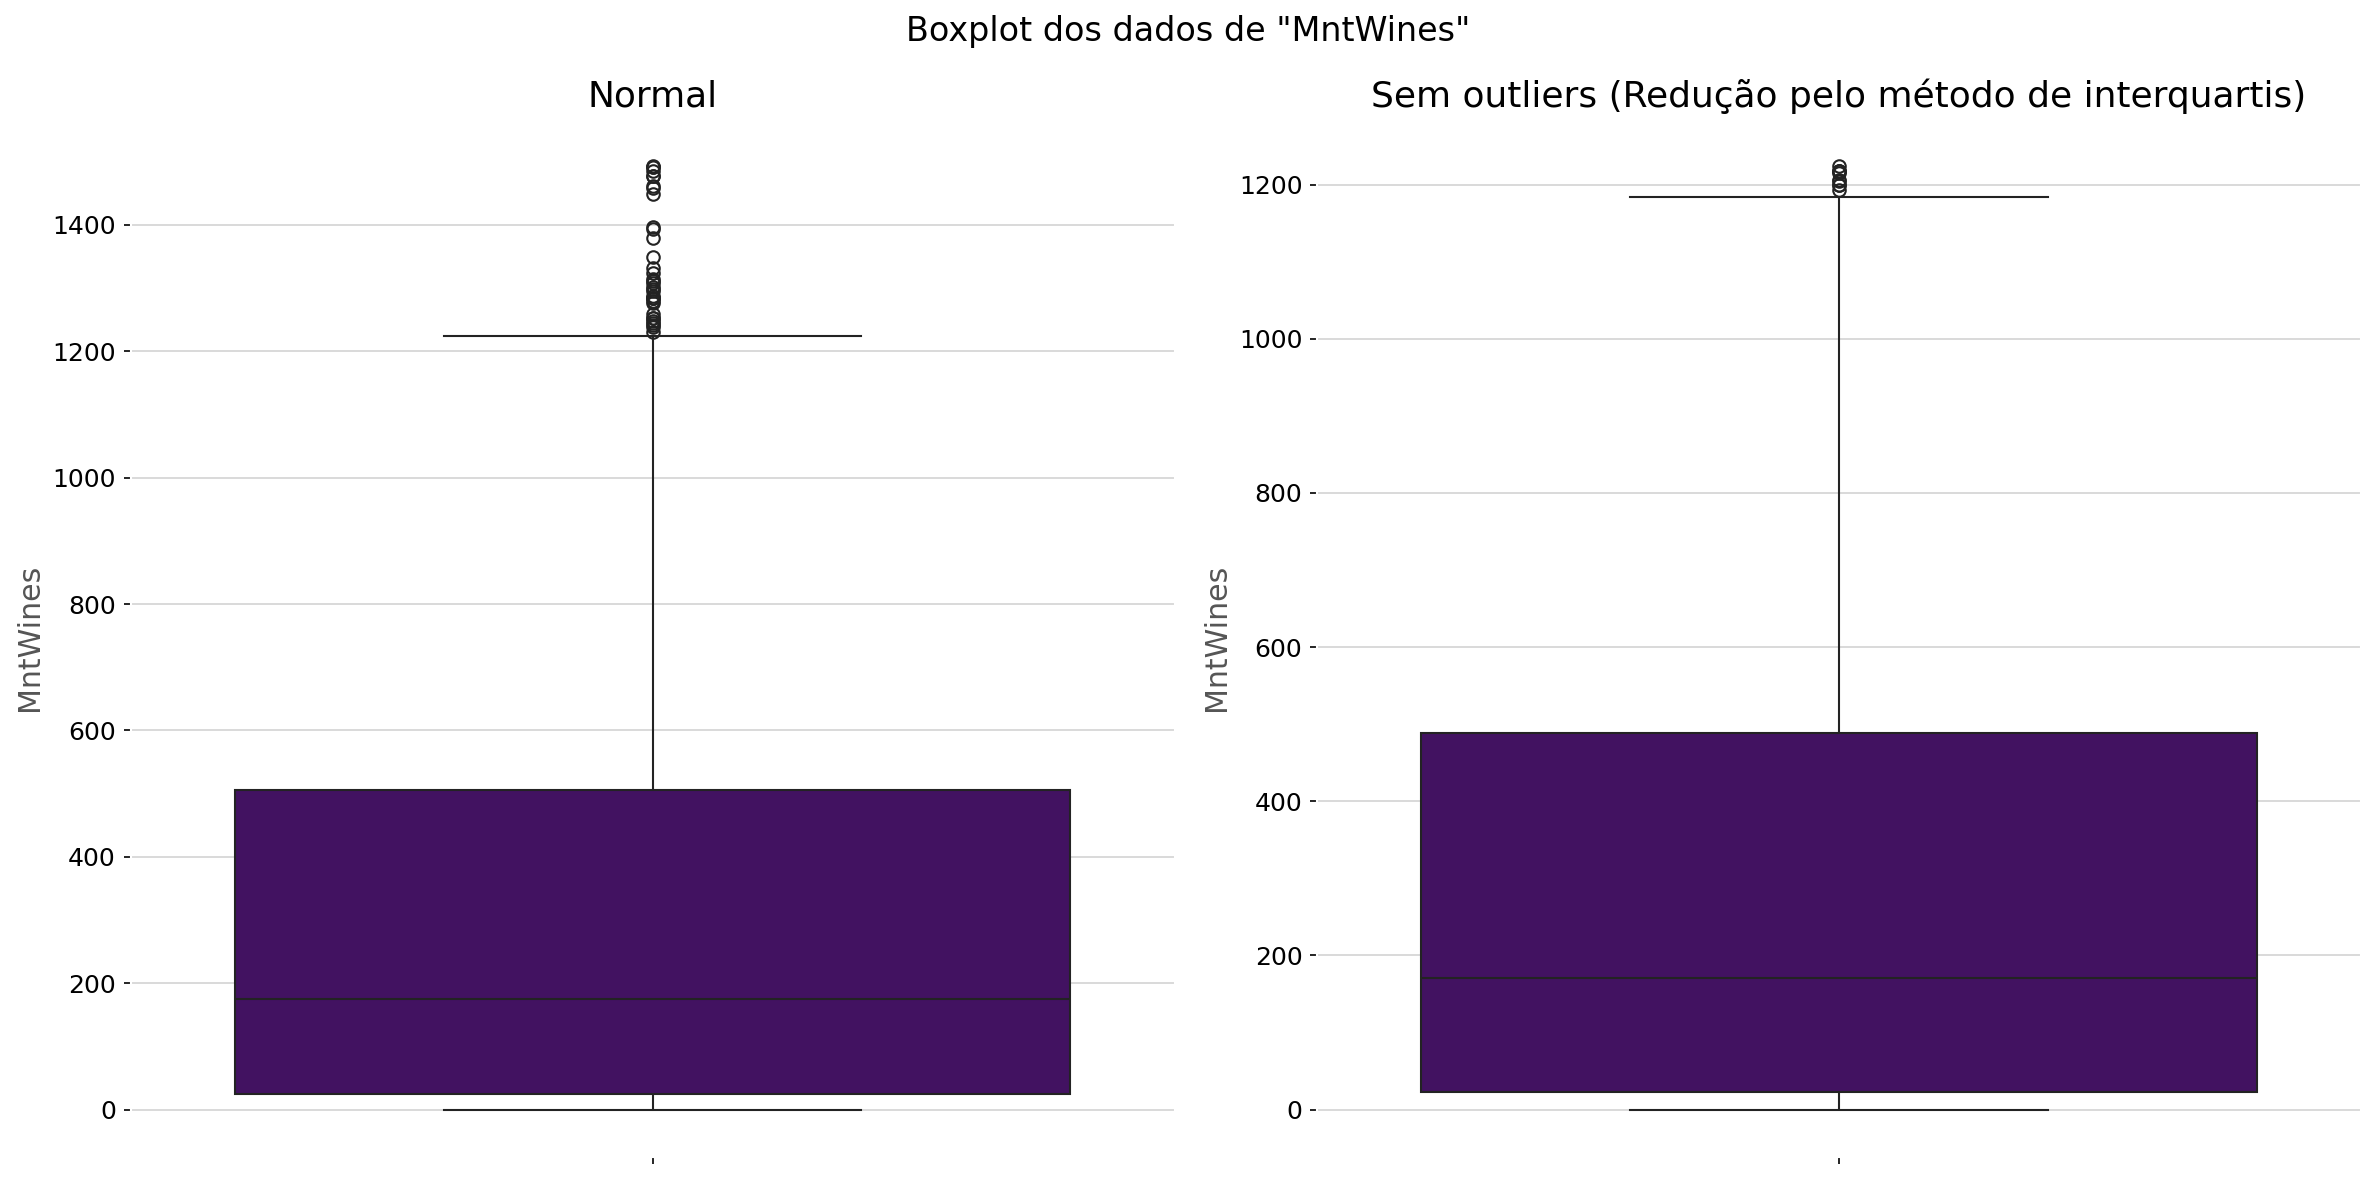

-----------------------------------------------------------------------------------------------------------------------------


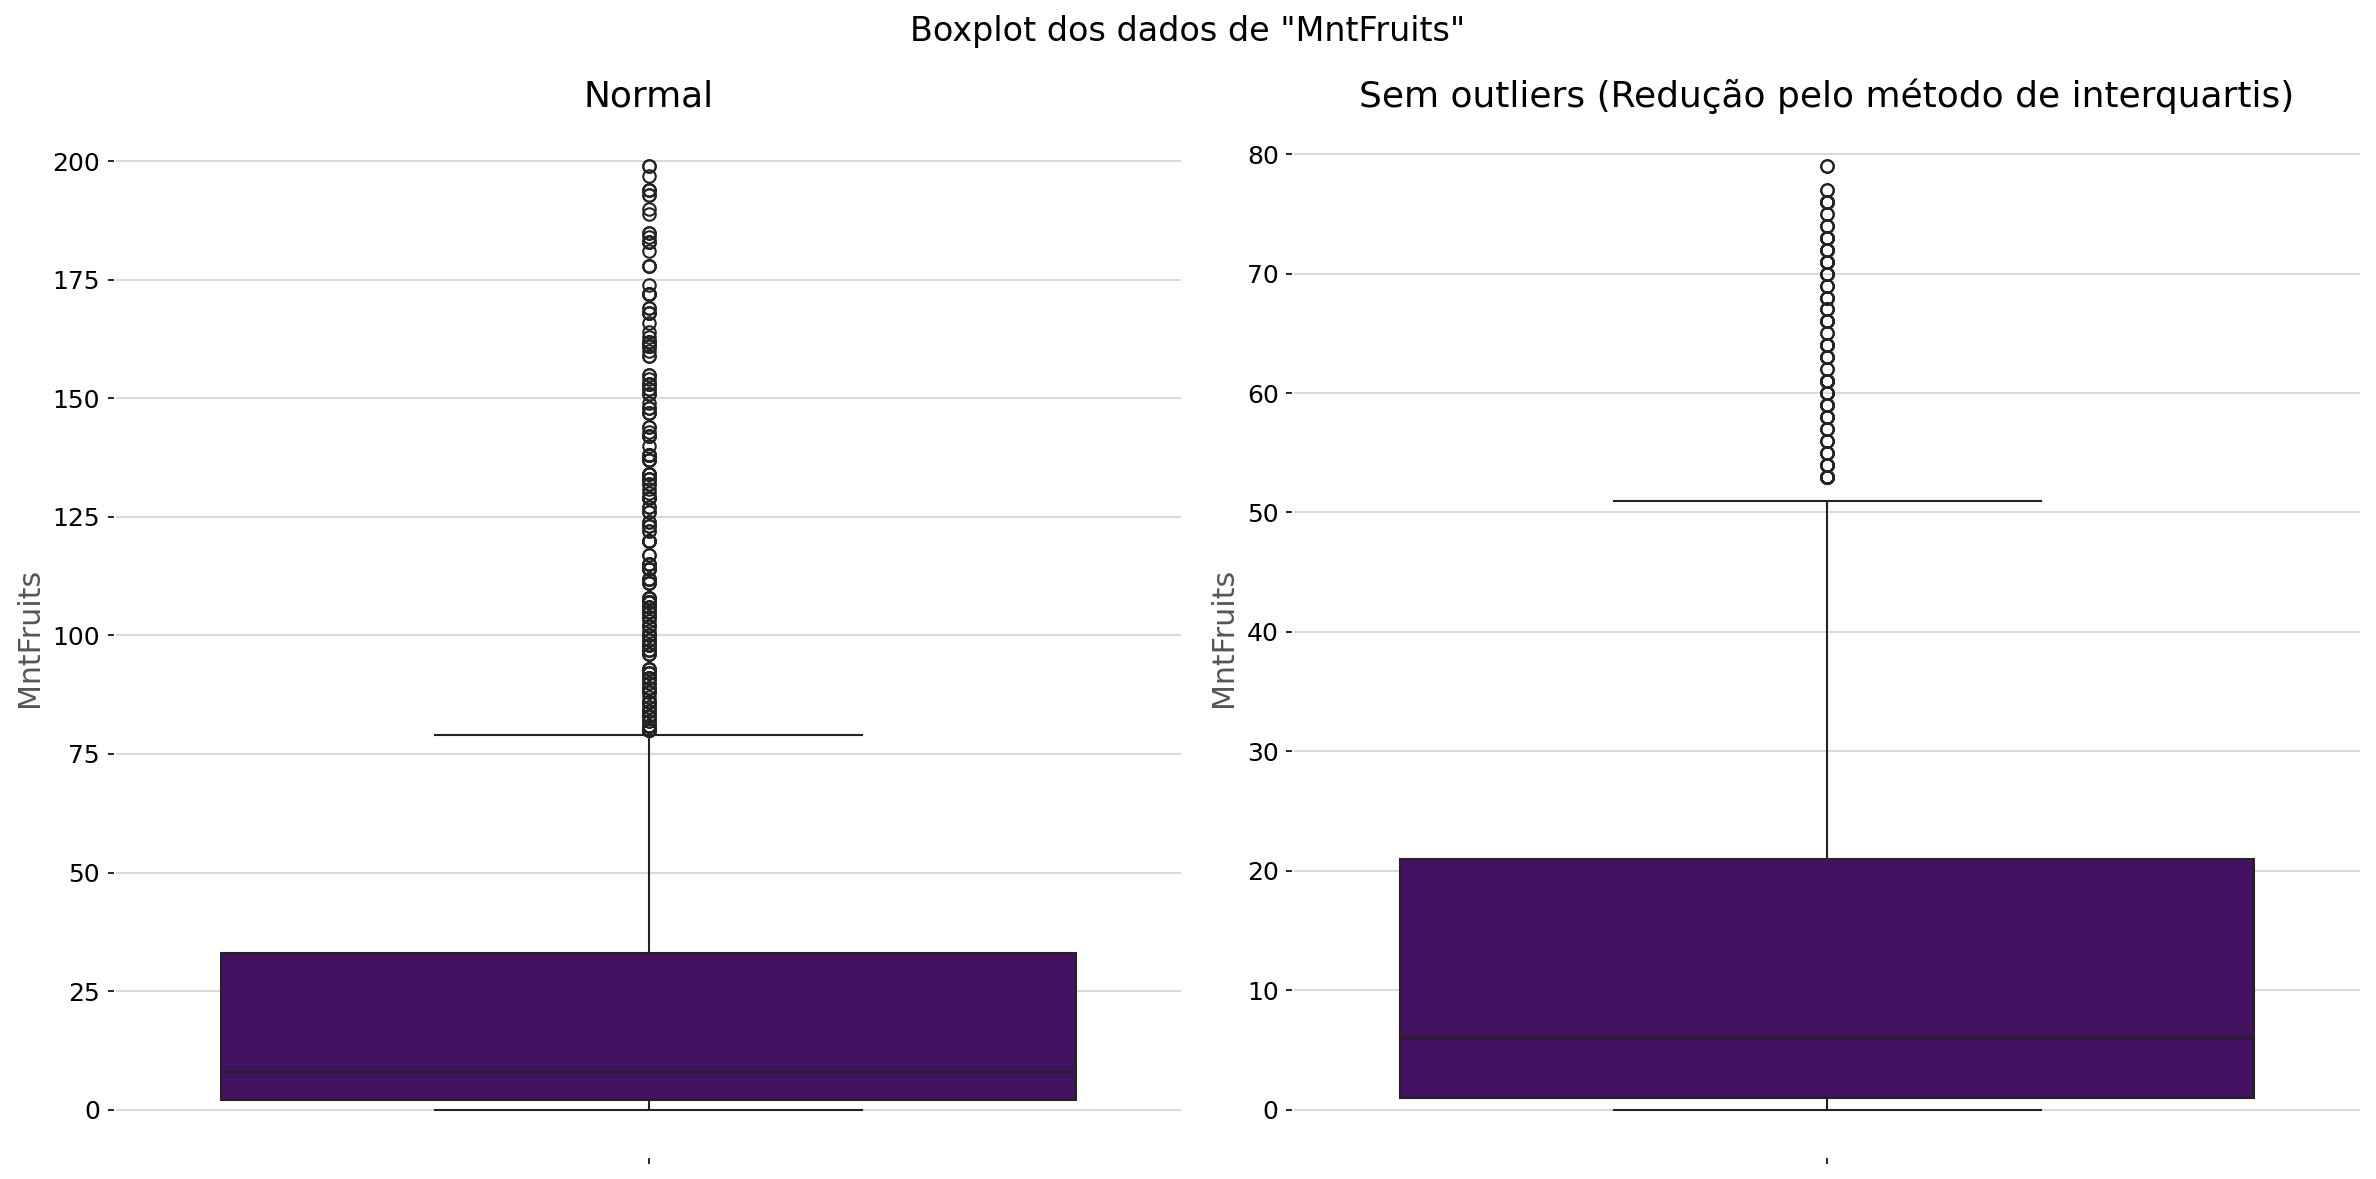

-----------------------------------------------------------------------------------------------------------------------------


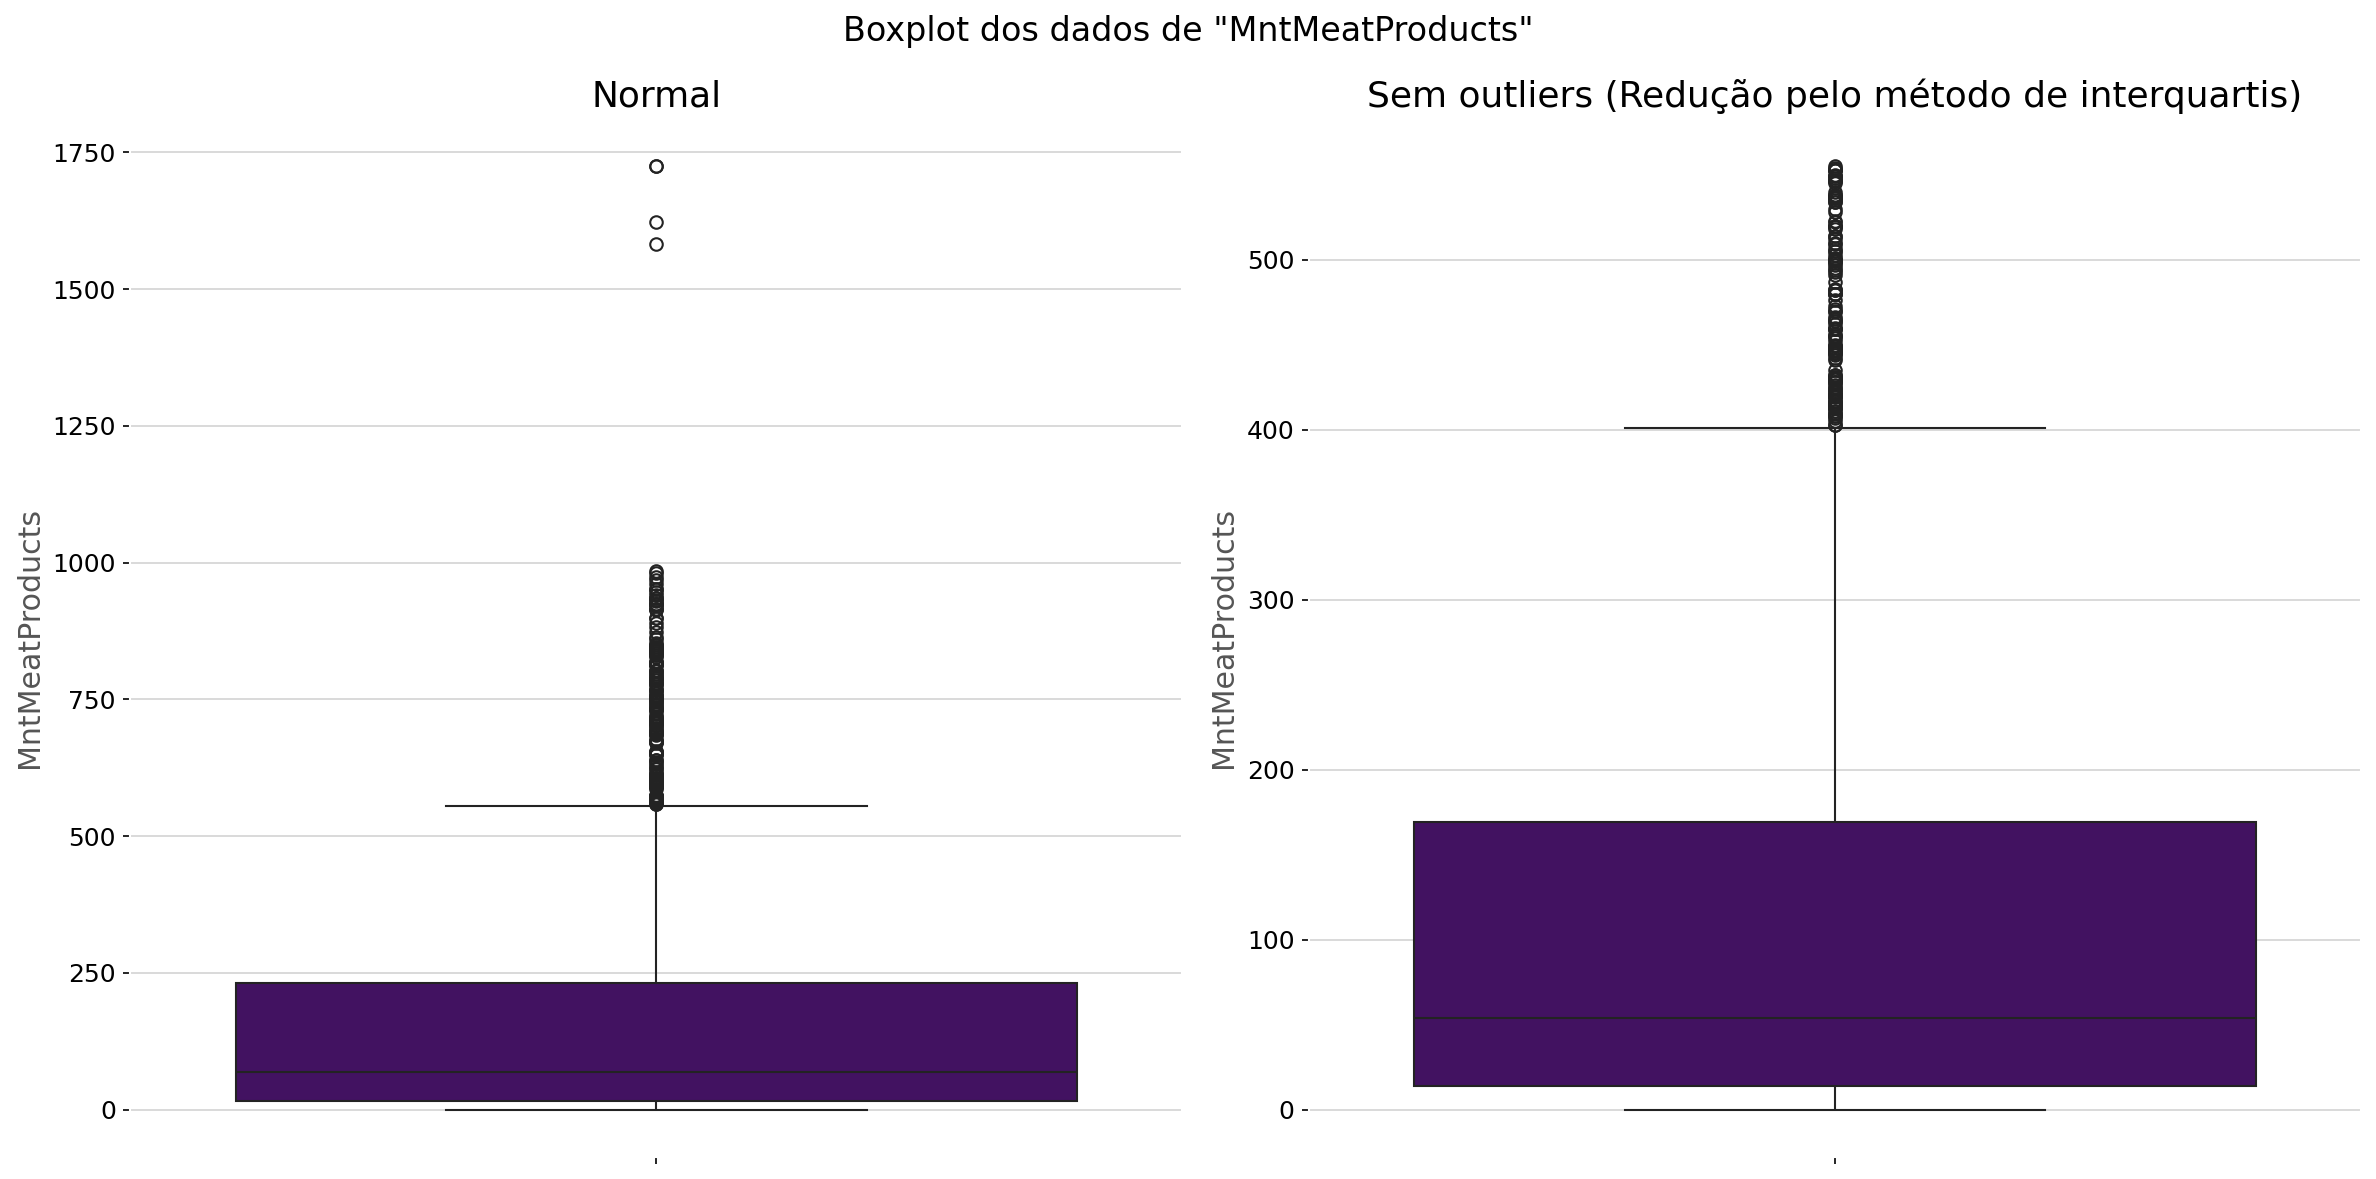

-----------------------------------------------------------------------------------------------------------------------------


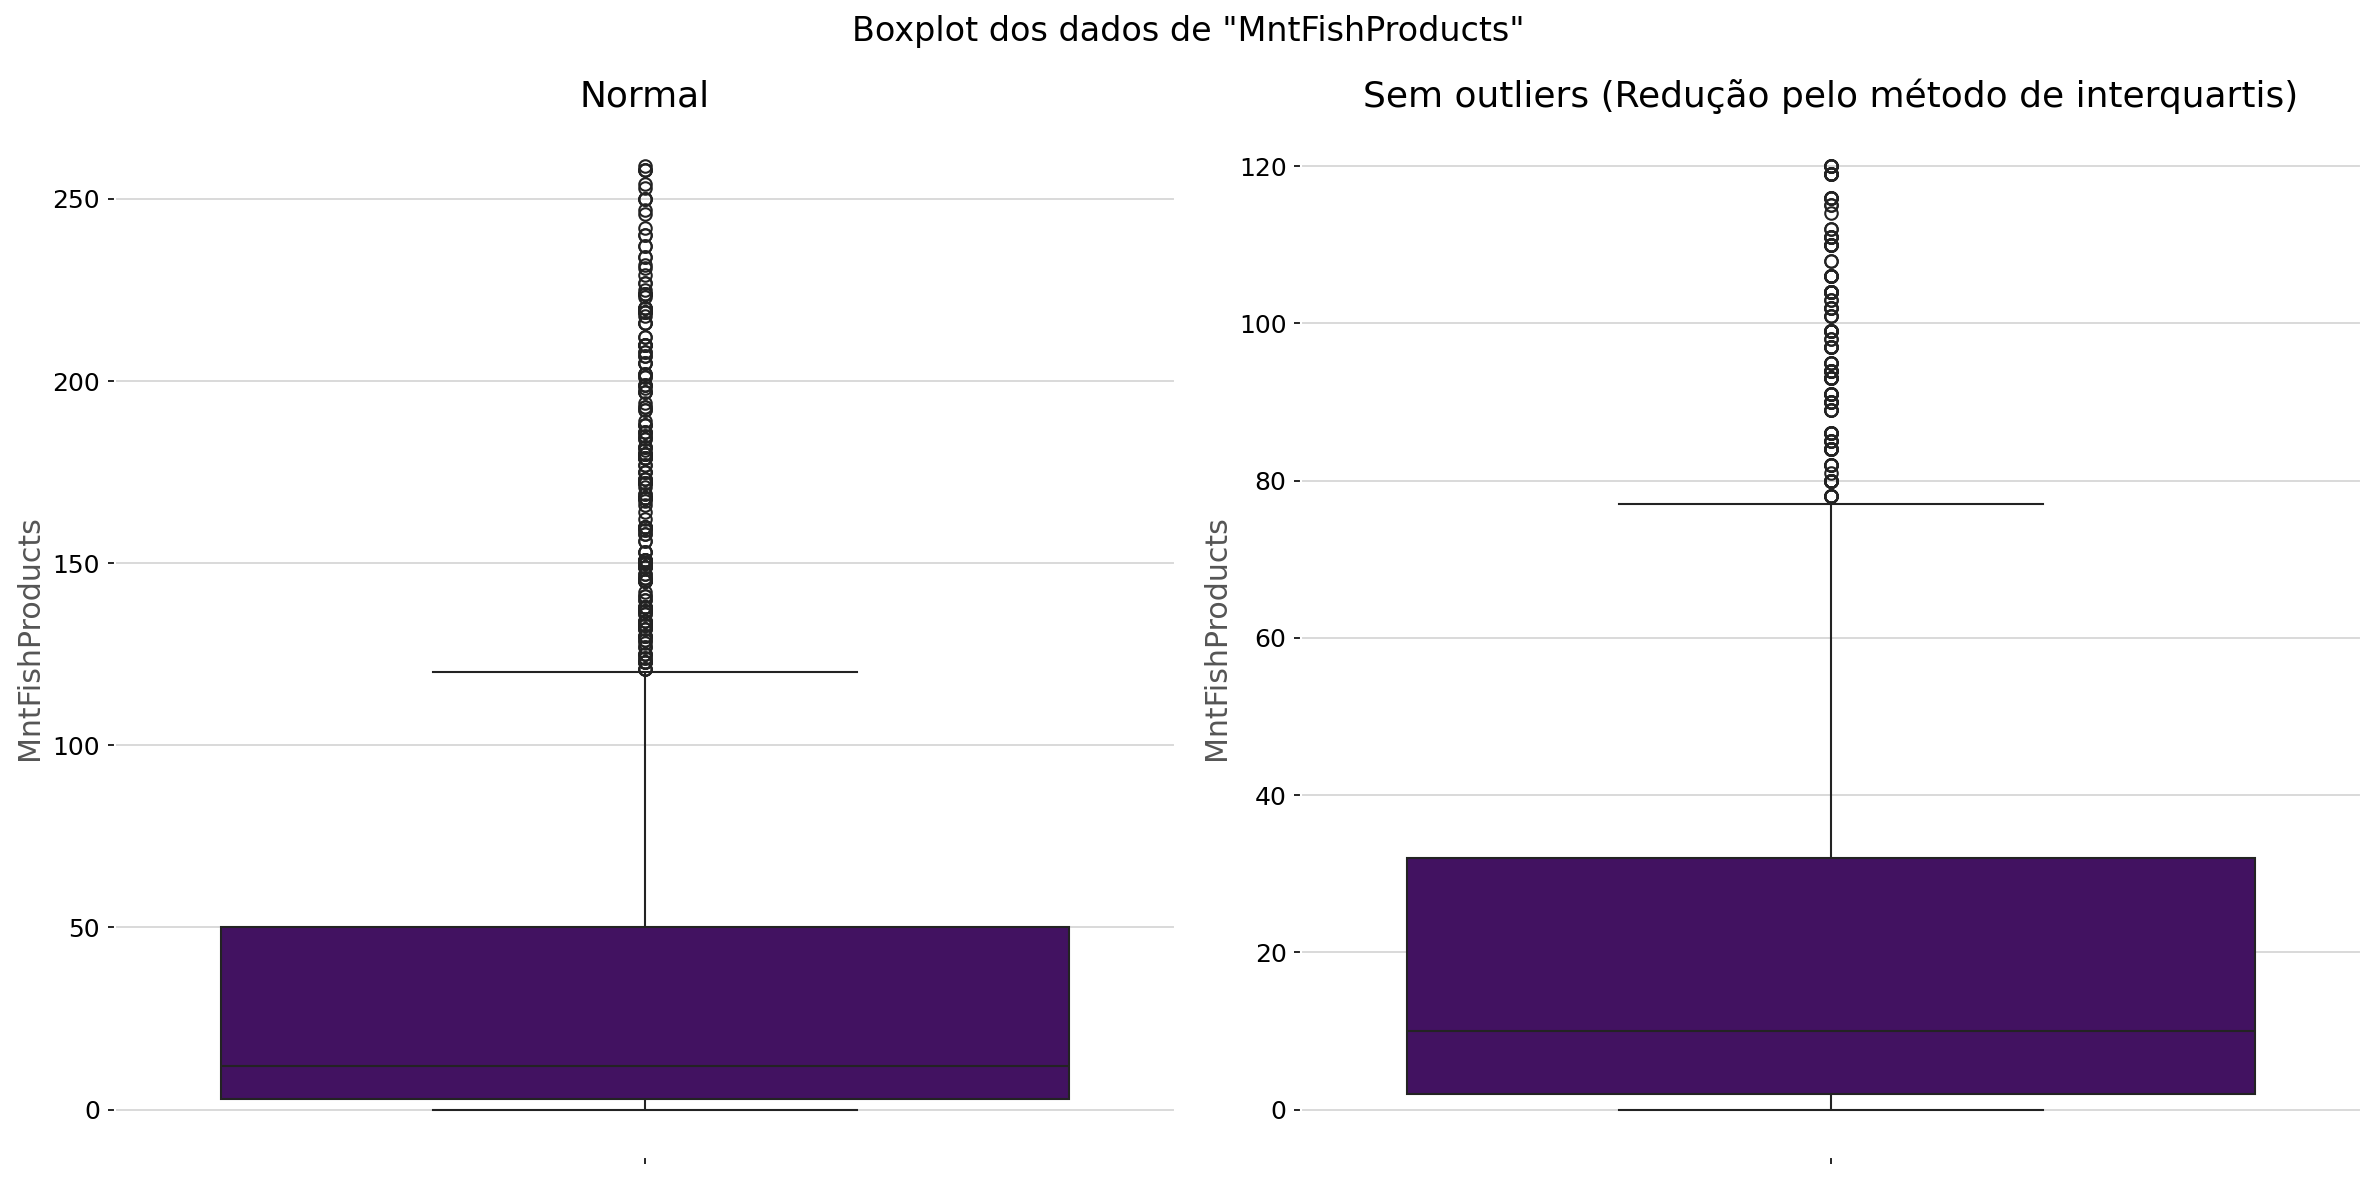

-----------------------------------------------------------------------------------------------------------------------------


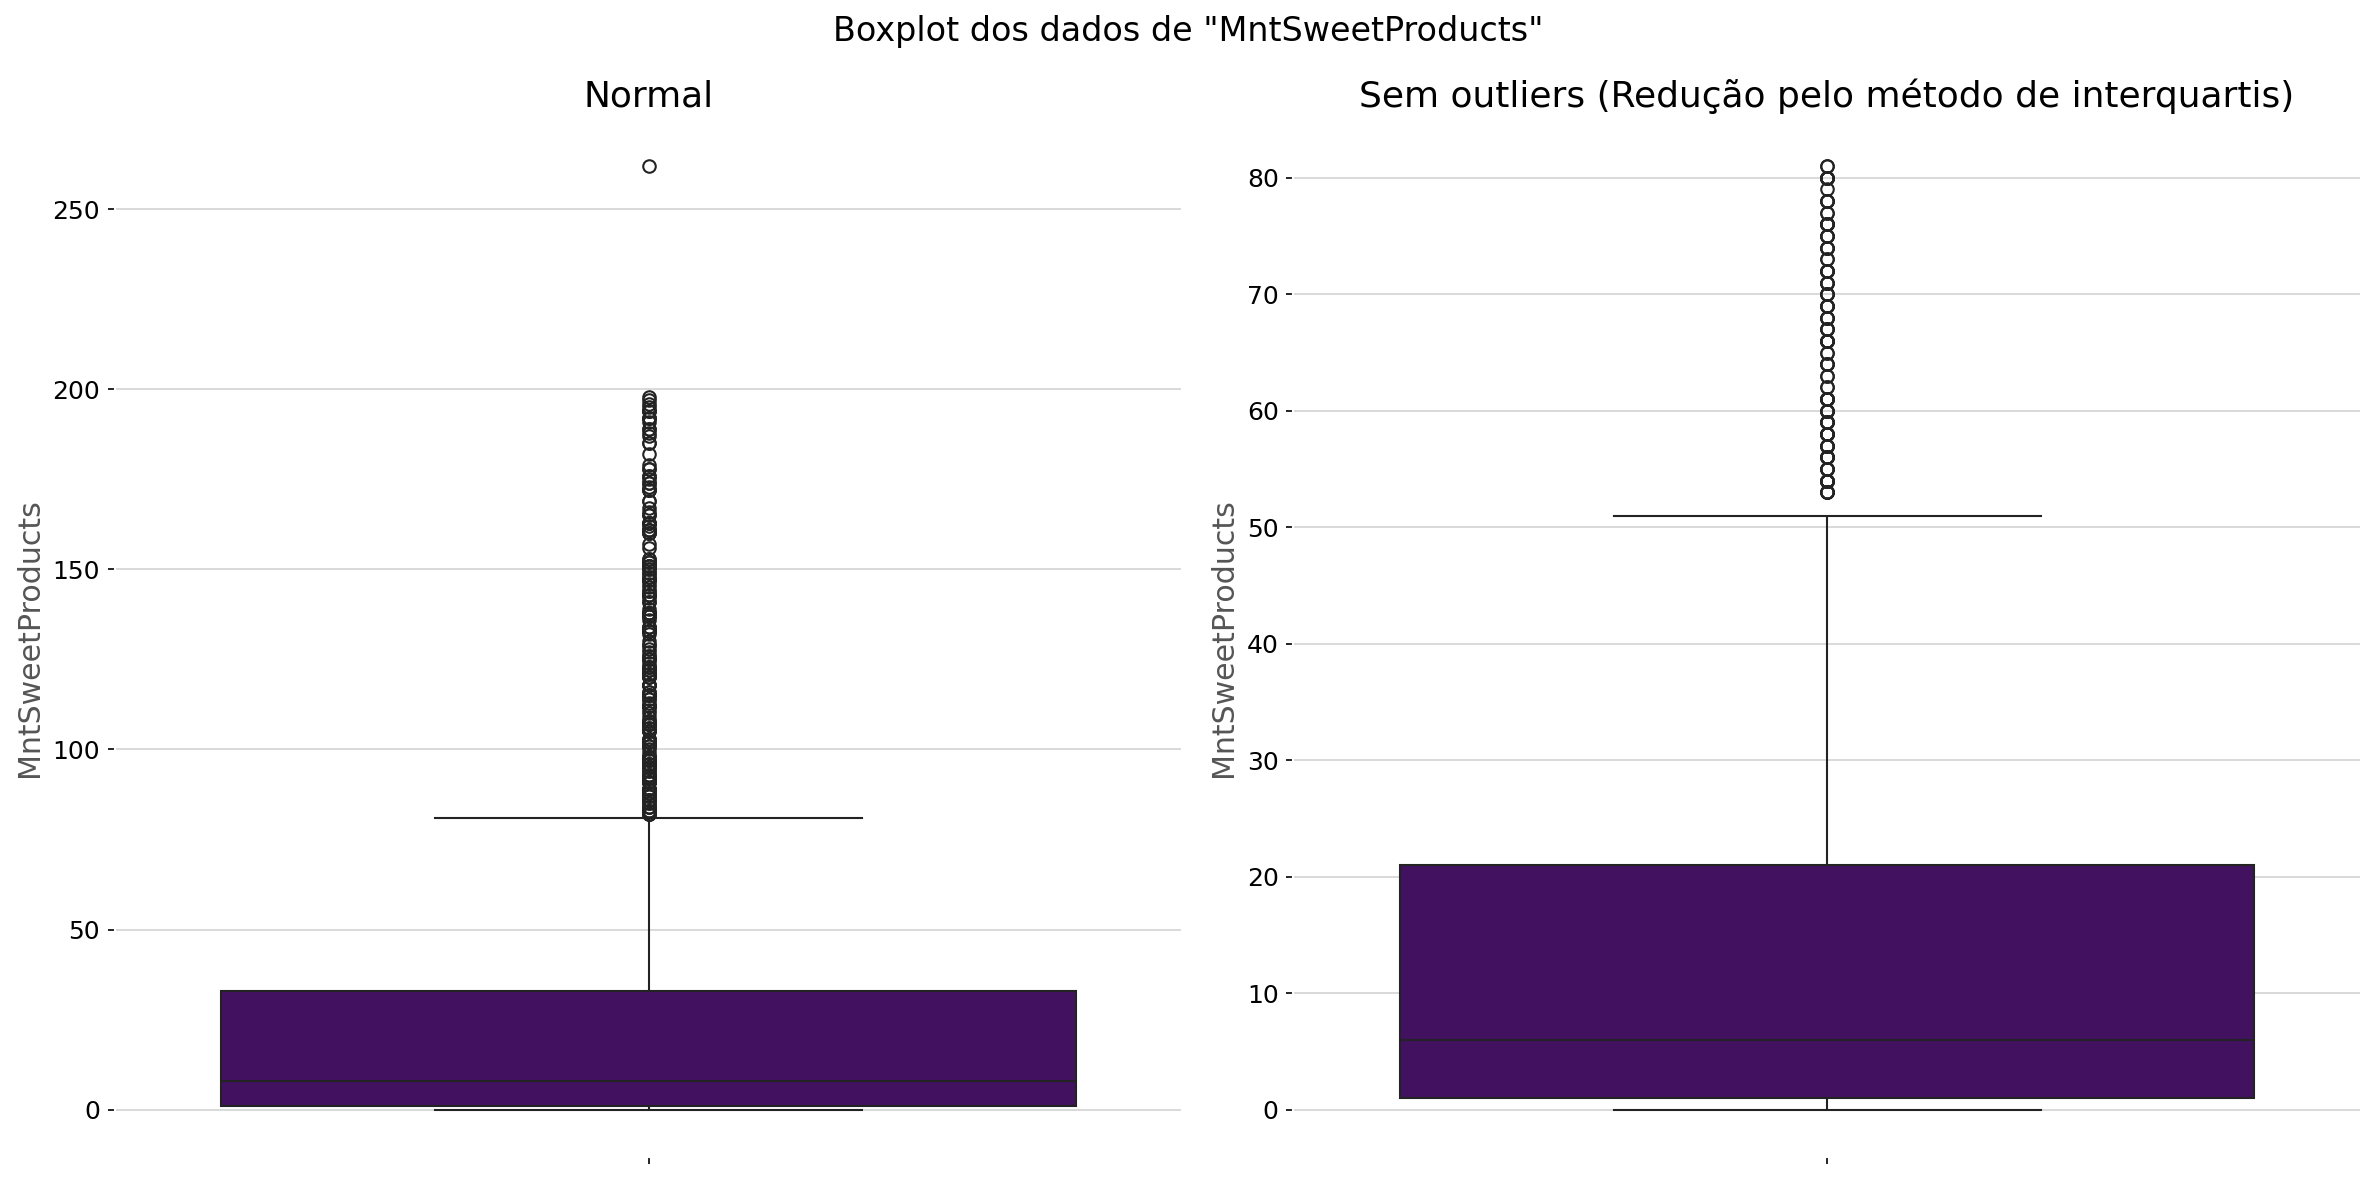

-----------------------------------------------------------------------------------------------------------------------------


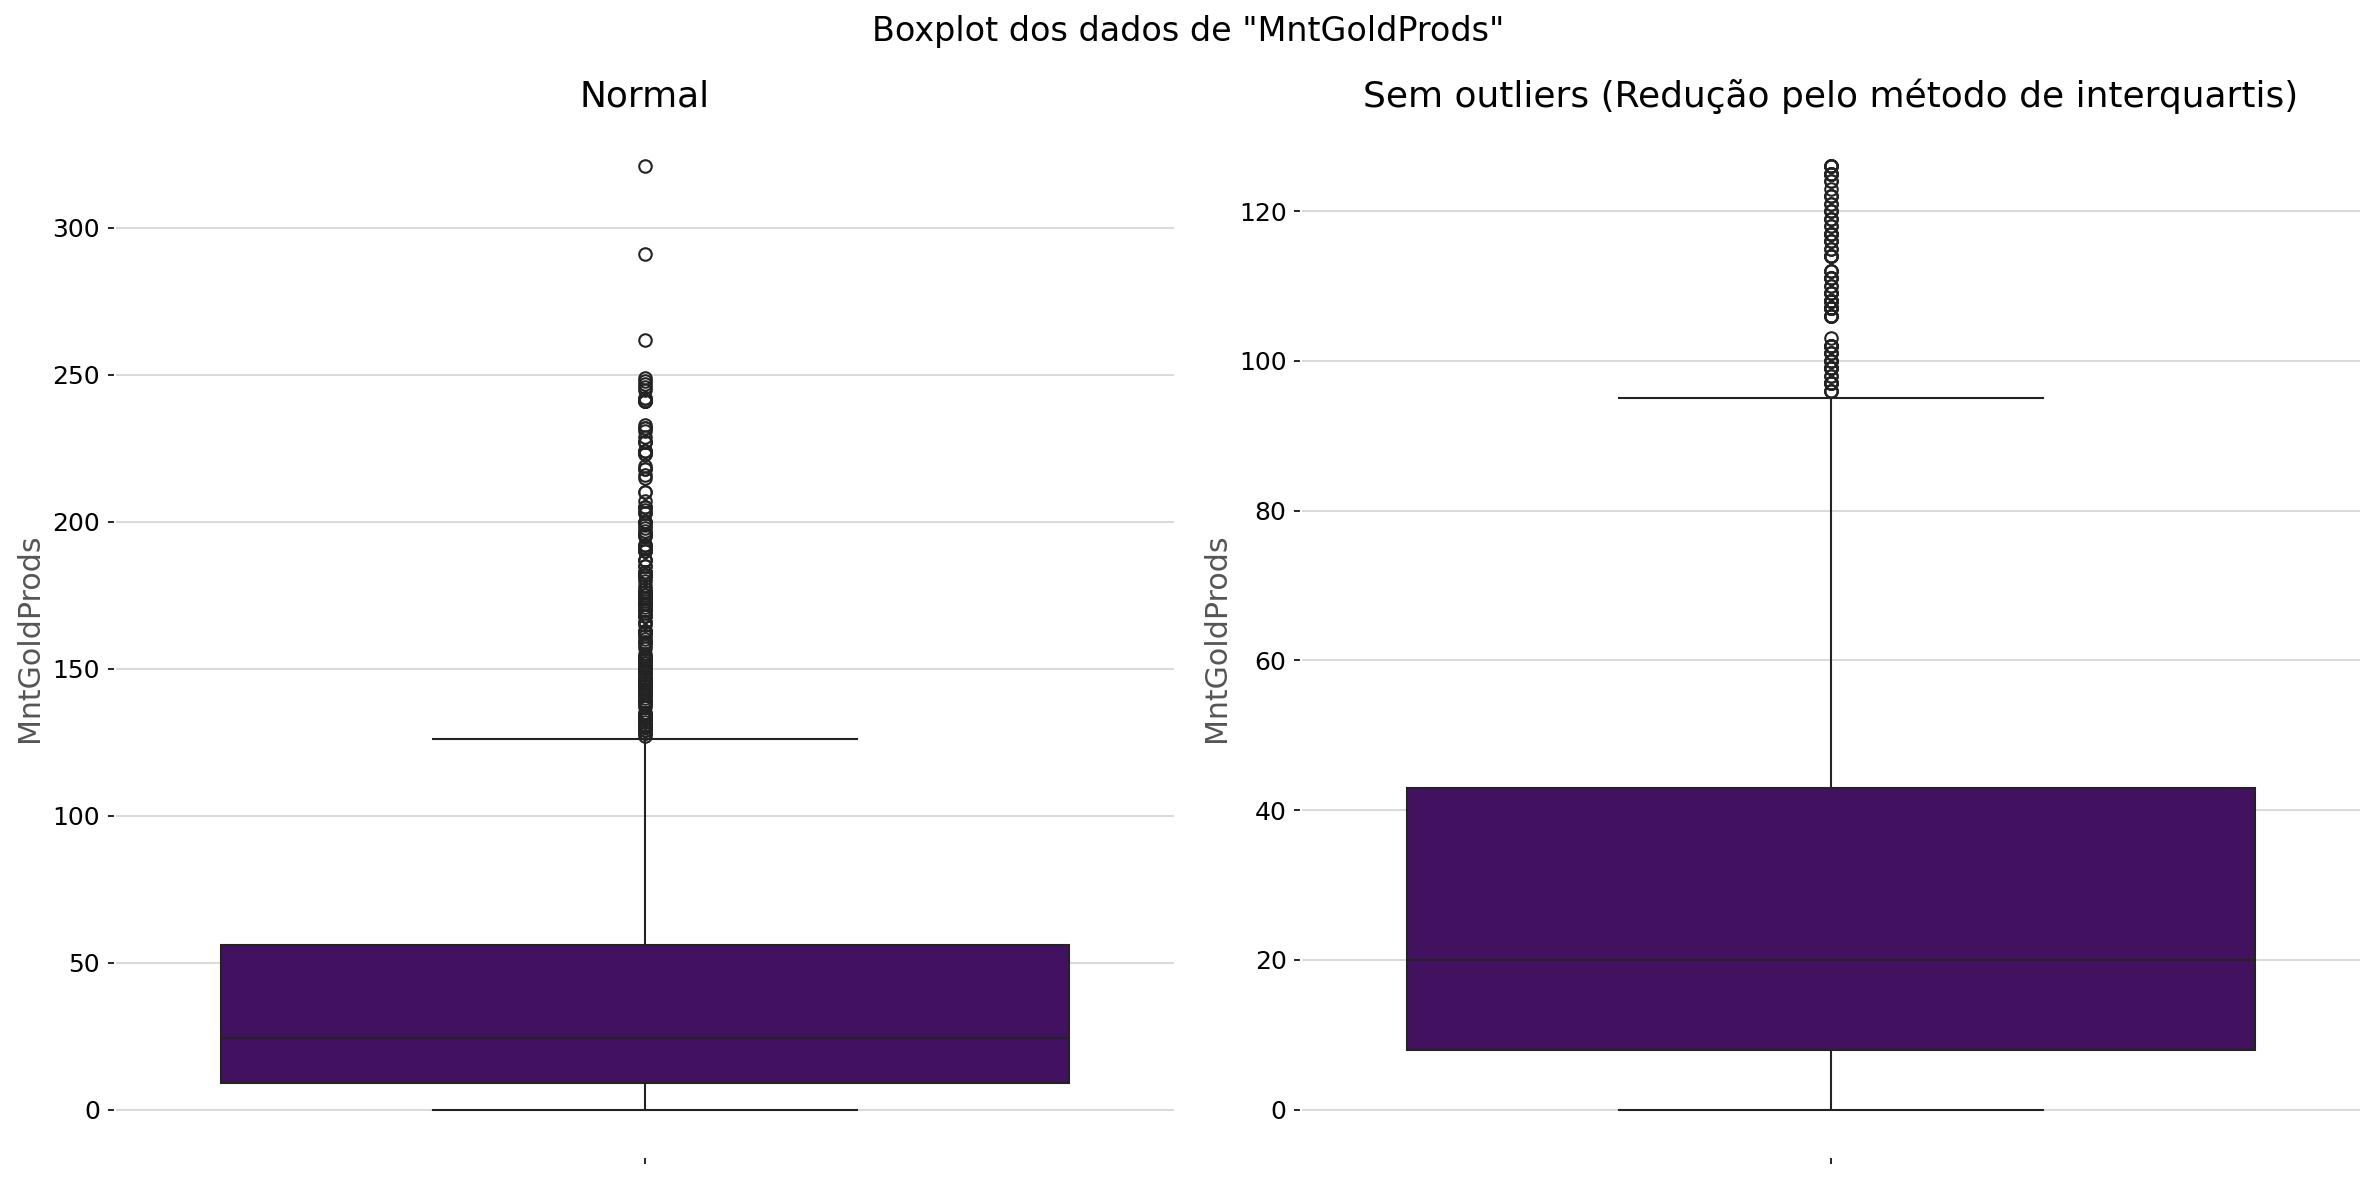

-----------------------------------------------------------------------------------------------------------------------------


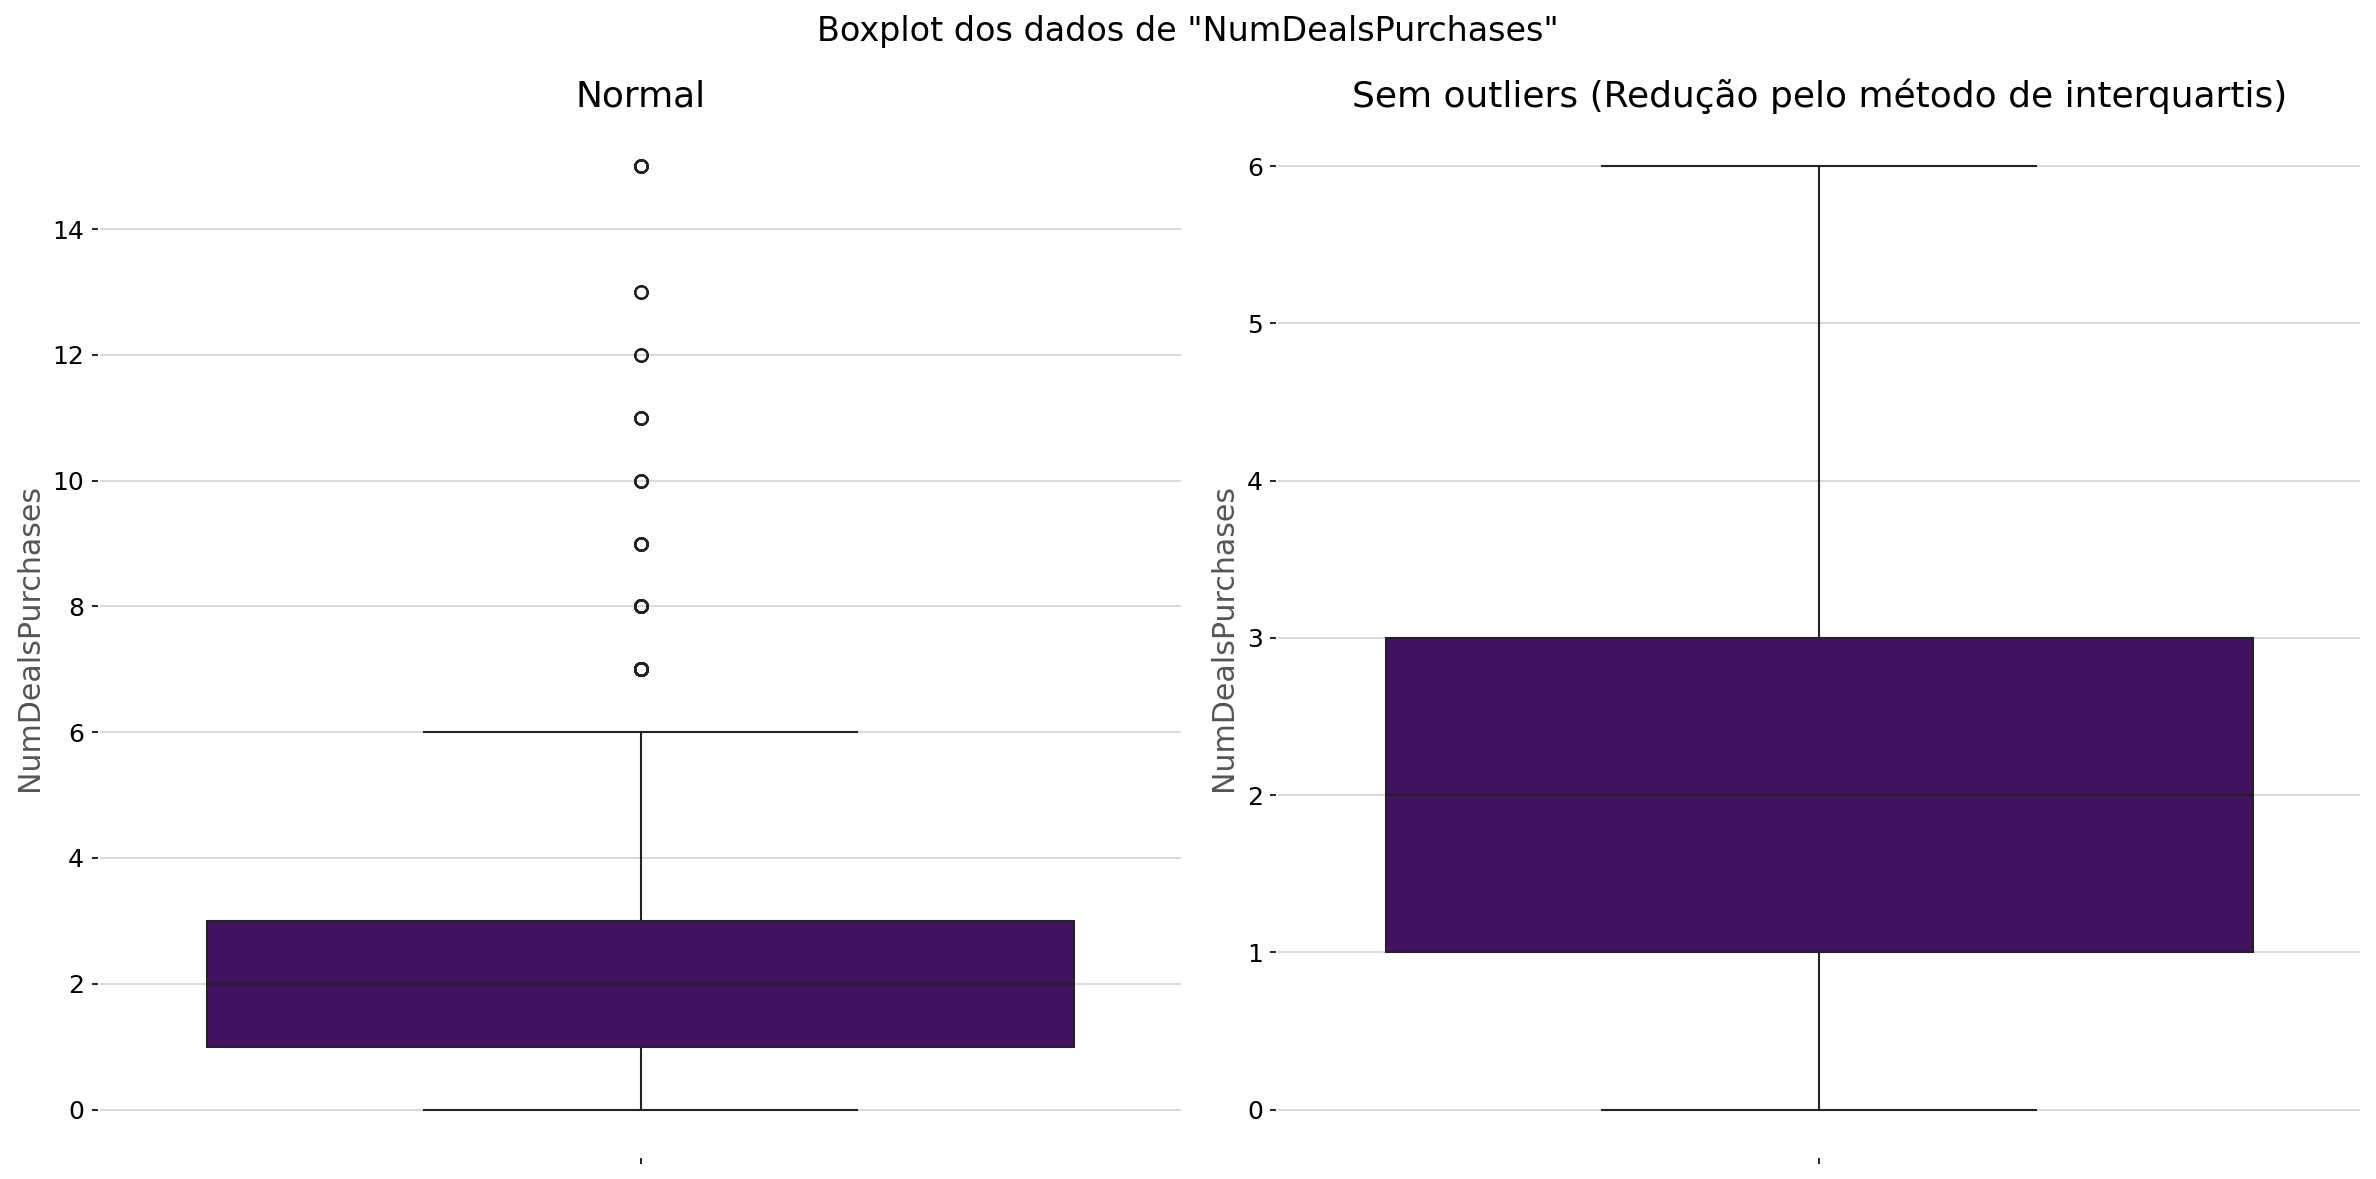

-----------------------------------------------------------------------------------------------------------------------------


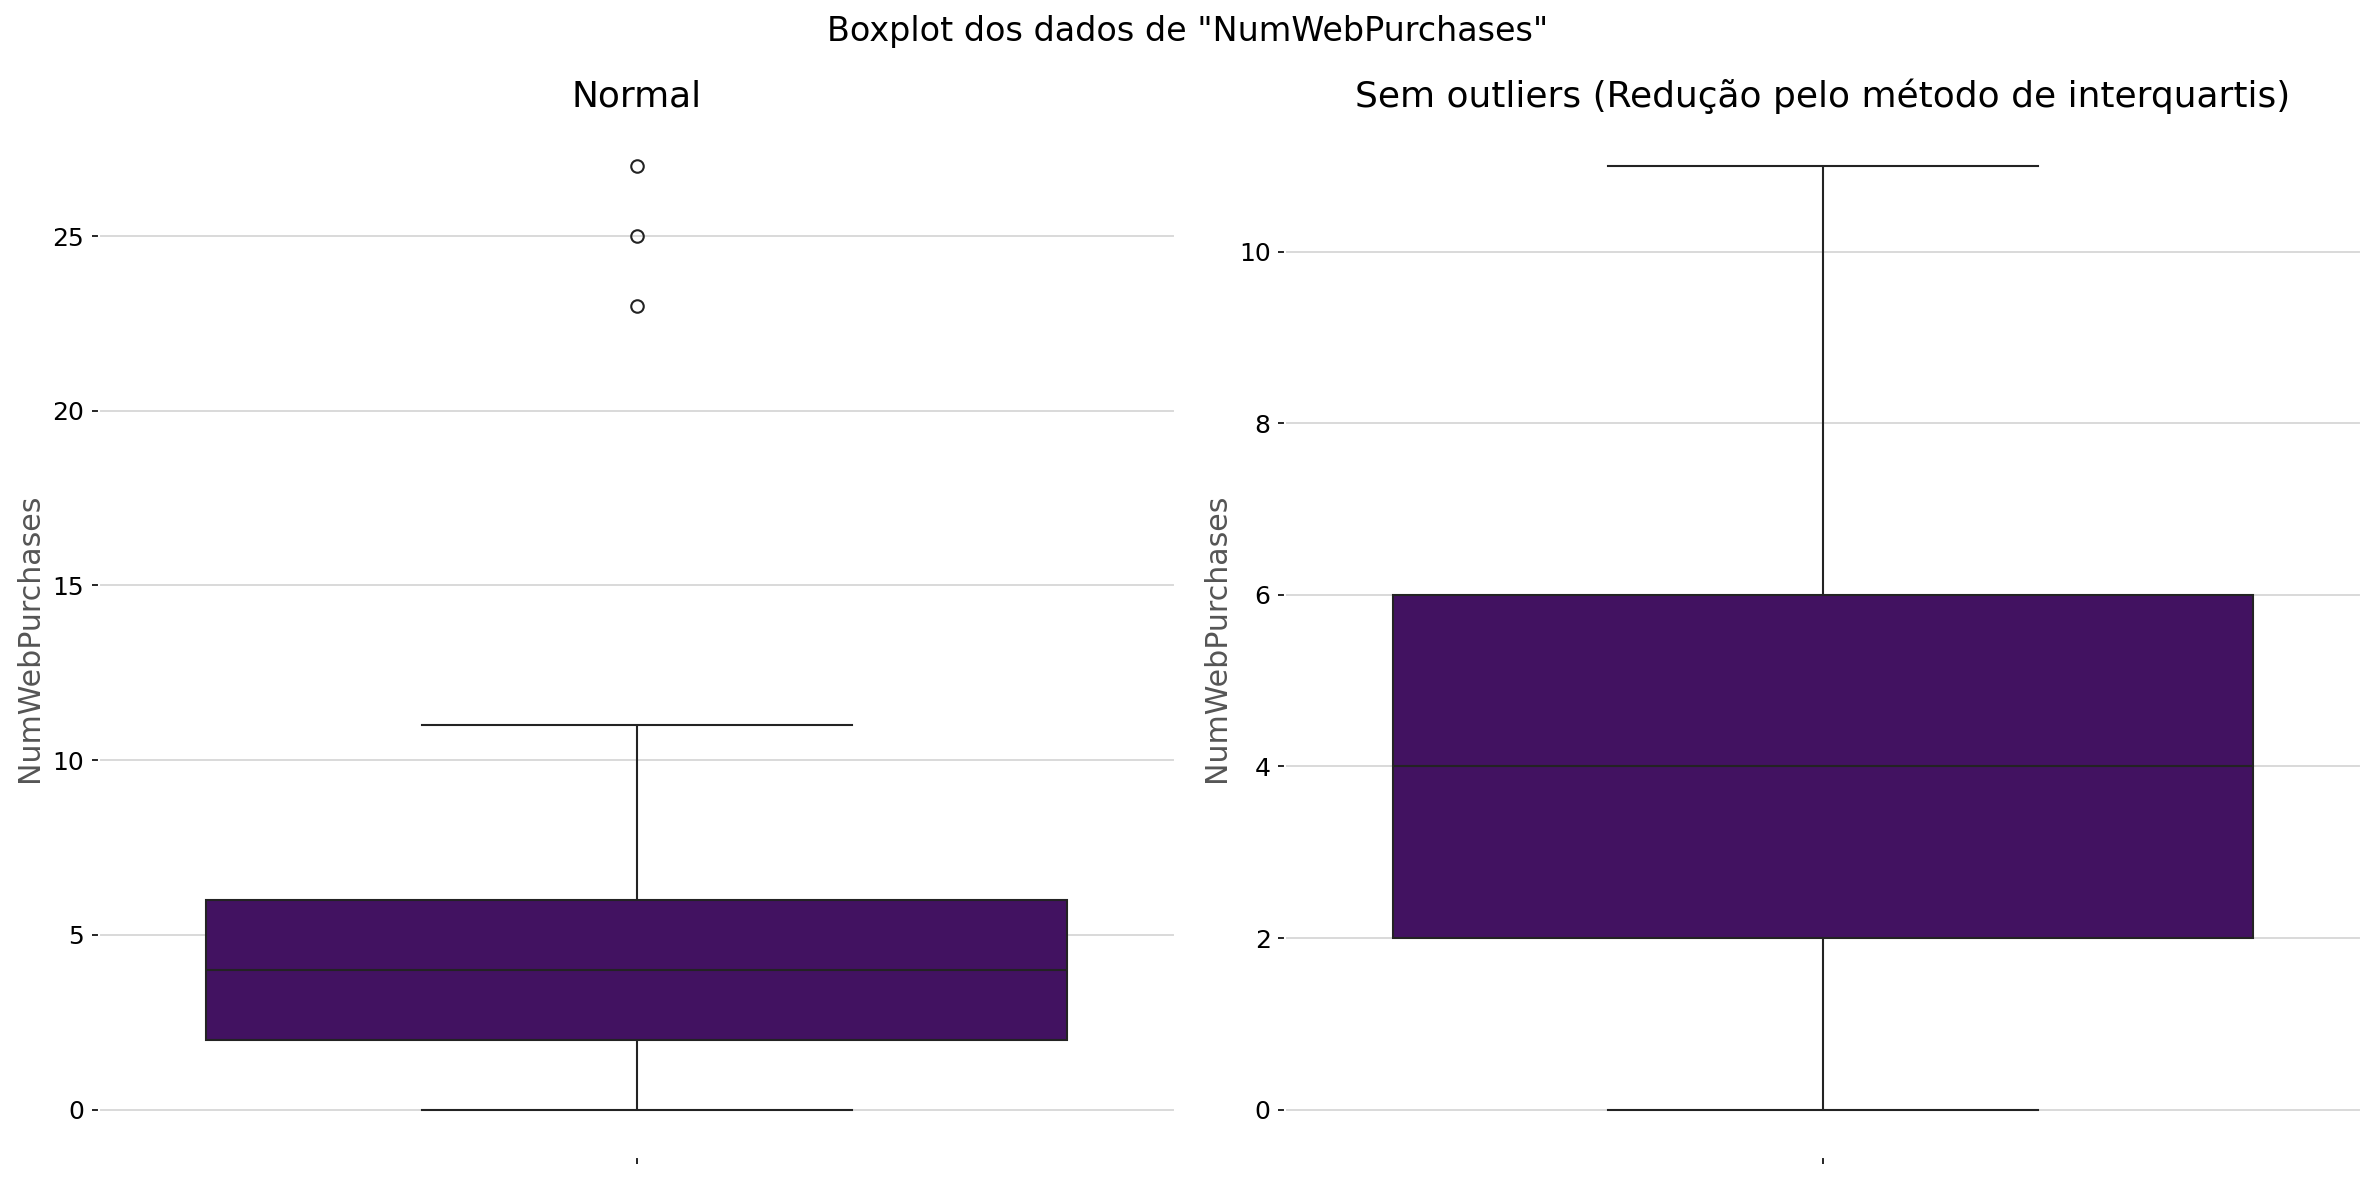

-----------------------------------------------------------------------------------------------------------------------------


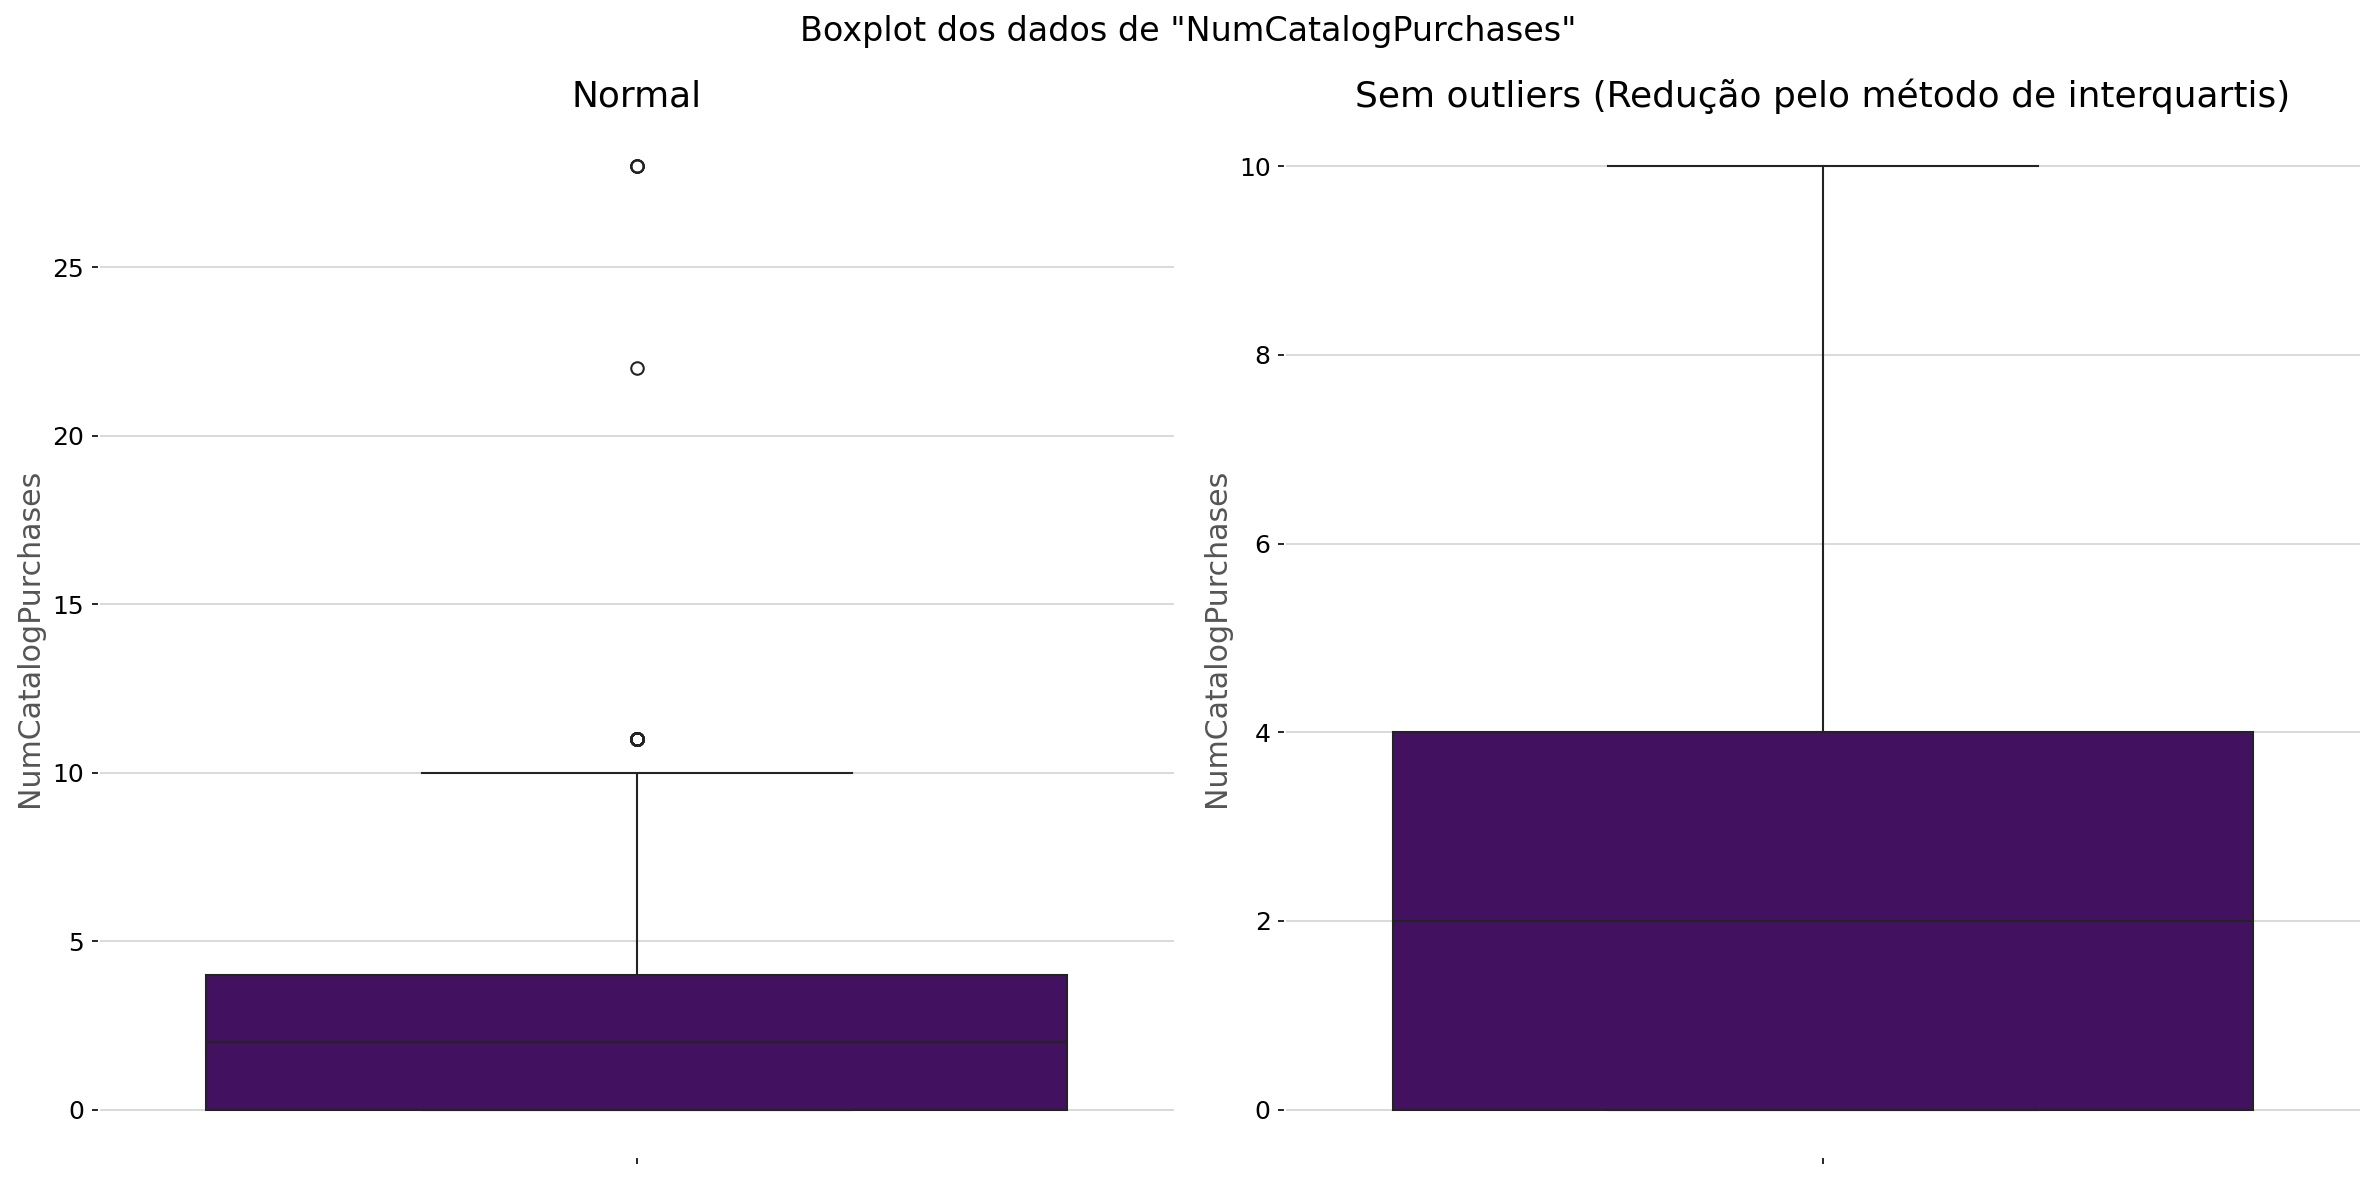

-----------------------------------------------------------------------------------------------------------------------------


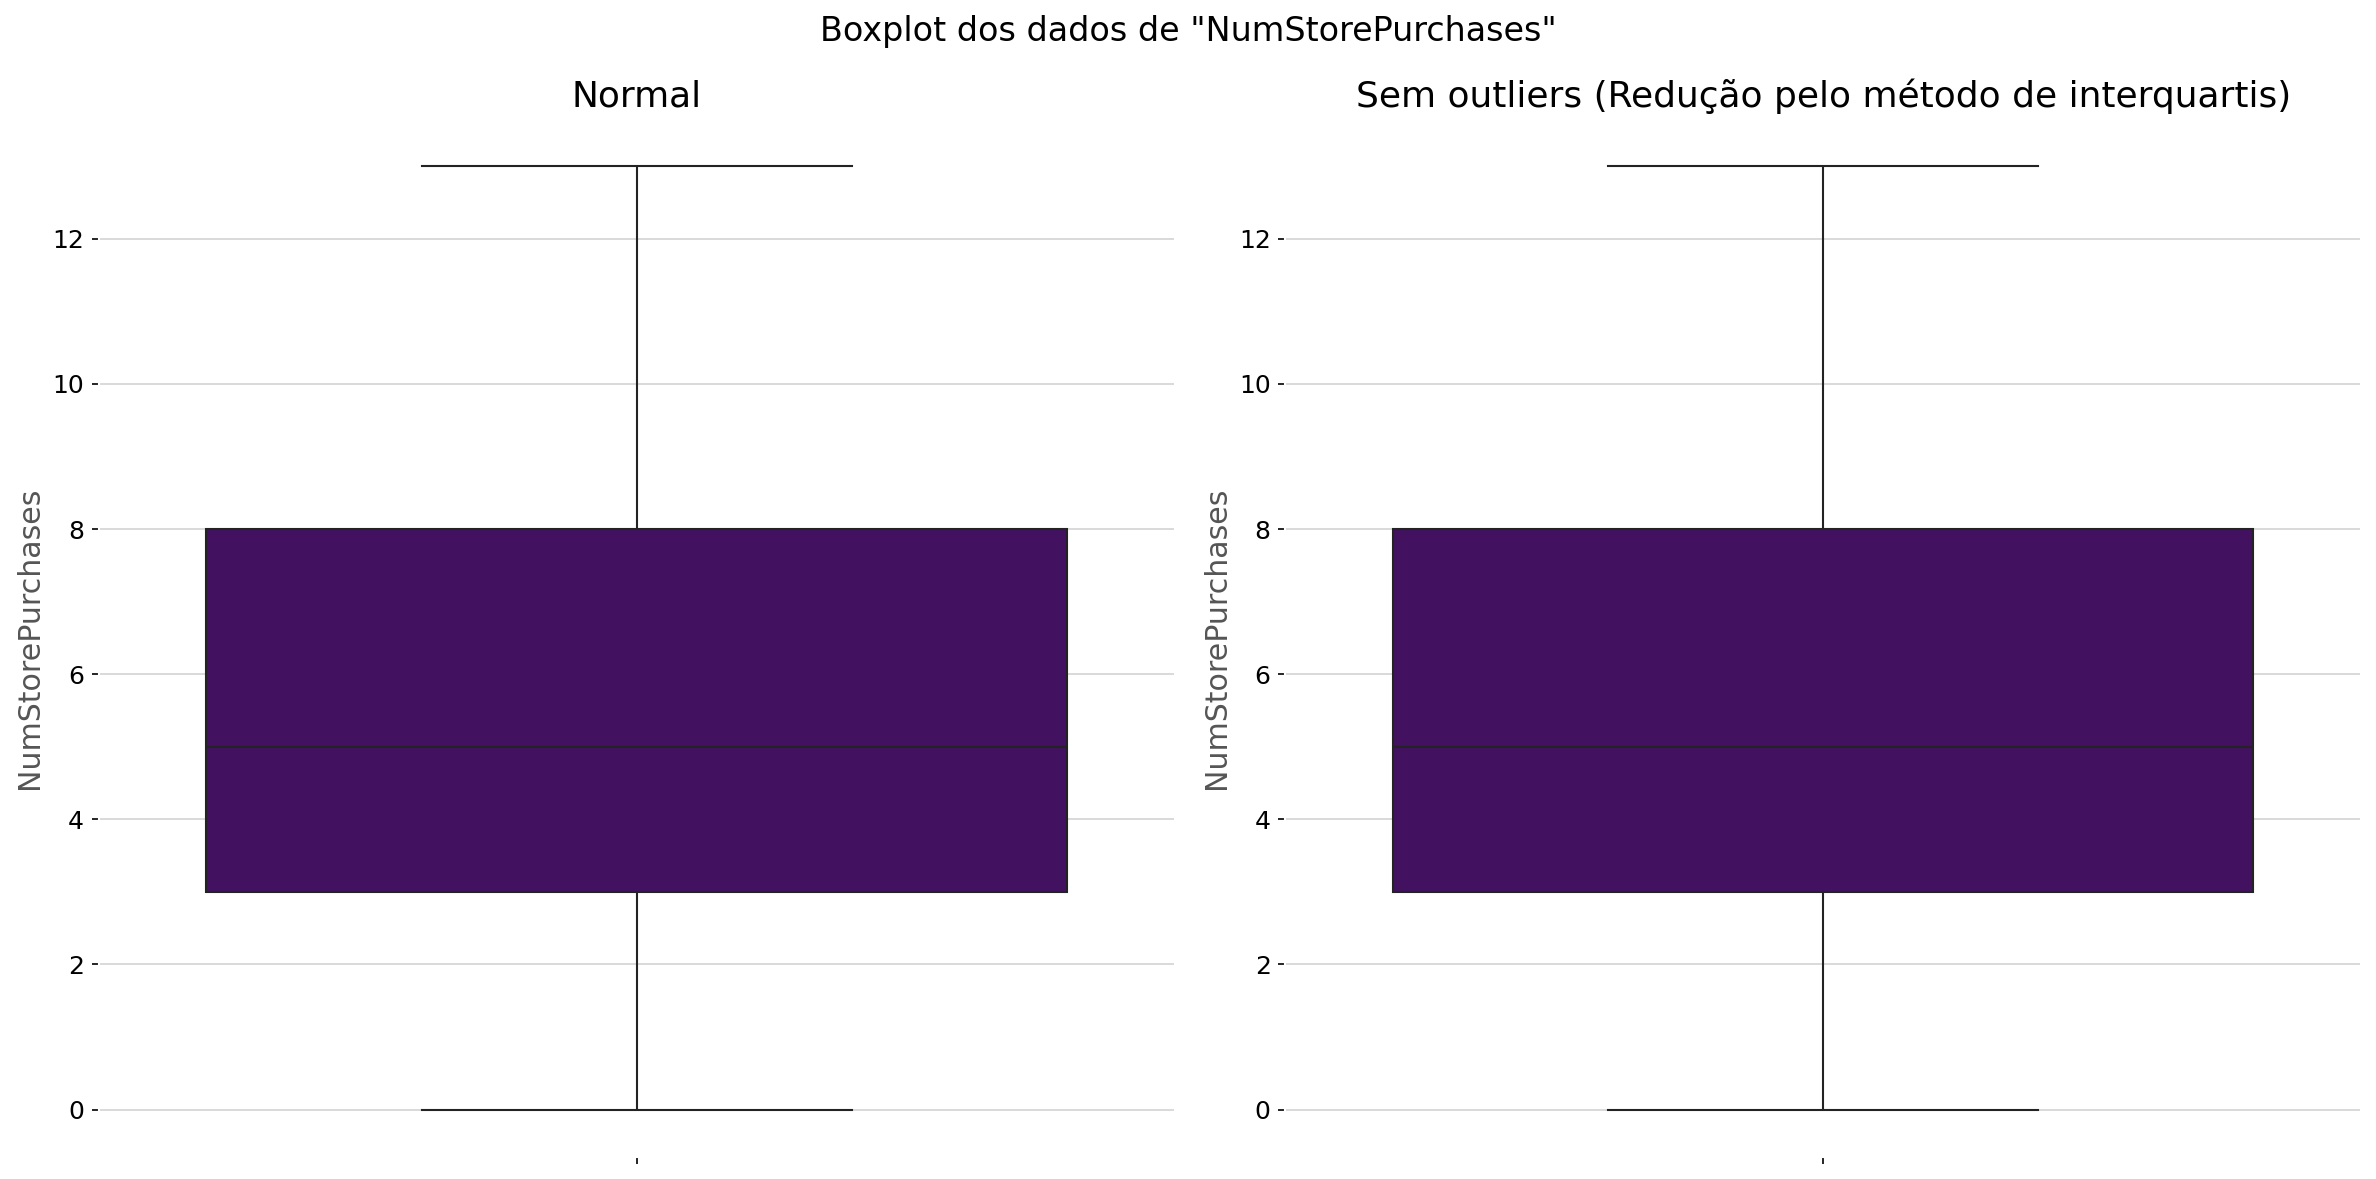

-----------------------------------------------------------------------------------------------------------------------------


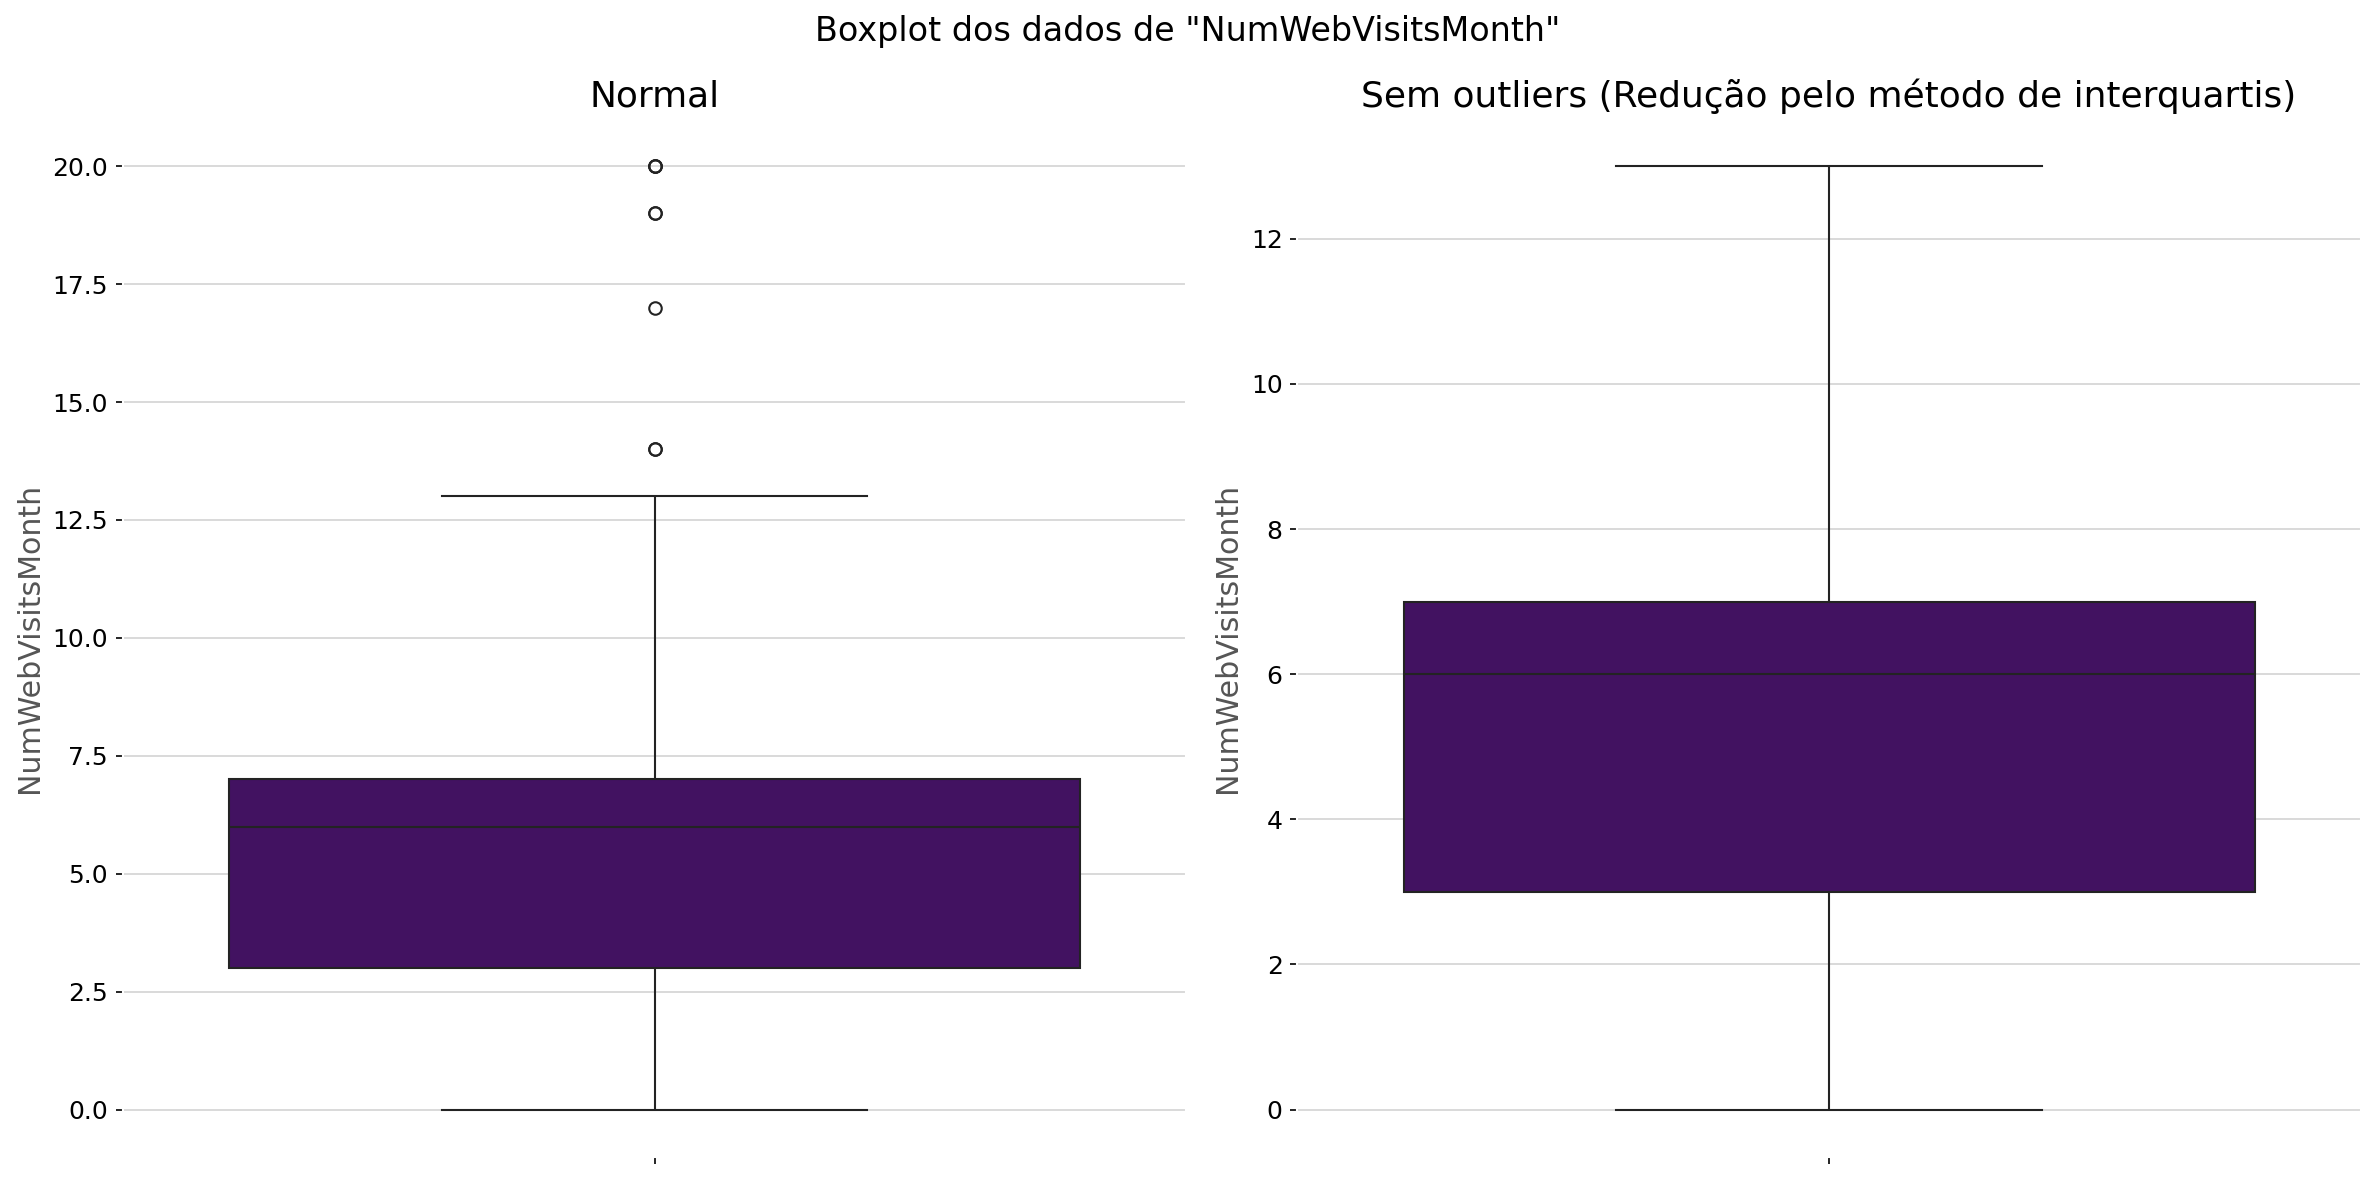

-----------------------------------------------------------------------------------------------------------------------------


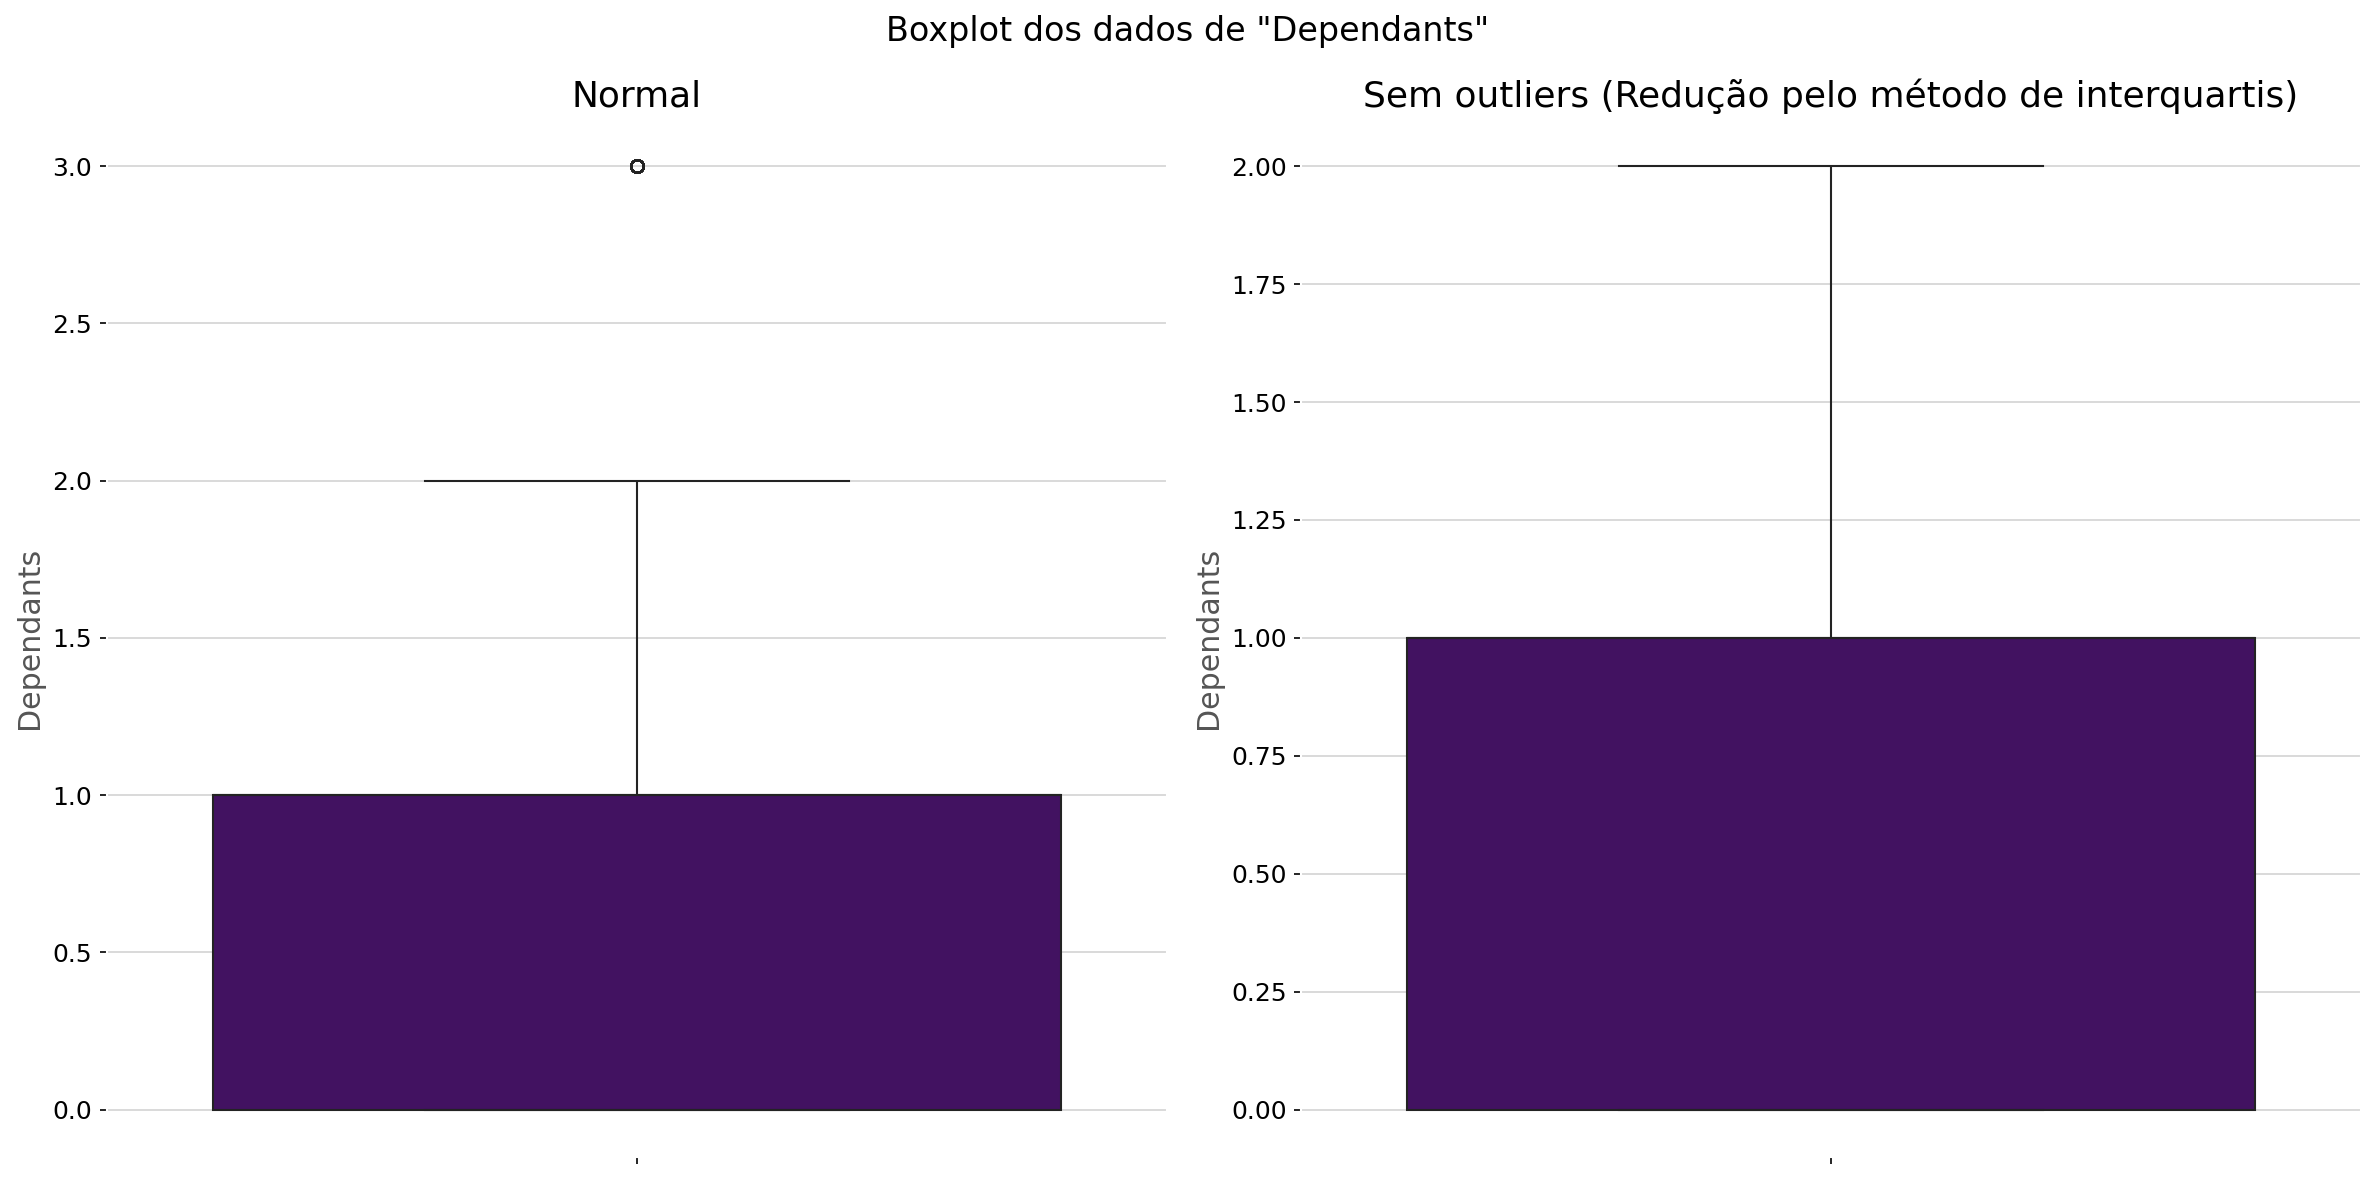

-----------------------------------------------------------------------------------------------------------------------------


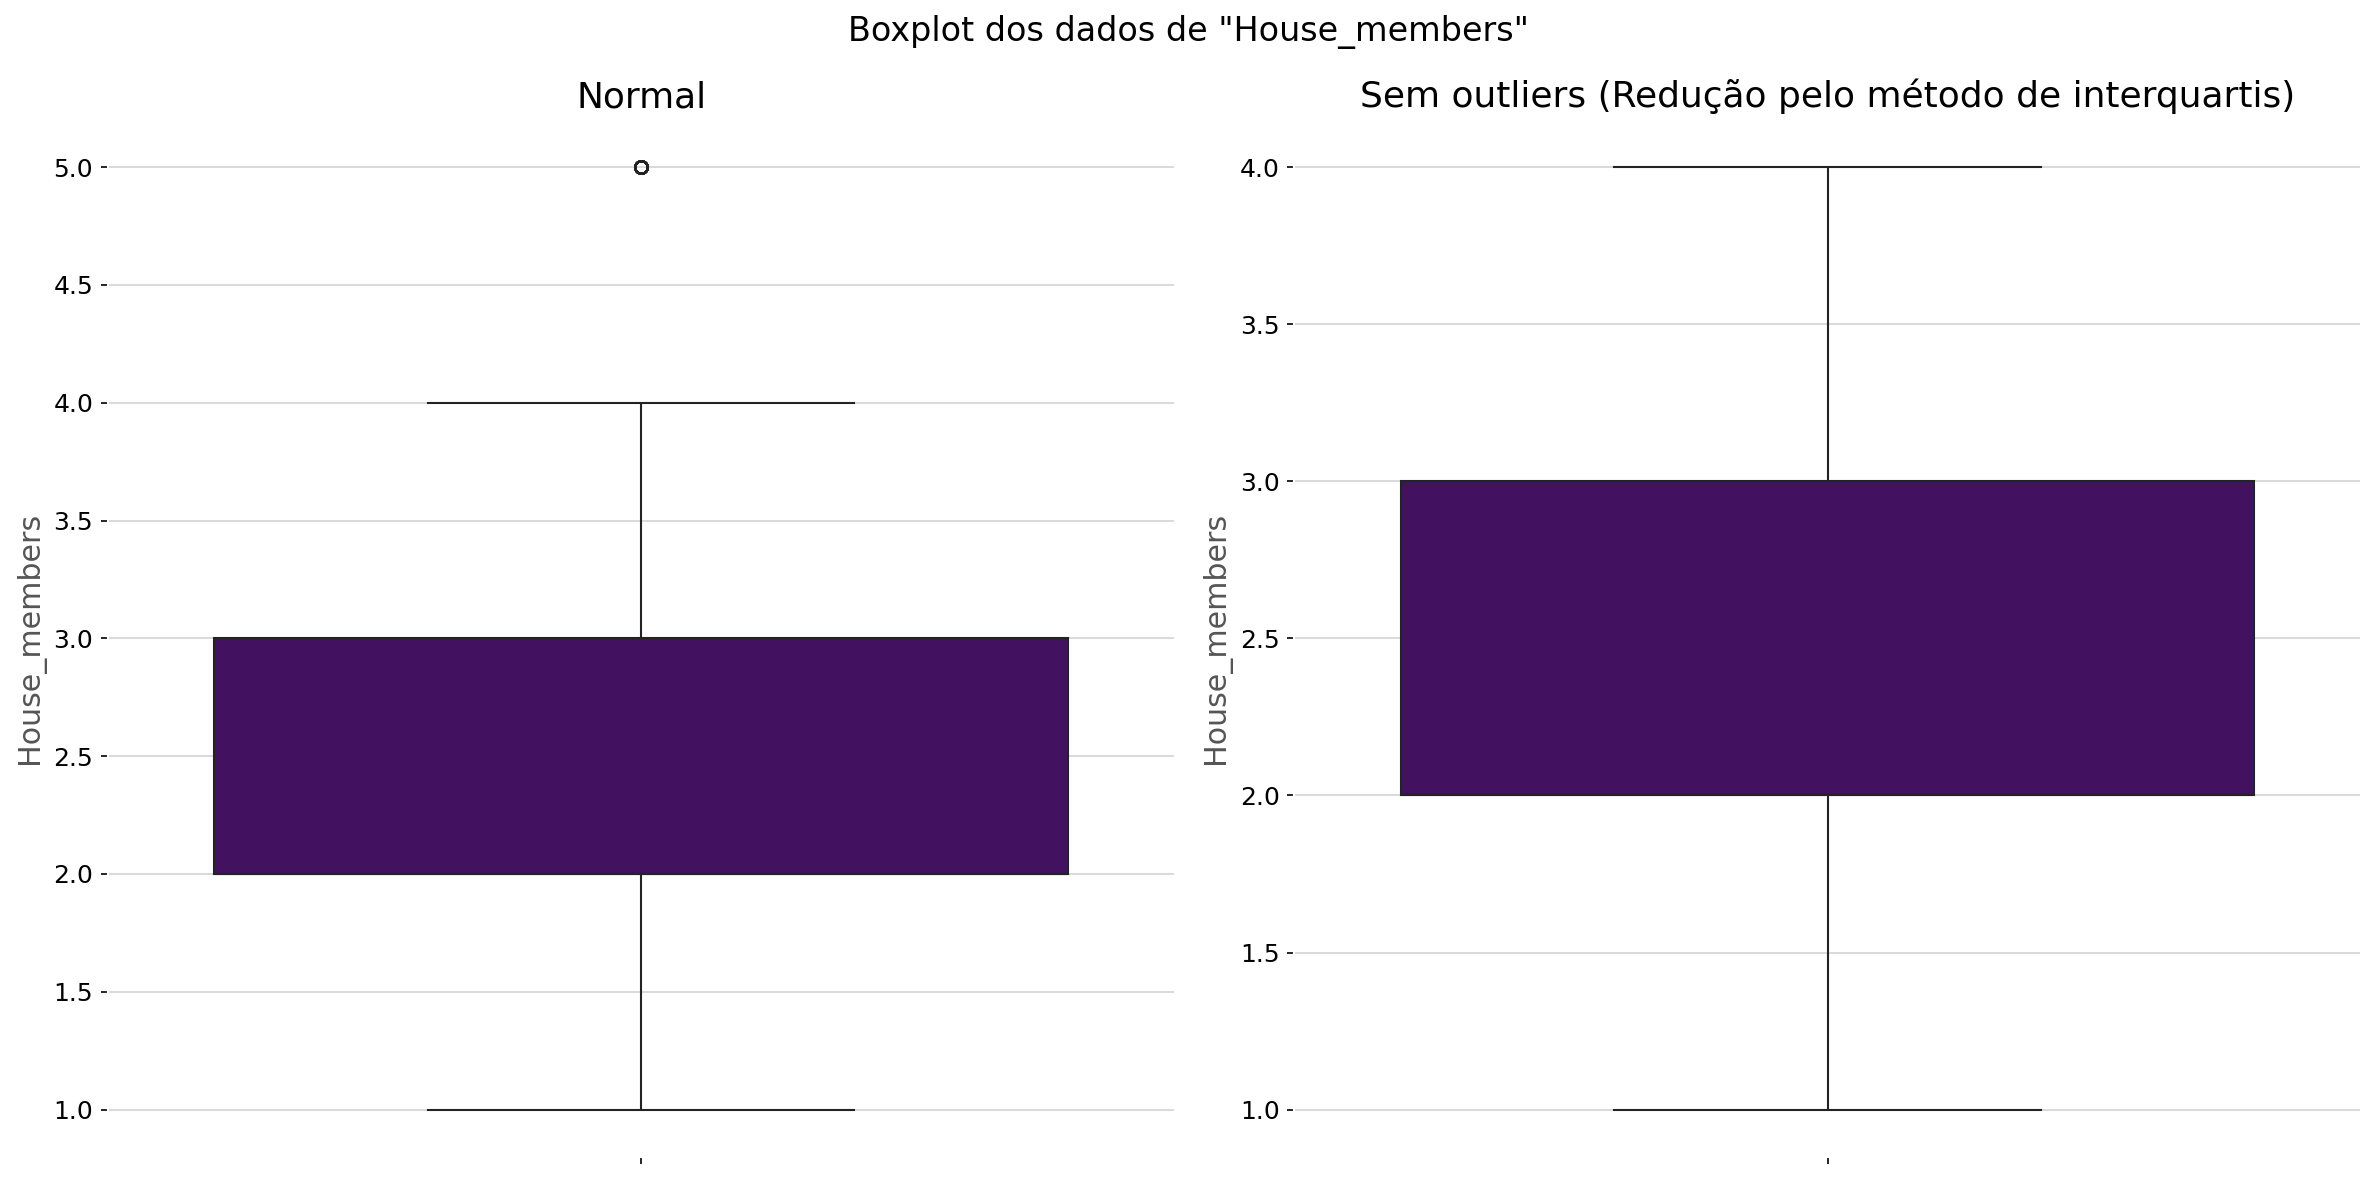

-----------------------------------------------------------------------------------------------------------------------------


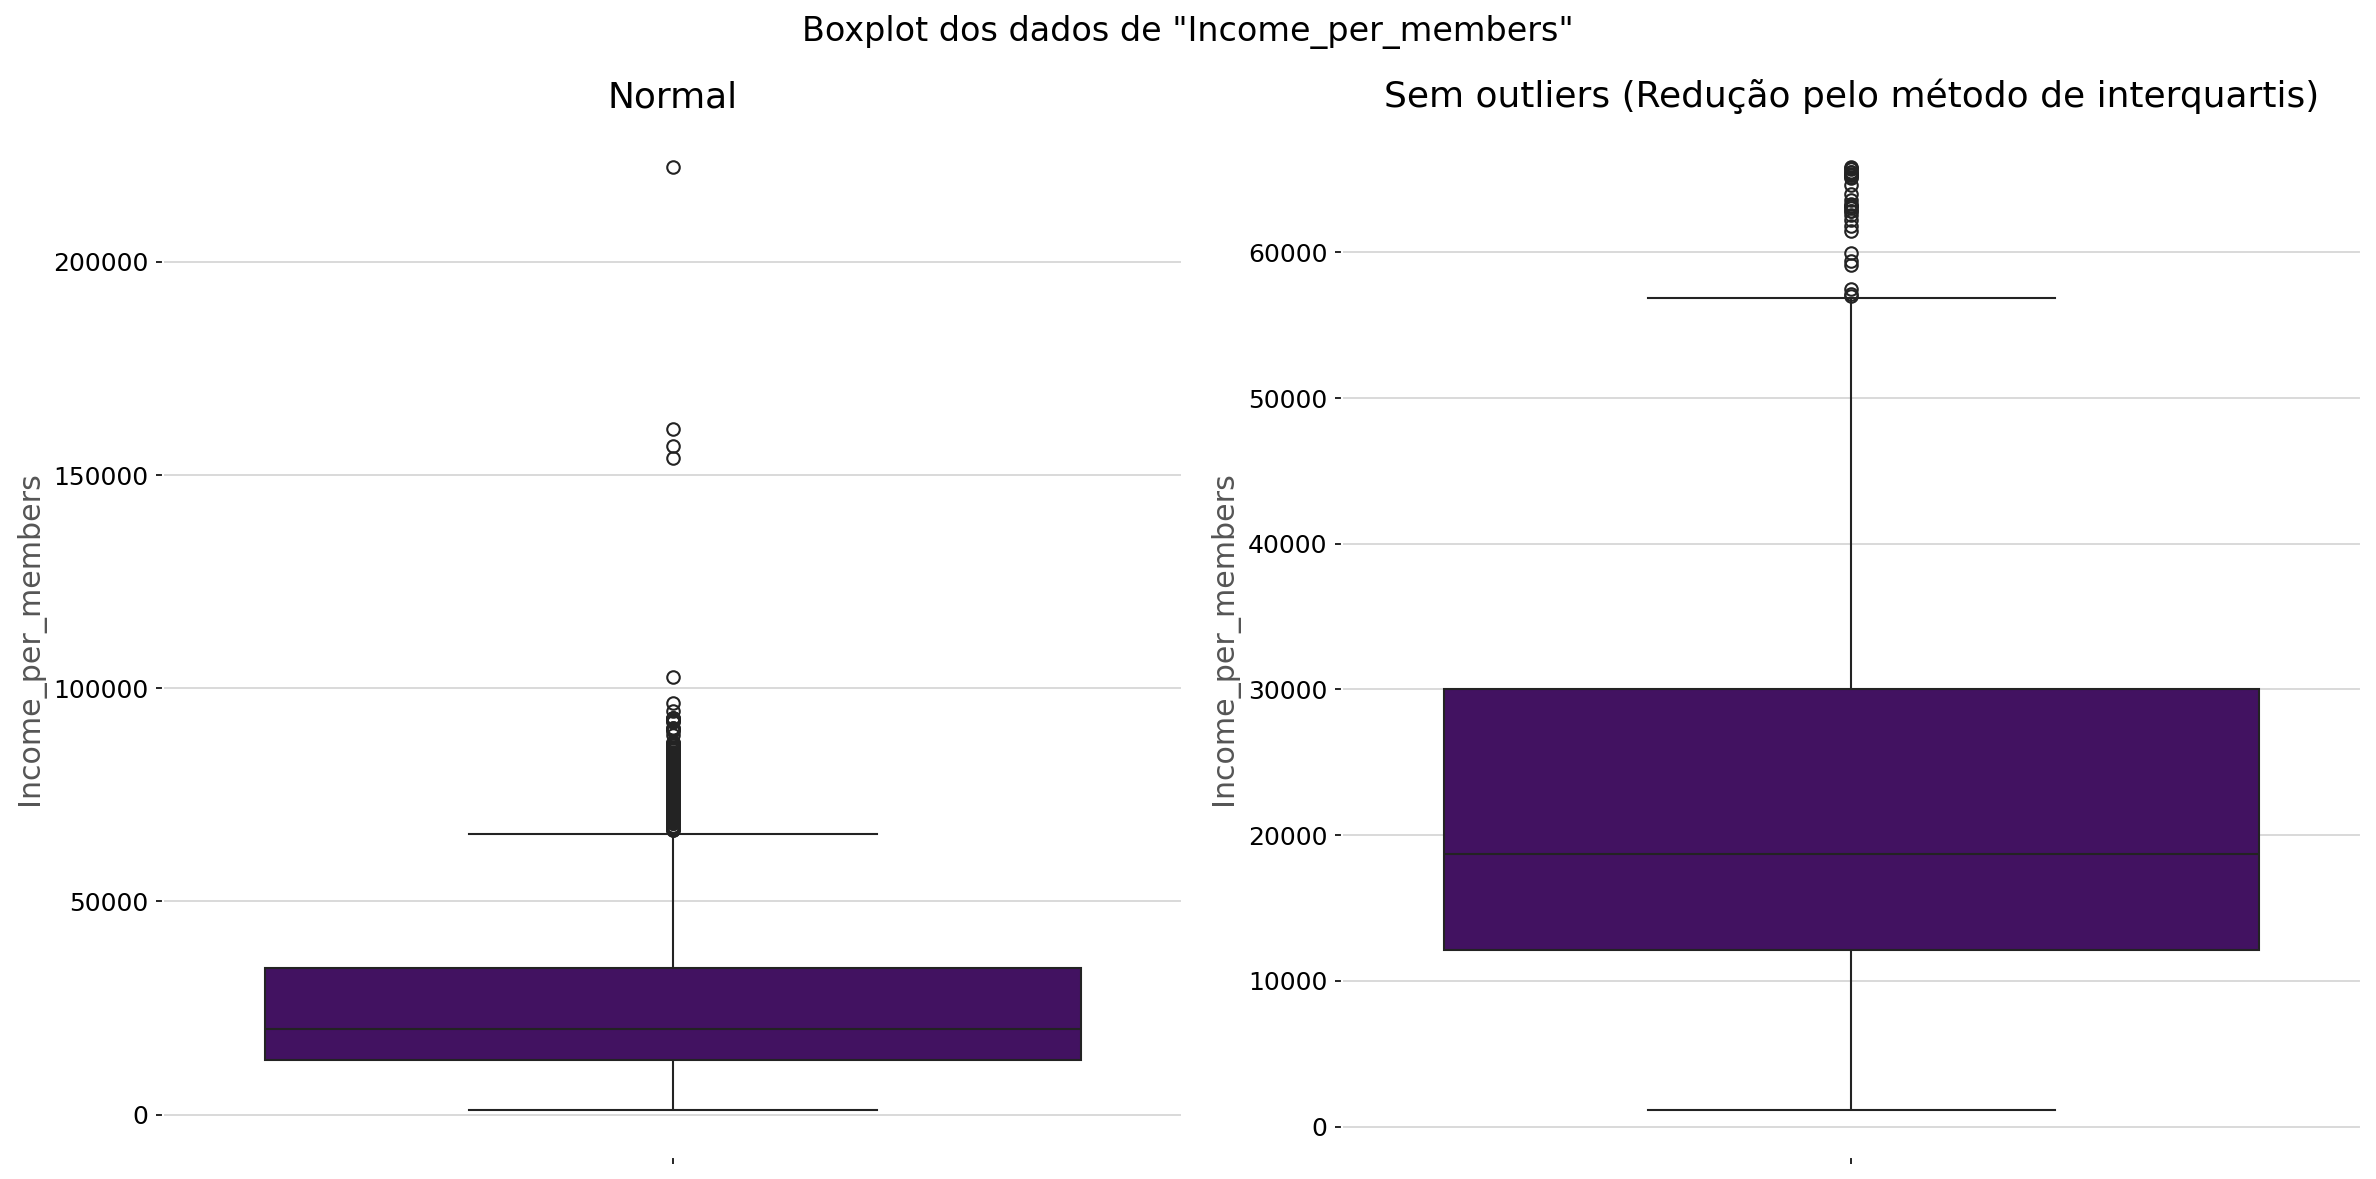

-----------------------------------------------------------------------------------------------------------------------------


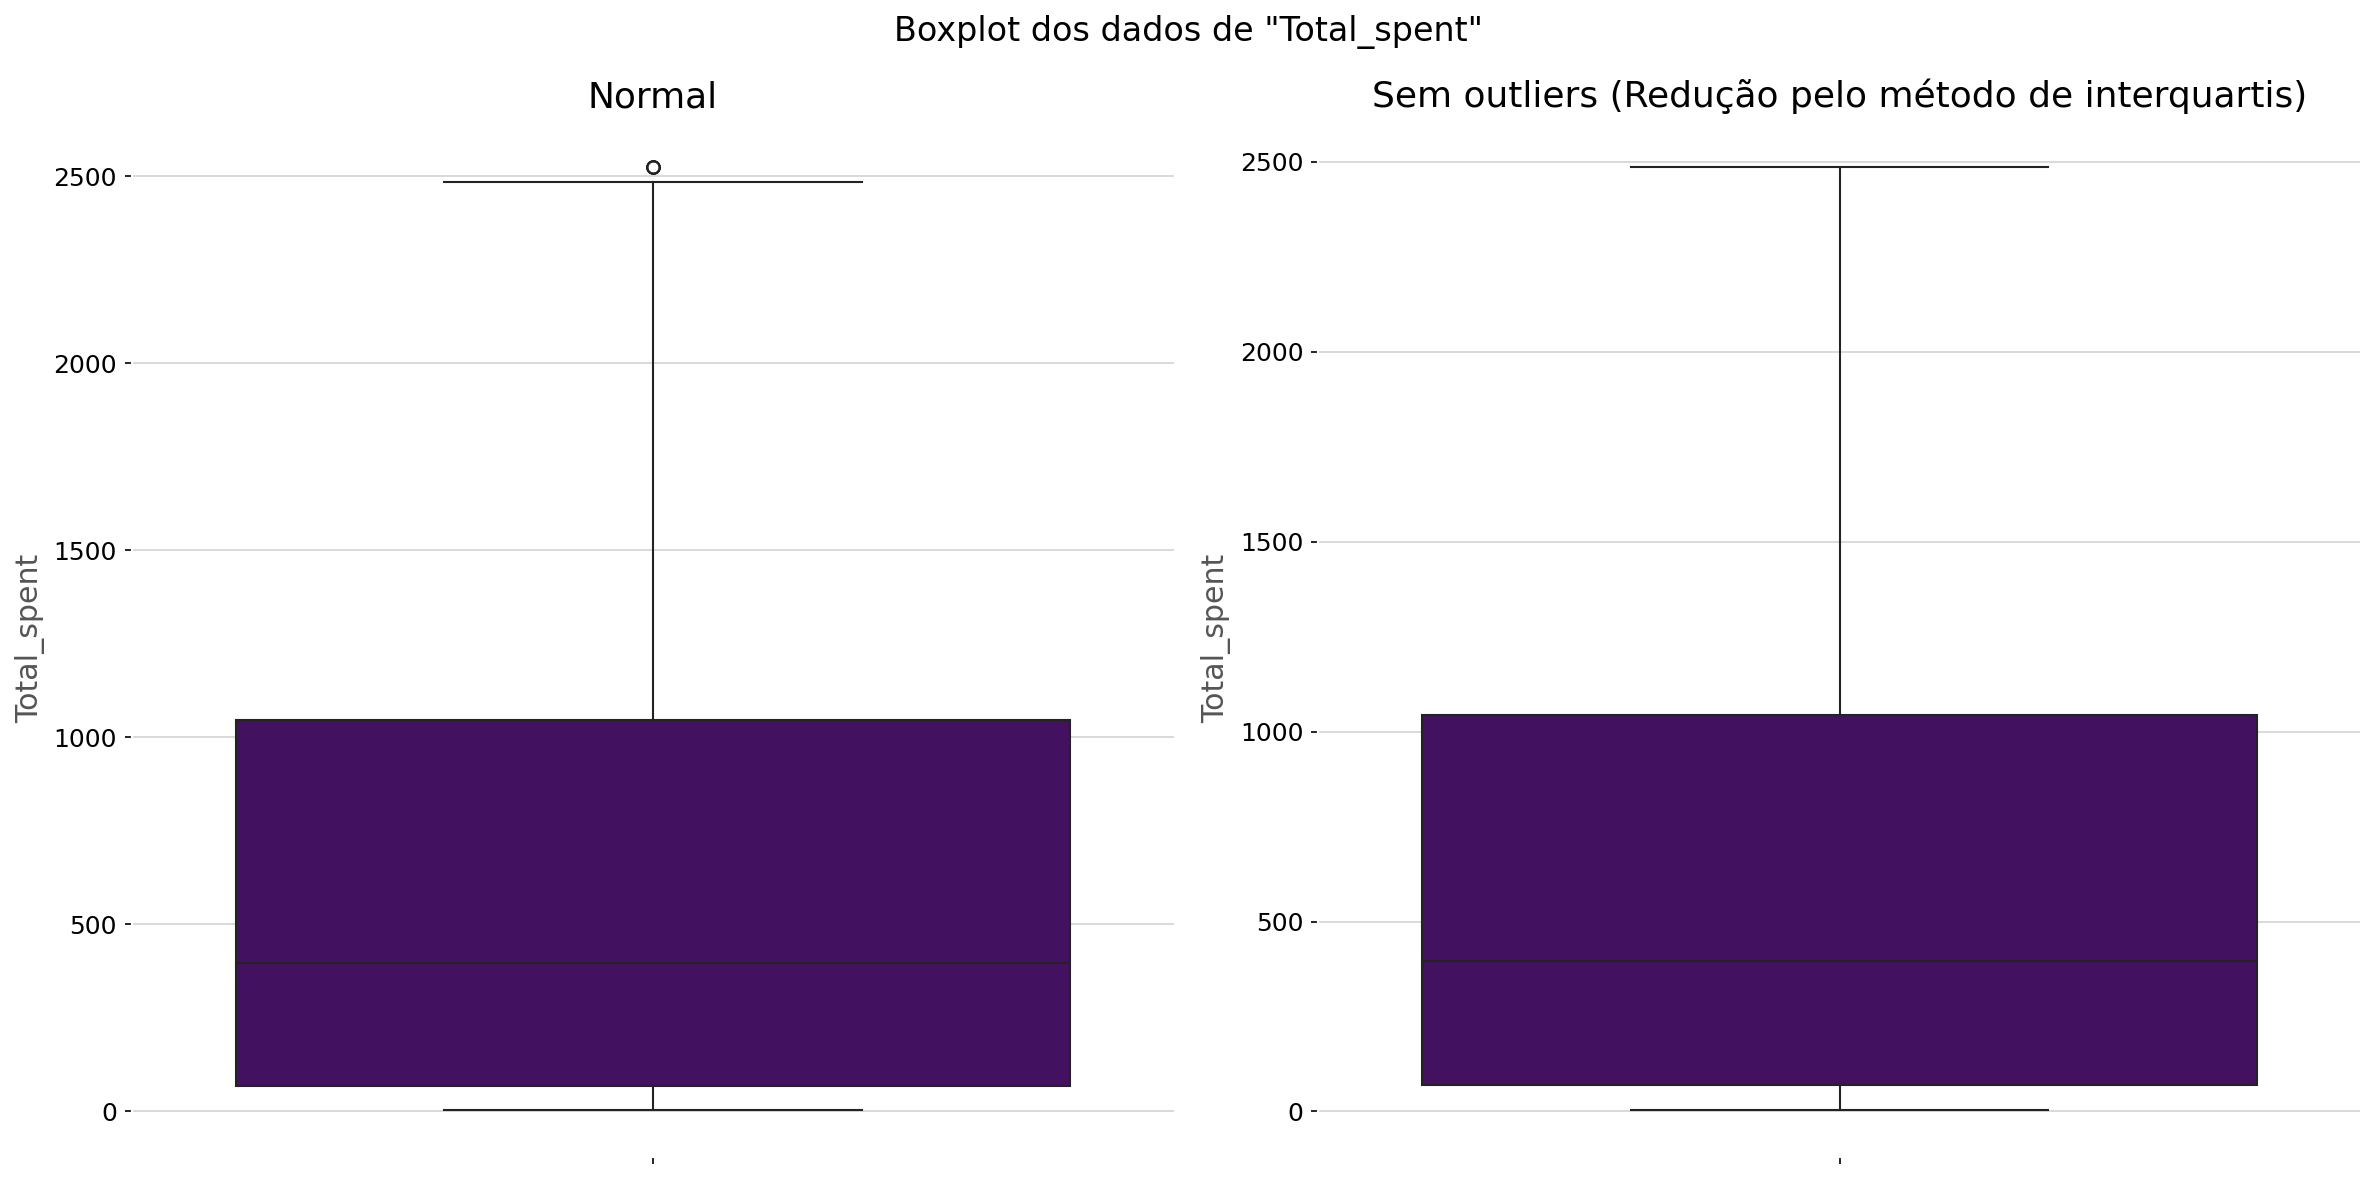

-----------------------------------------------------------------------------------------------------------------------------


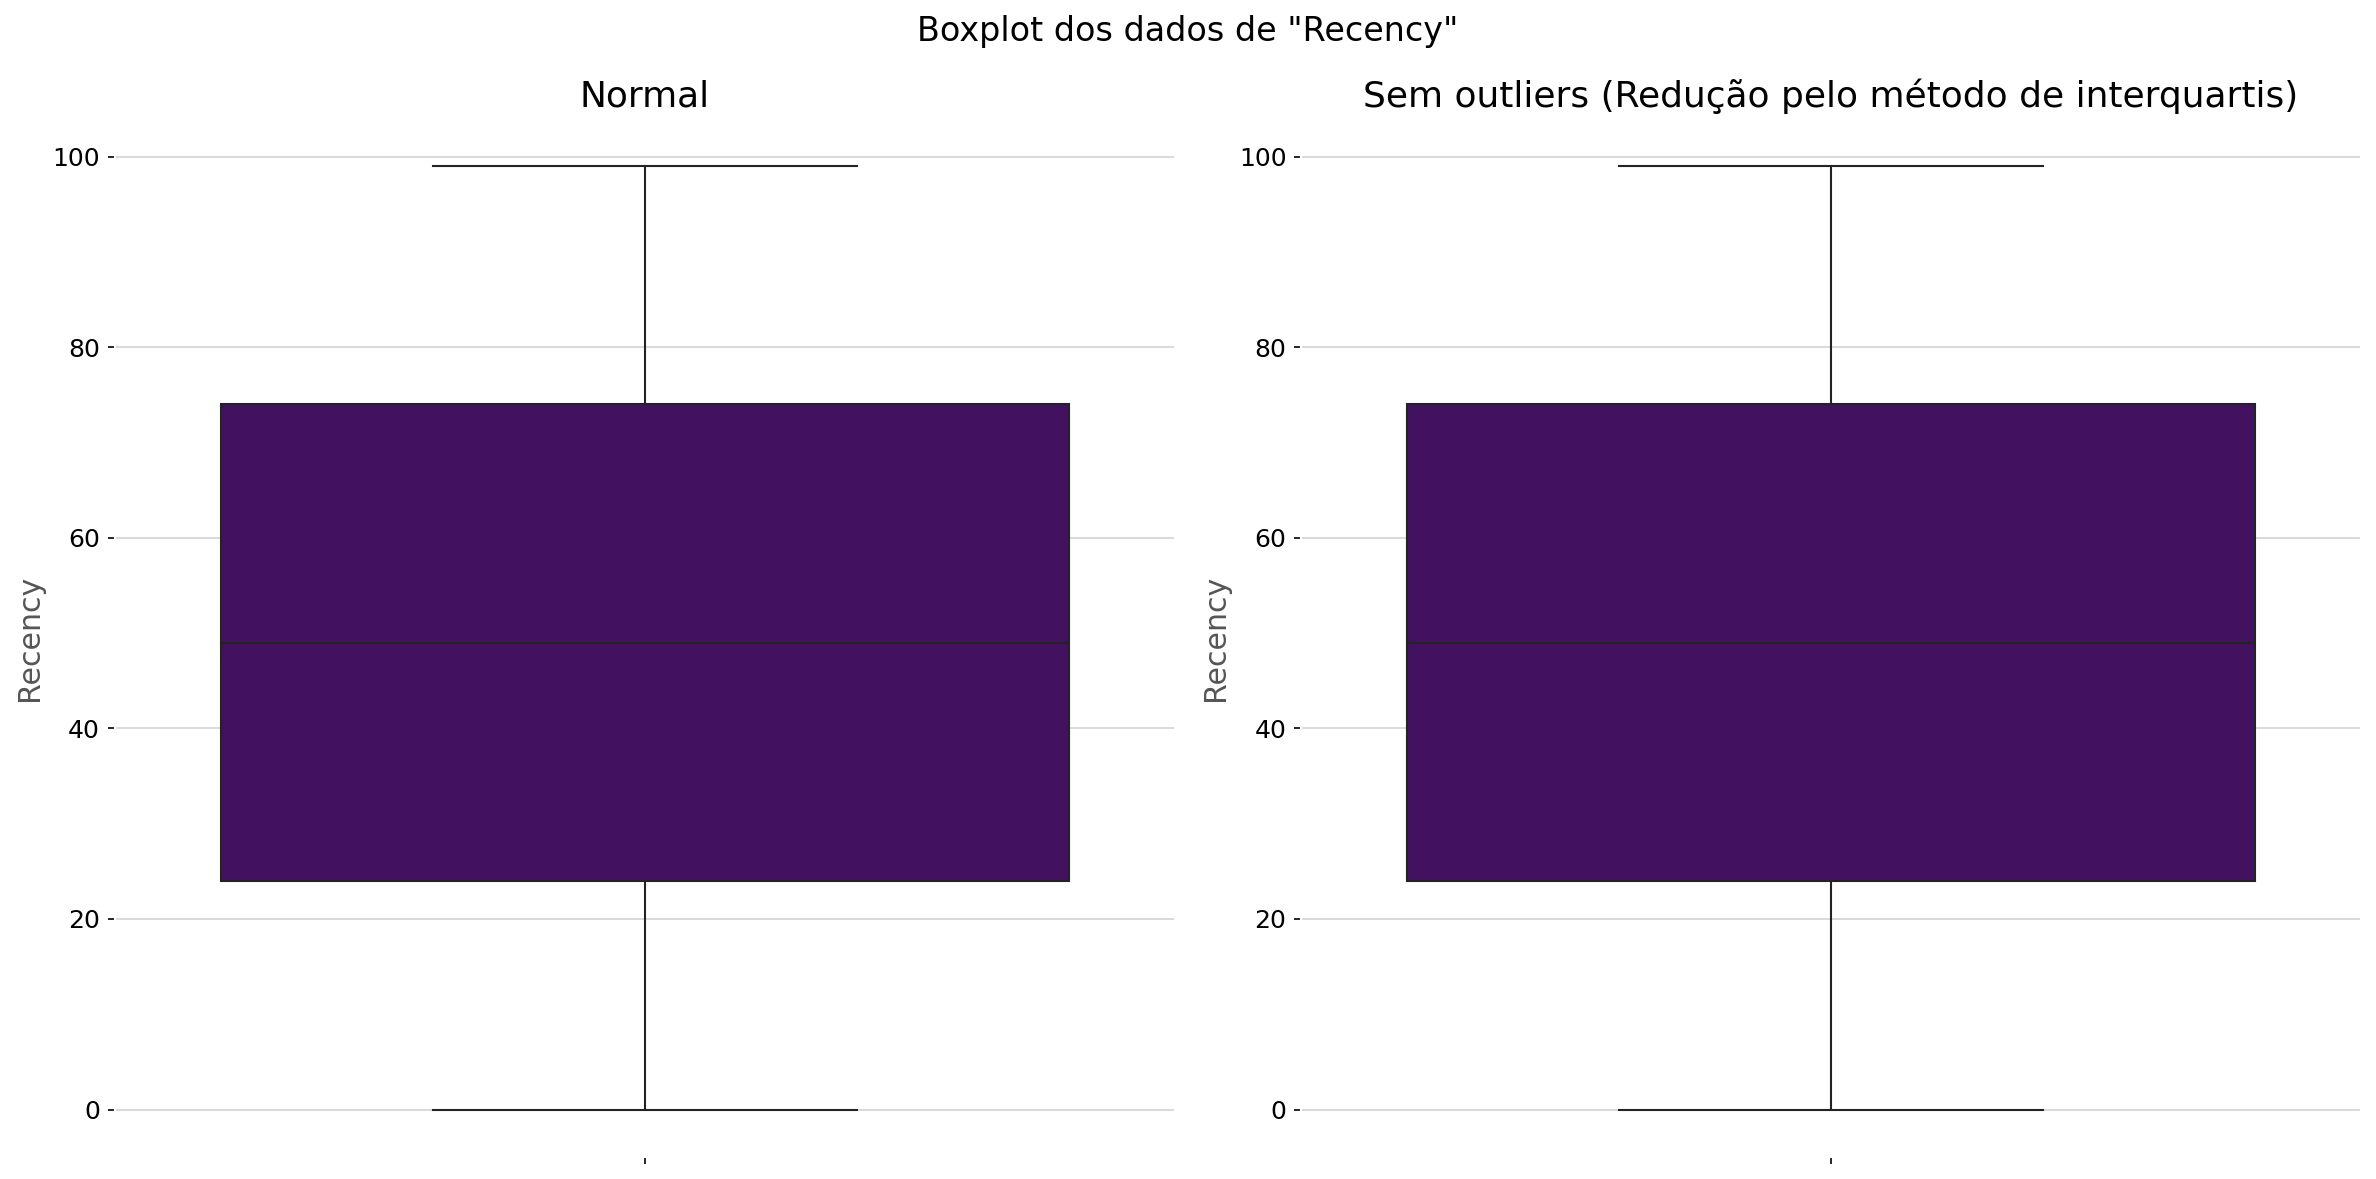

-----------------------------------------------------------------------------------------------------------------------------


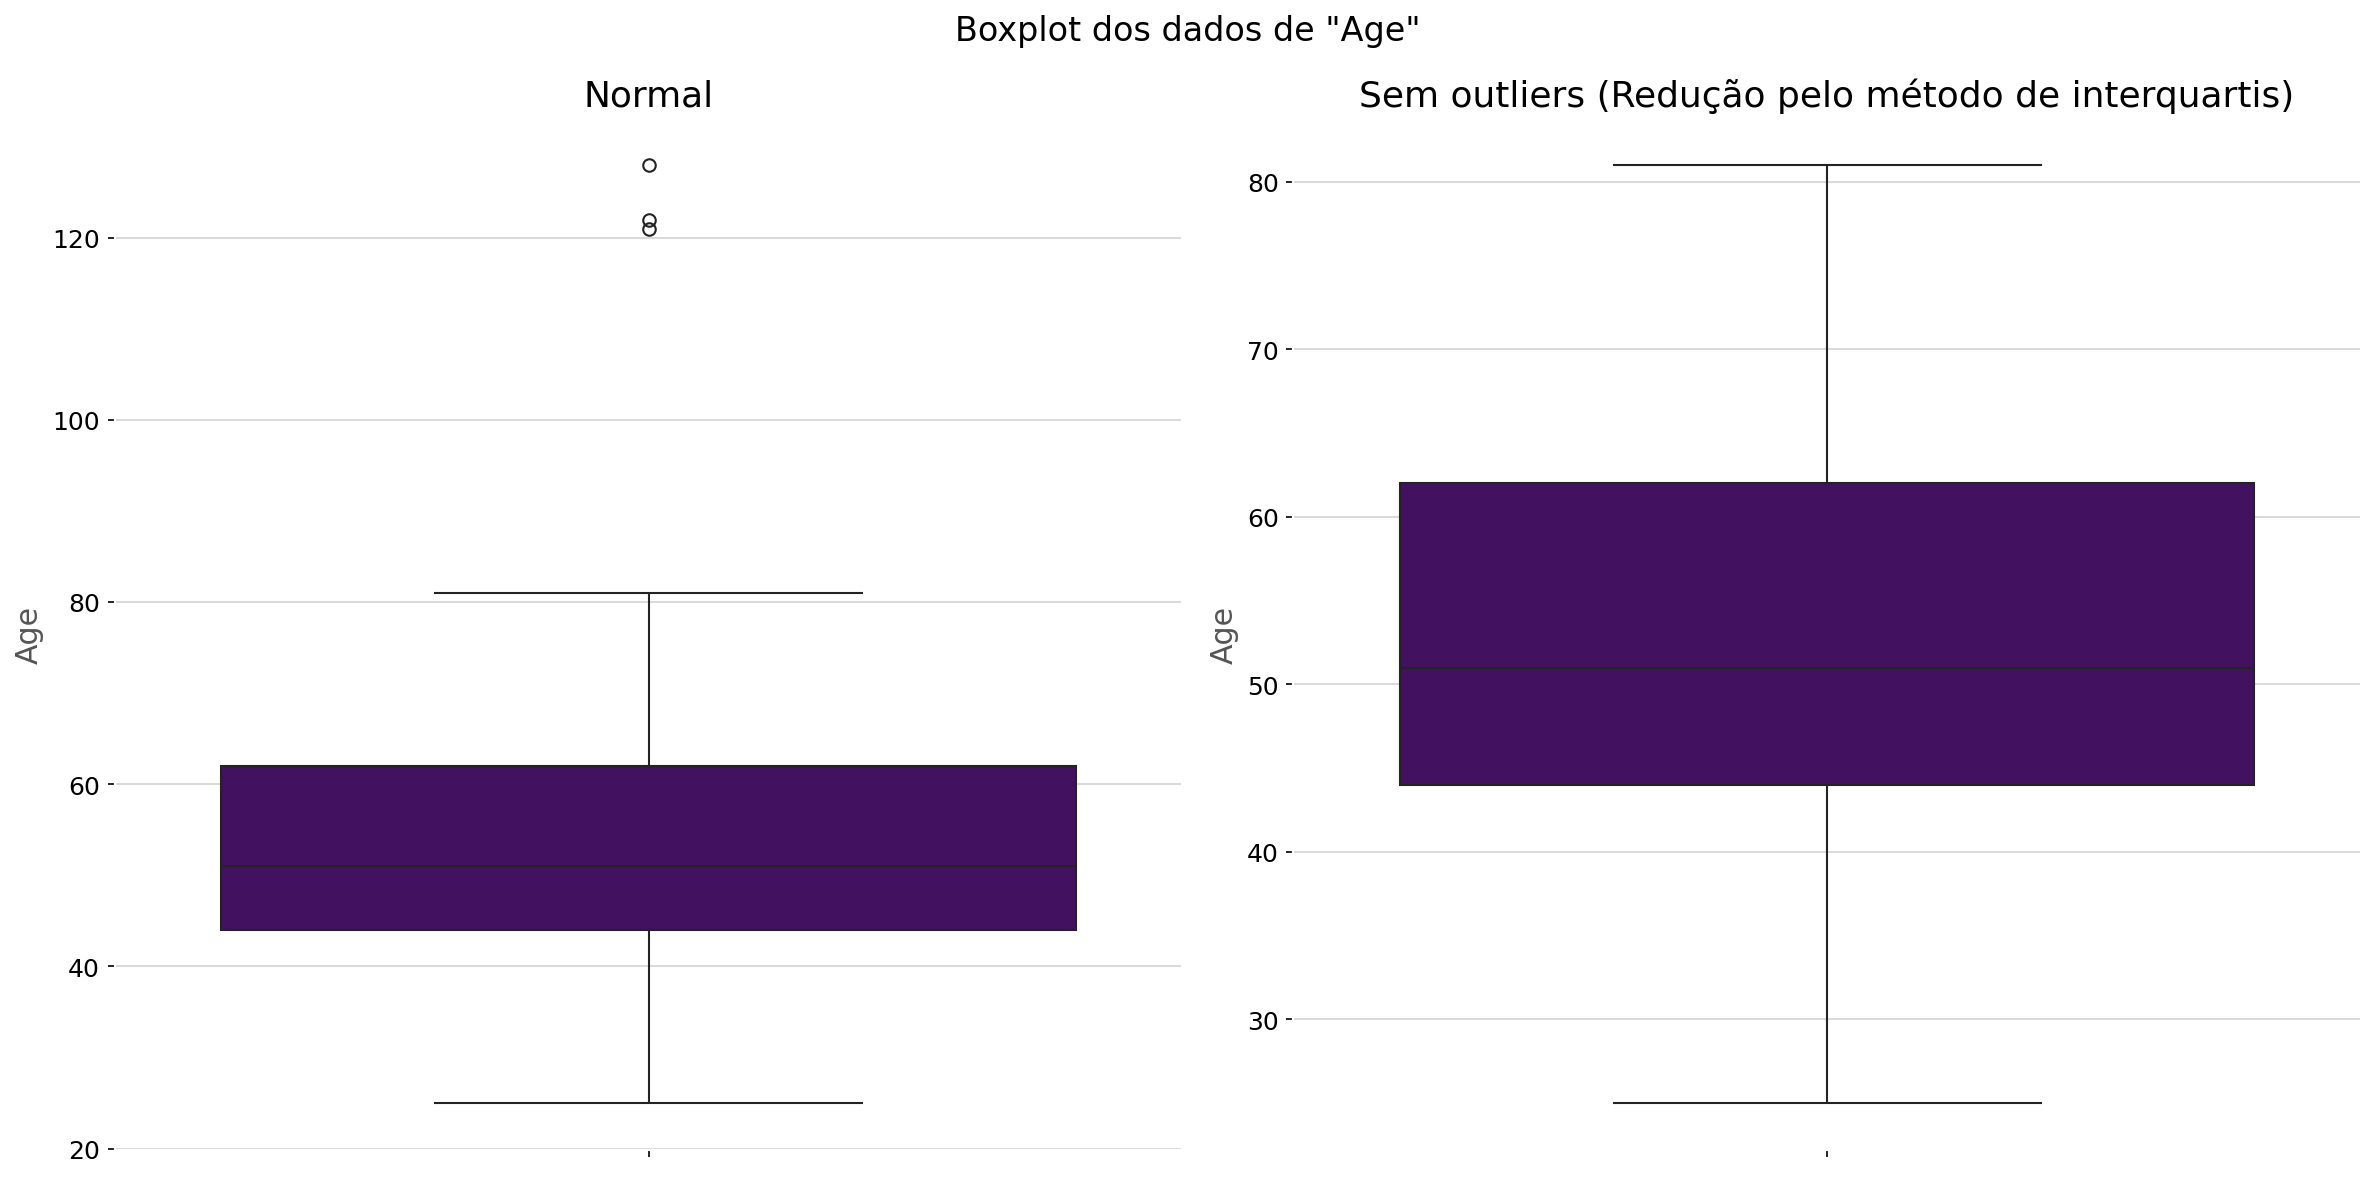

-----------------------------------------------------------------------------------------------------------------------------


In [12]:
boxplot_outliers(df_feature, lista_num)

**Conclusões sobre os outliers**:

A maioria das colunas apresentam o caso de outliers gerados pela **variação natural dos dados**, no qual representam fatores importantes que **não devem ser desconsiderados** para uma segmentação efetiva dos dados.

* As colunas abaixo foram consideradas como **erros de medição ou ocorrências raras**, assim sendo **removidas** do conjunto de dados.
    * *Income*, um ponto discrepante acima dos **600.000\\$**
    * *Age*, com valores de idade superiores à **120 anos**


In [13]:
df_feature_no_out, df_feature_cat_no_out = filter_outliers(df_feature,verbose=True)
df_feature_cat_no_out.head()

A remoção de outliers reduziu os dados em 0.5% (11 clientes)


Education   Income  Kidhome  Teenhome    Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0    2 Meses       635         88   
1      Graduate  46344.0        1         1    2 Meses        11          1   
2      Graduate  71613.0        0         0      1 Mes       426         49   
3      Graduate  26646.0        1         0      1 Mes        11          4   
4  Postgraduate  58293.0        1         0  > 3 Meses       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Response  Promos_Total         Age  Dependants  Has_minor  Partner  \
0         1             0      Idosos           0          0        1   
1         0             0      Idosos           2          1        1   
2         0             0  Meia-idade           0          0        1   
3         0             0     Adultos           1          1        1   
4         0             0     Adultos           1          1        0   

   House_members  Income_per_members  Total_spent  
0              2             29069.0         1617  
1              4             11586.0           27  
2              2             35806.5          776  
3              3              8882.0           53  
4              2             29146.5          422  

[5 rows x 31 columns]

## 4.2 Análises bivariadas

Será realizada uma análise de forma gráfica nas relações entre duas features do conjunto de dados.

### 4.2.1 Análises gráficas entre variáveis

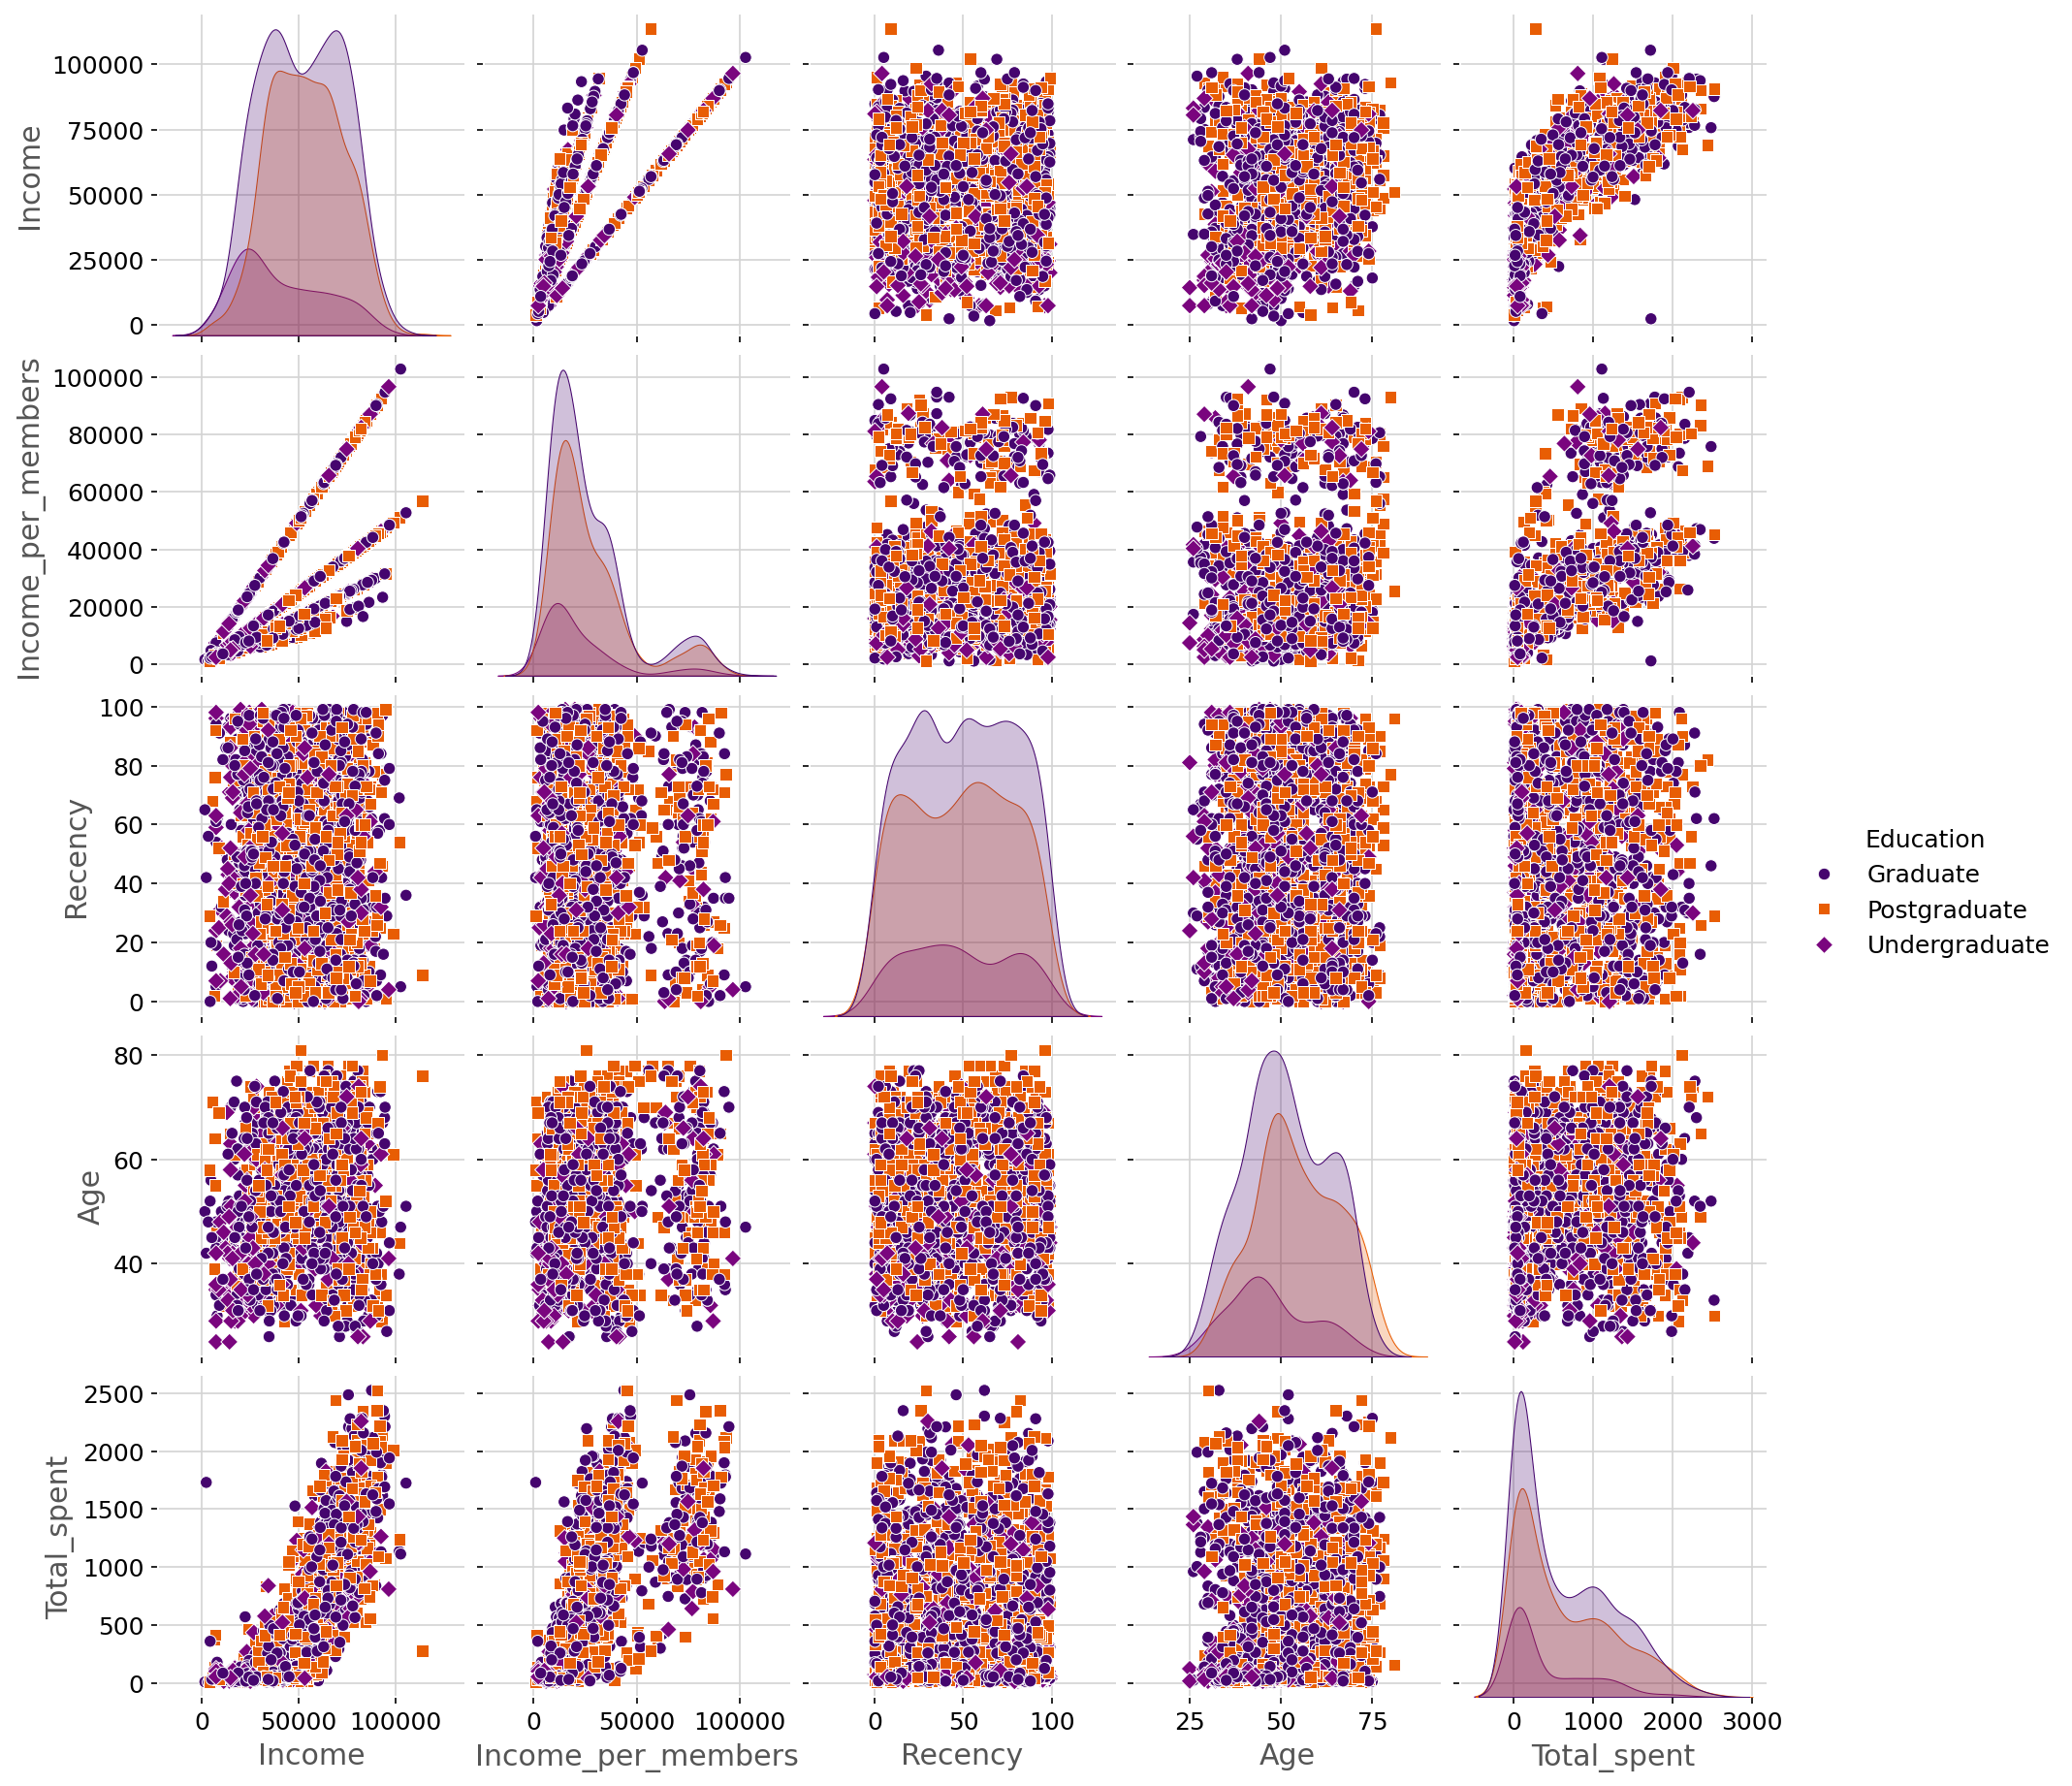

-----------------------------------------------------------------------------------------------------------------------------




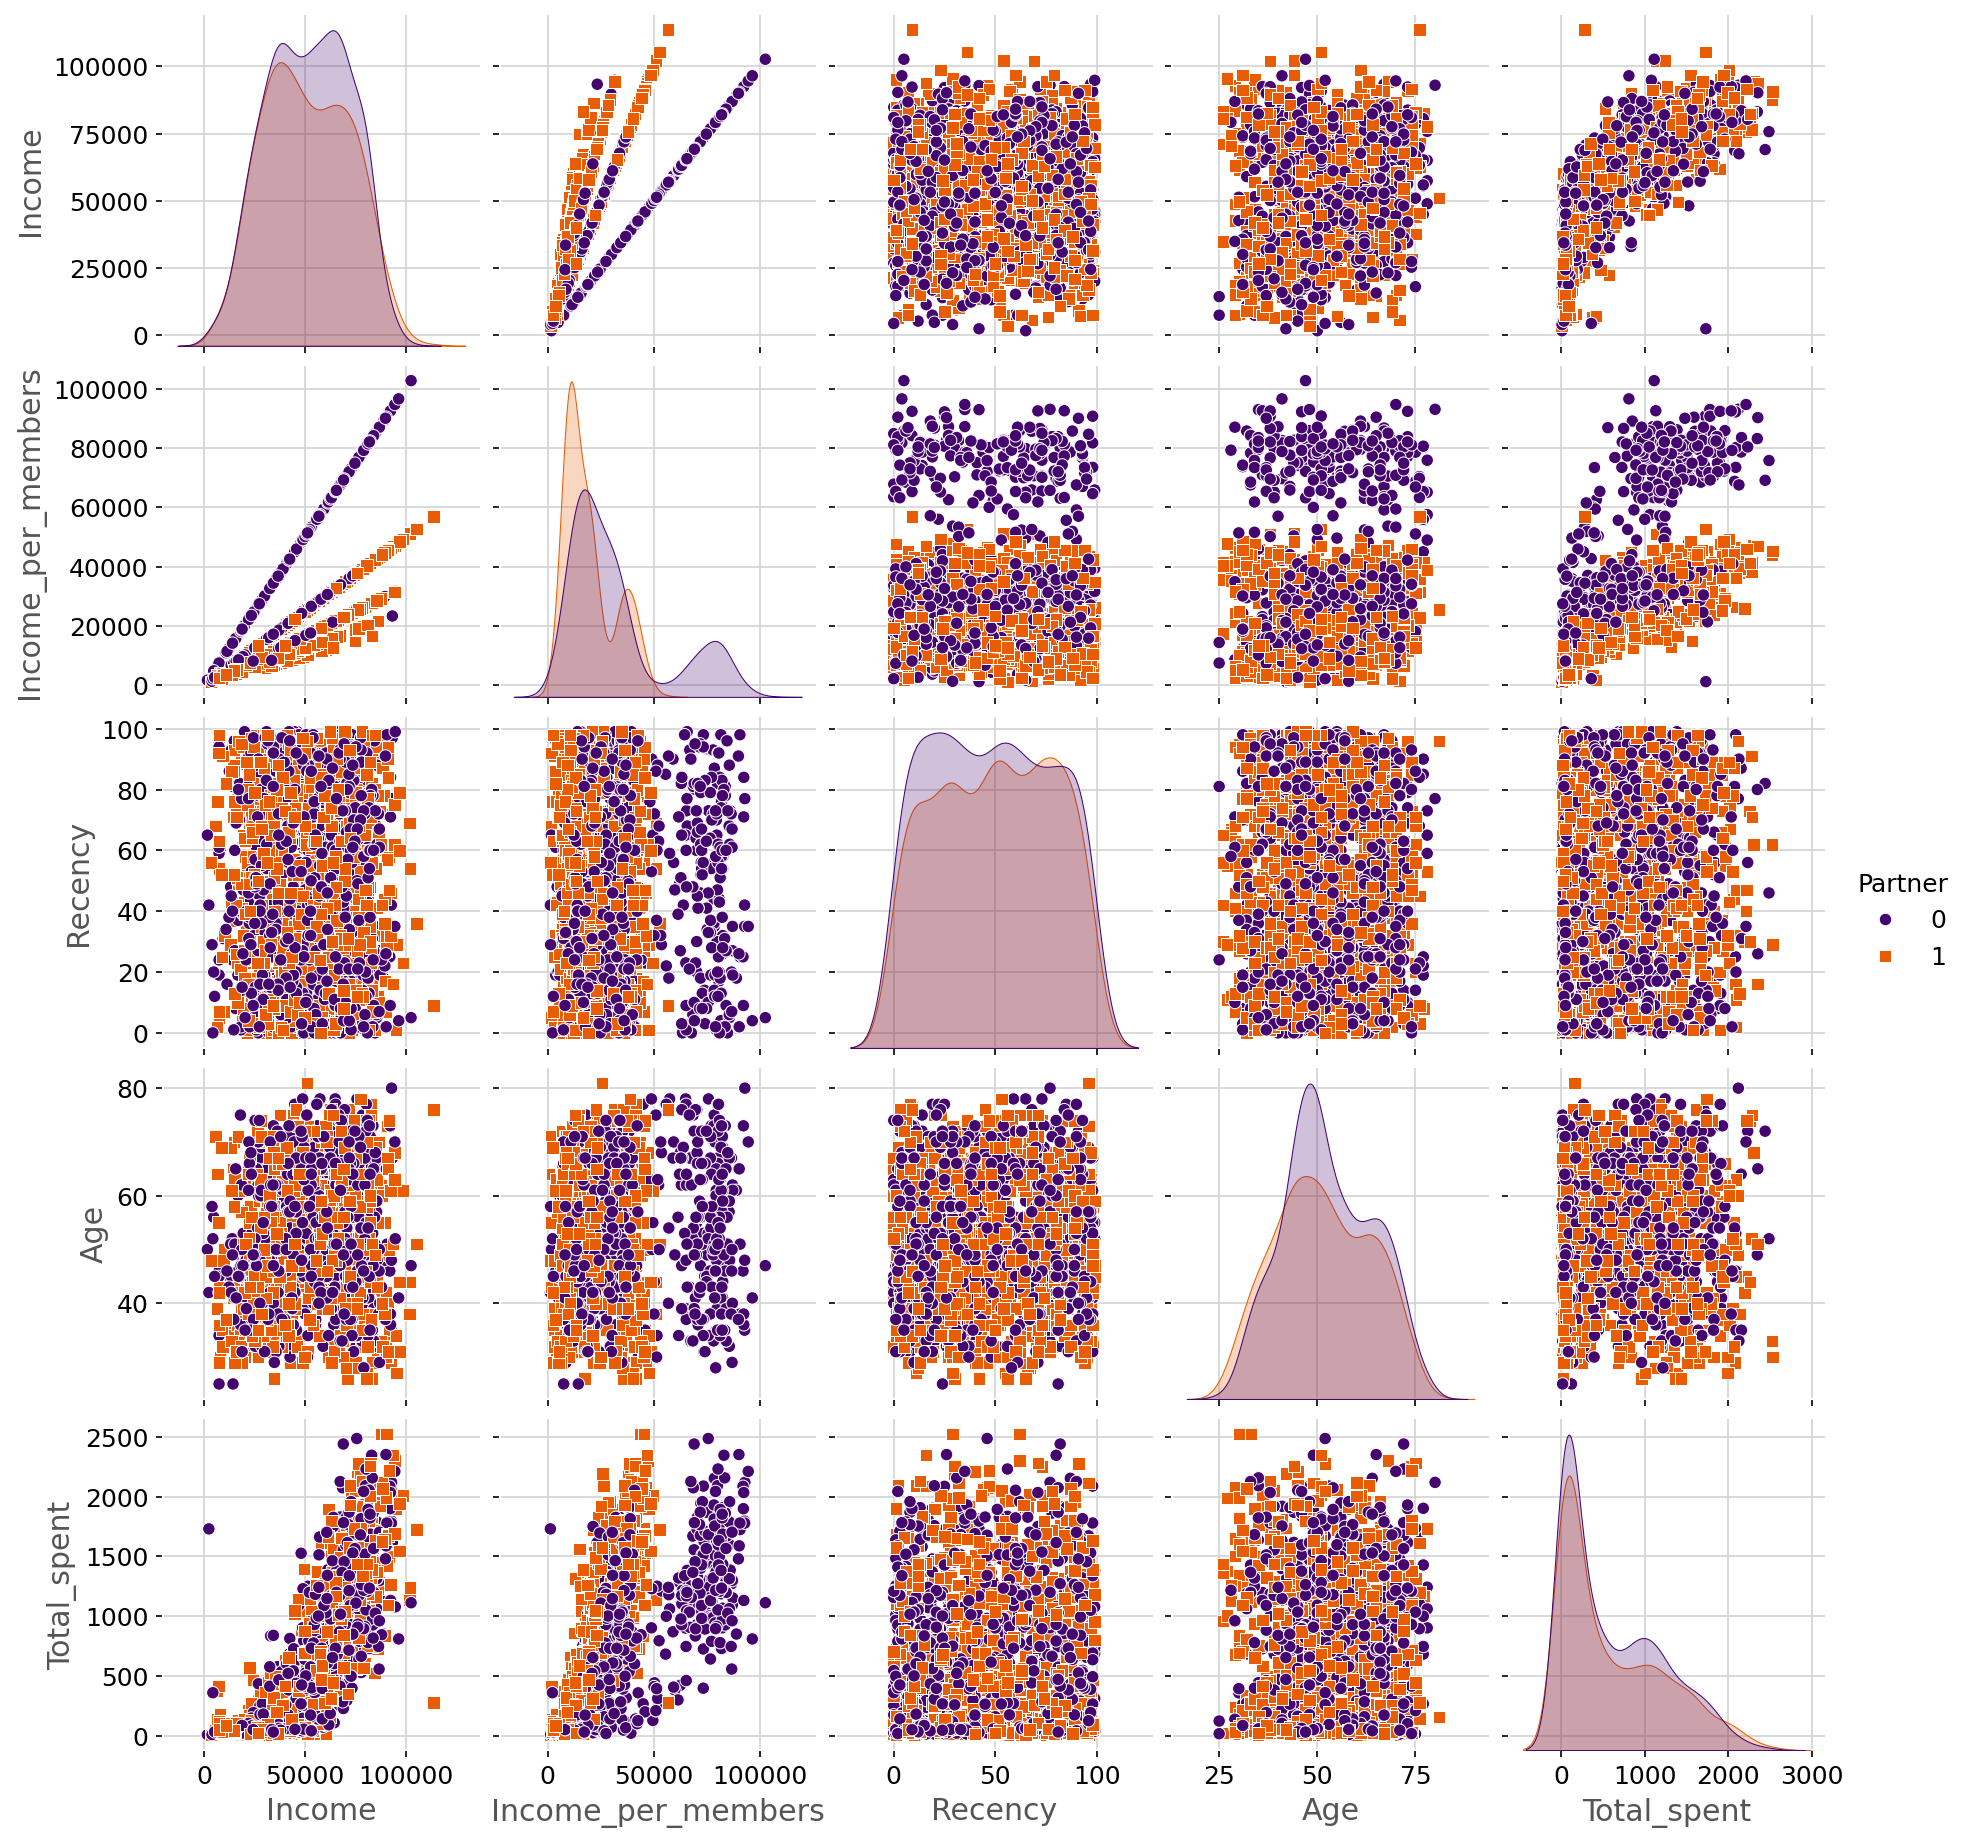

-----------------------------------------------------------------------------------------------------------------------------




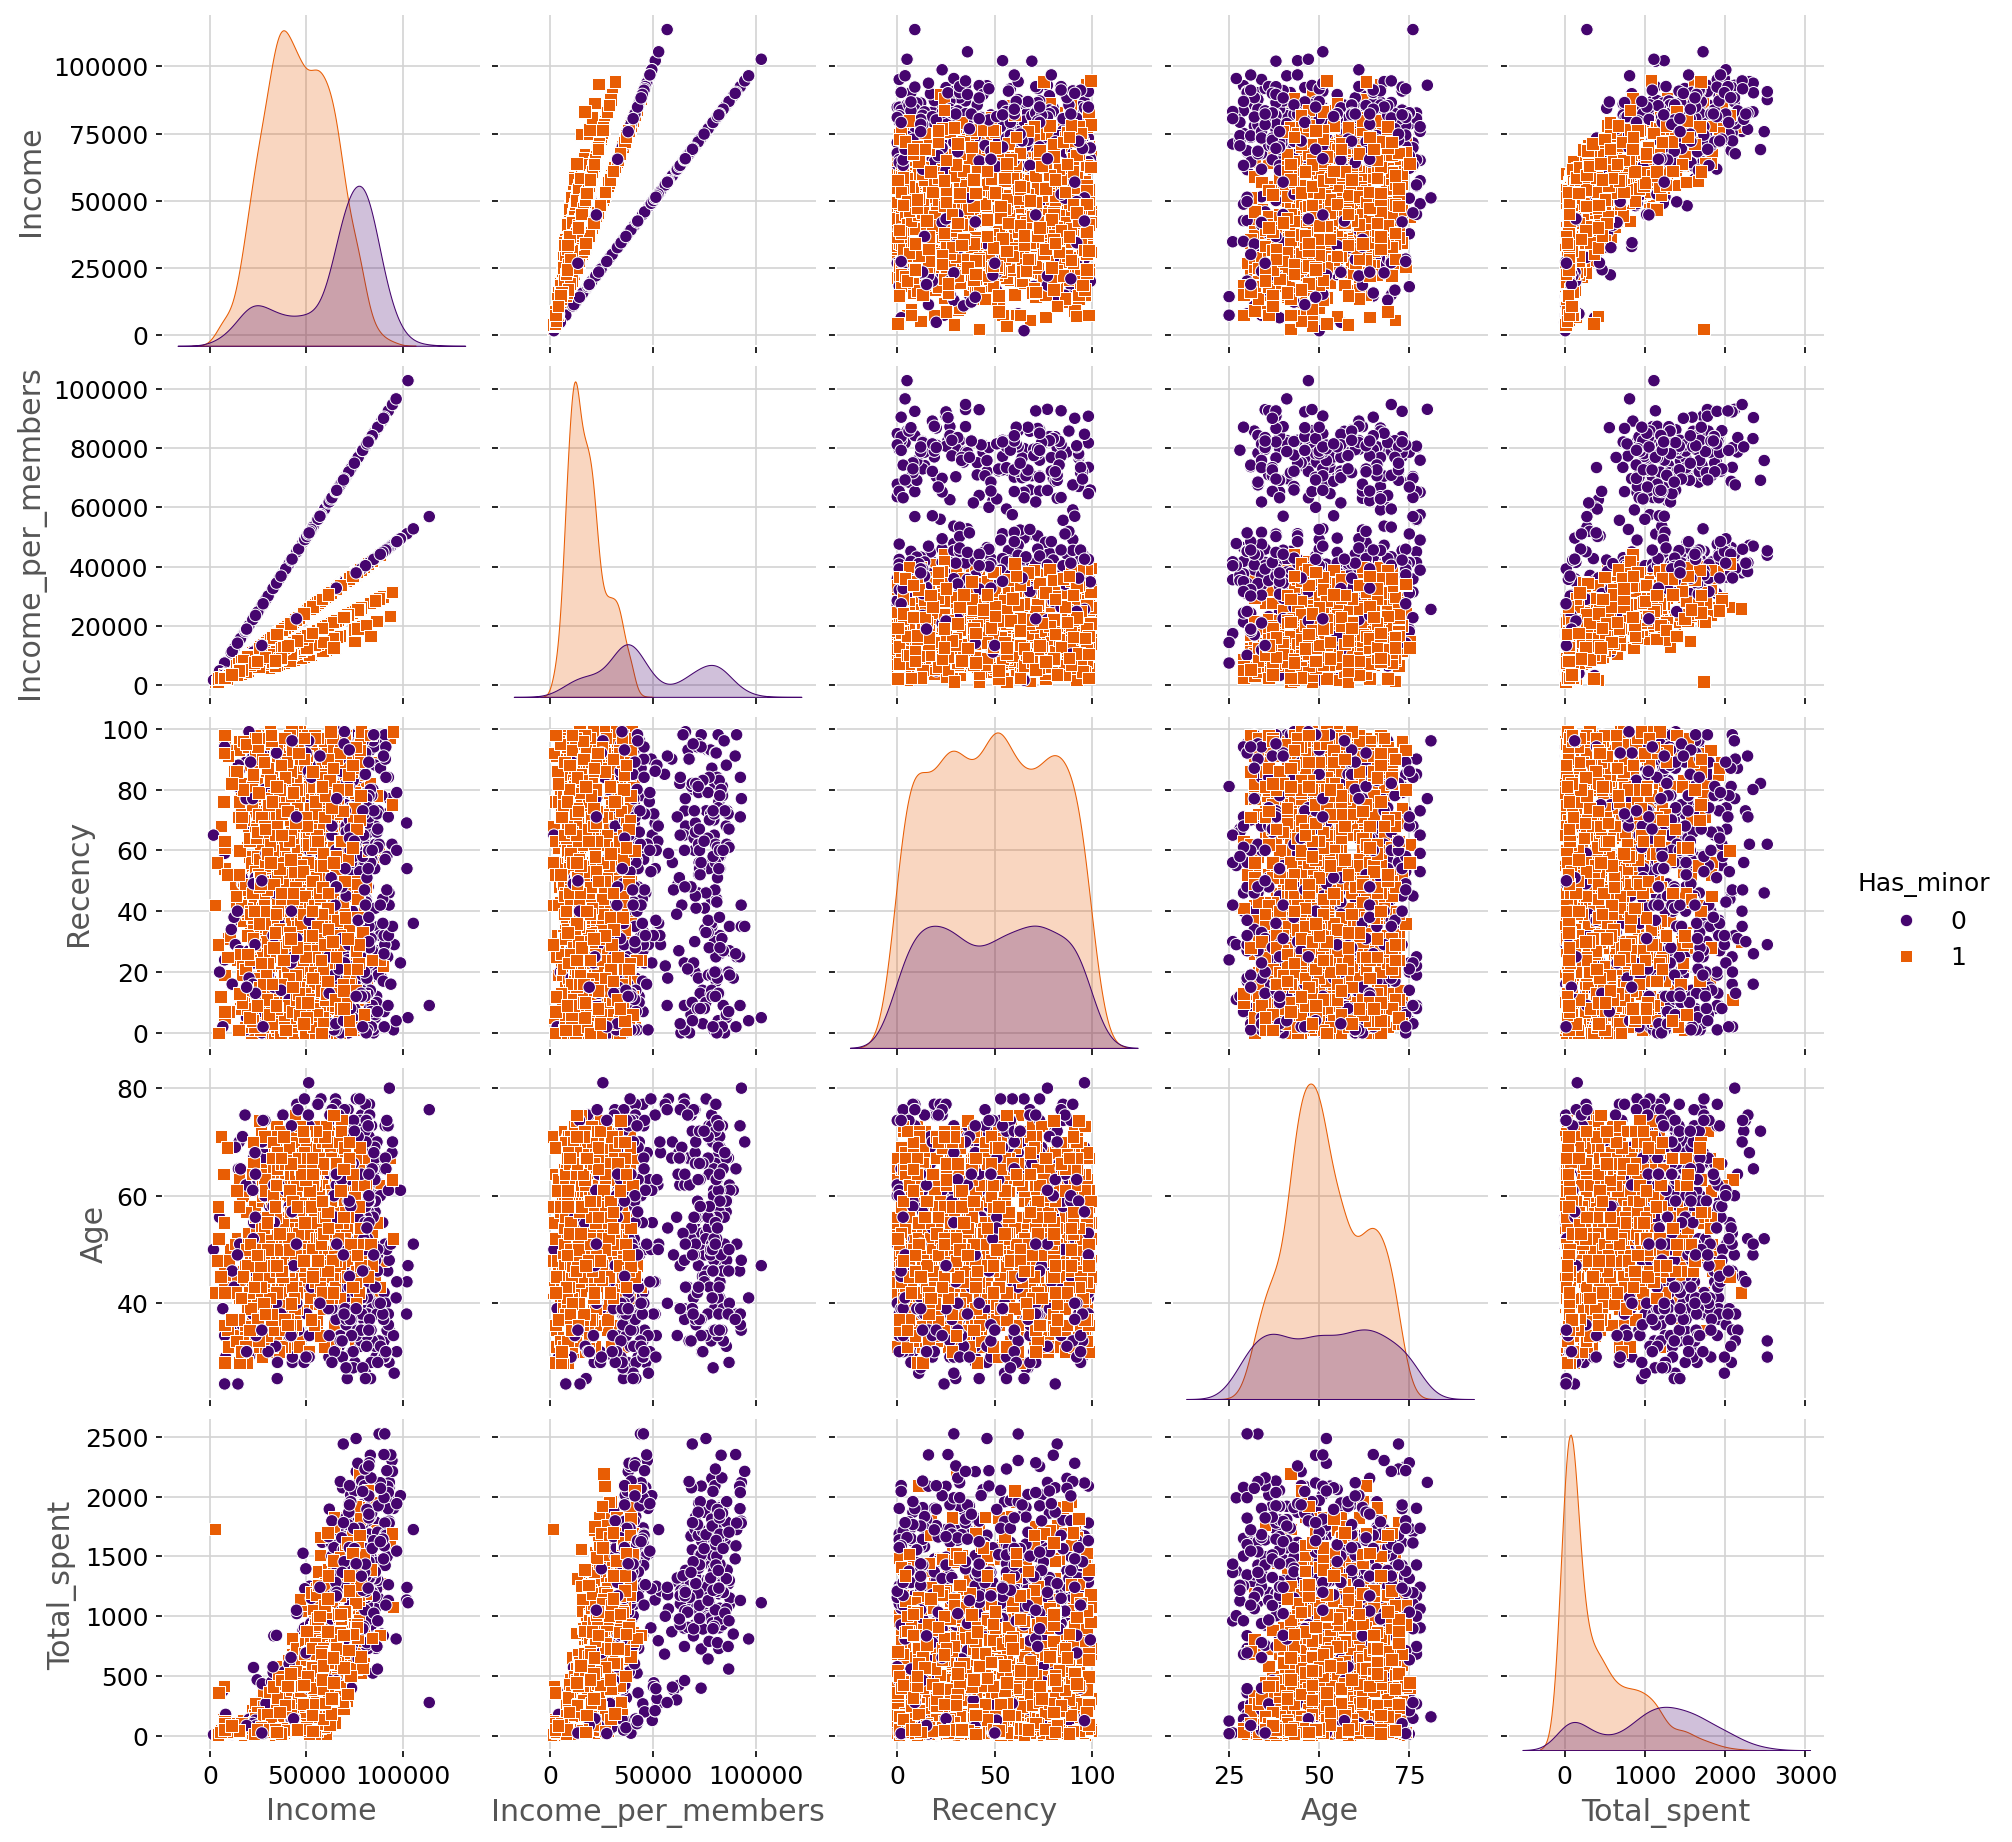

-----------------------------------------------------------------------------------------------------------------------------




In [14]:

x_y = ['Income', 'Income_per_members',
       'Recency','Age', 'Total_spent']

hue_features = ['Education', 'Partner', 'Has_minor']

pairplots(df_feature_no_out,x_y,hue_features)

* Insights
***
1. Para o **nível de escolaridade** análises bivariadas, utilizando o gráfico de disperão, estão mescaladas, não sendo possível afirmar nenhuma diferença significativa entre os grupos de forma visual. Apenas nas análises com o **KDE** (Kernel Density Estimate) é notável as diferenças entre os níveis de escolaridade, em que os graduados, apesar do comportamento similar do KDE, possuem valores de **densidade maiores**, tendo em vista que representam mais de 50% das amostras de dados, com densidades bem próximas dos pós-graduados que representam cerca de 38% dos dados.
***
2. As análises feitas com clientes que **possuem ou não parceiros** são bem próximas em suas densidades e entrelaçadas na maioria dos gráficos de dispersão. A diferença que podem ser destacada é o **salário per capita atinge valores maiores** com uma maior frequência para os que **não possuem parceiros**.
***
3. Também foram analisados os clientes que **possuem ou não um menor de idade** em sua residência, em que foram notadas diferenças significativas nas variáveis de renda per capita, similar as distribuições comparando pessoas com ou sem parceiros, e nos gráficos KDE onde suas características podem ser definidas como:
    * **Consumidores sem crianças/adolescentes**: Maiores indices de renda, renda per capita e gastos.
    * **Consumidores com crianças/adolescentes**: As suas idades estão concentradas na faixa entre 40 e 50 anos.

# Análise estatística

In [15]:
df_feature_cat_no_out.head()

Education   Income  Kidhome  Teenhome    Recency  MntWines  MntFruits  \
0      Graduate  58138.0        0         0    2 Meses       635         88   
1      Graduate  46344.0        1         1    2 Meses        11          1   
2      Graduate  71613.0        0         0      1 Mes       426         49   
3      Graduate  26646.0        1         0      1 Mes        11          4   
4  Postgraduate  58293.0        1         0  > 3 Meses       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Response  Promos_Total         Age  Dependants  Has_minor  Partner  \
0         1             0      Idosos           0          0        1   
1         0             0      Idosos           2          1        1   
2         0             0  Meia-idade           0          0        1   
3         0             0     Adultos           1          1        1   
4         0             0     Adultos           1          1        0   

   House_members  Income_per_members  Total_spent  
0              2             29069.0         1617  
1              4             11586.0           27  
2              2             35806.5          776  
3              3              8882.0           53  
4              2             29146.5          422  

[5 rows x 31 columns]

In [16]:
cat_stat_columns = ['Education','Kidhome',
                    'Teenhome','Recency','Complain',
                    'Response','Promos_Total','Age','Partner']

num_stat_columns = ['Income','MntWines','MntFruits','MntMeatProducts',
                    'MntFishProducts','MntSweetProducts','MntGoldProds',
                    'NumDealsPurchases','NumWebPurchases',
                    'NumCatalogPurchases','NumStorePurchases',
                    'NumWebVisitsMonth','Income_per_members',
                    'Total_spent']

## Variáveis numéricas (Correlação de pearson)

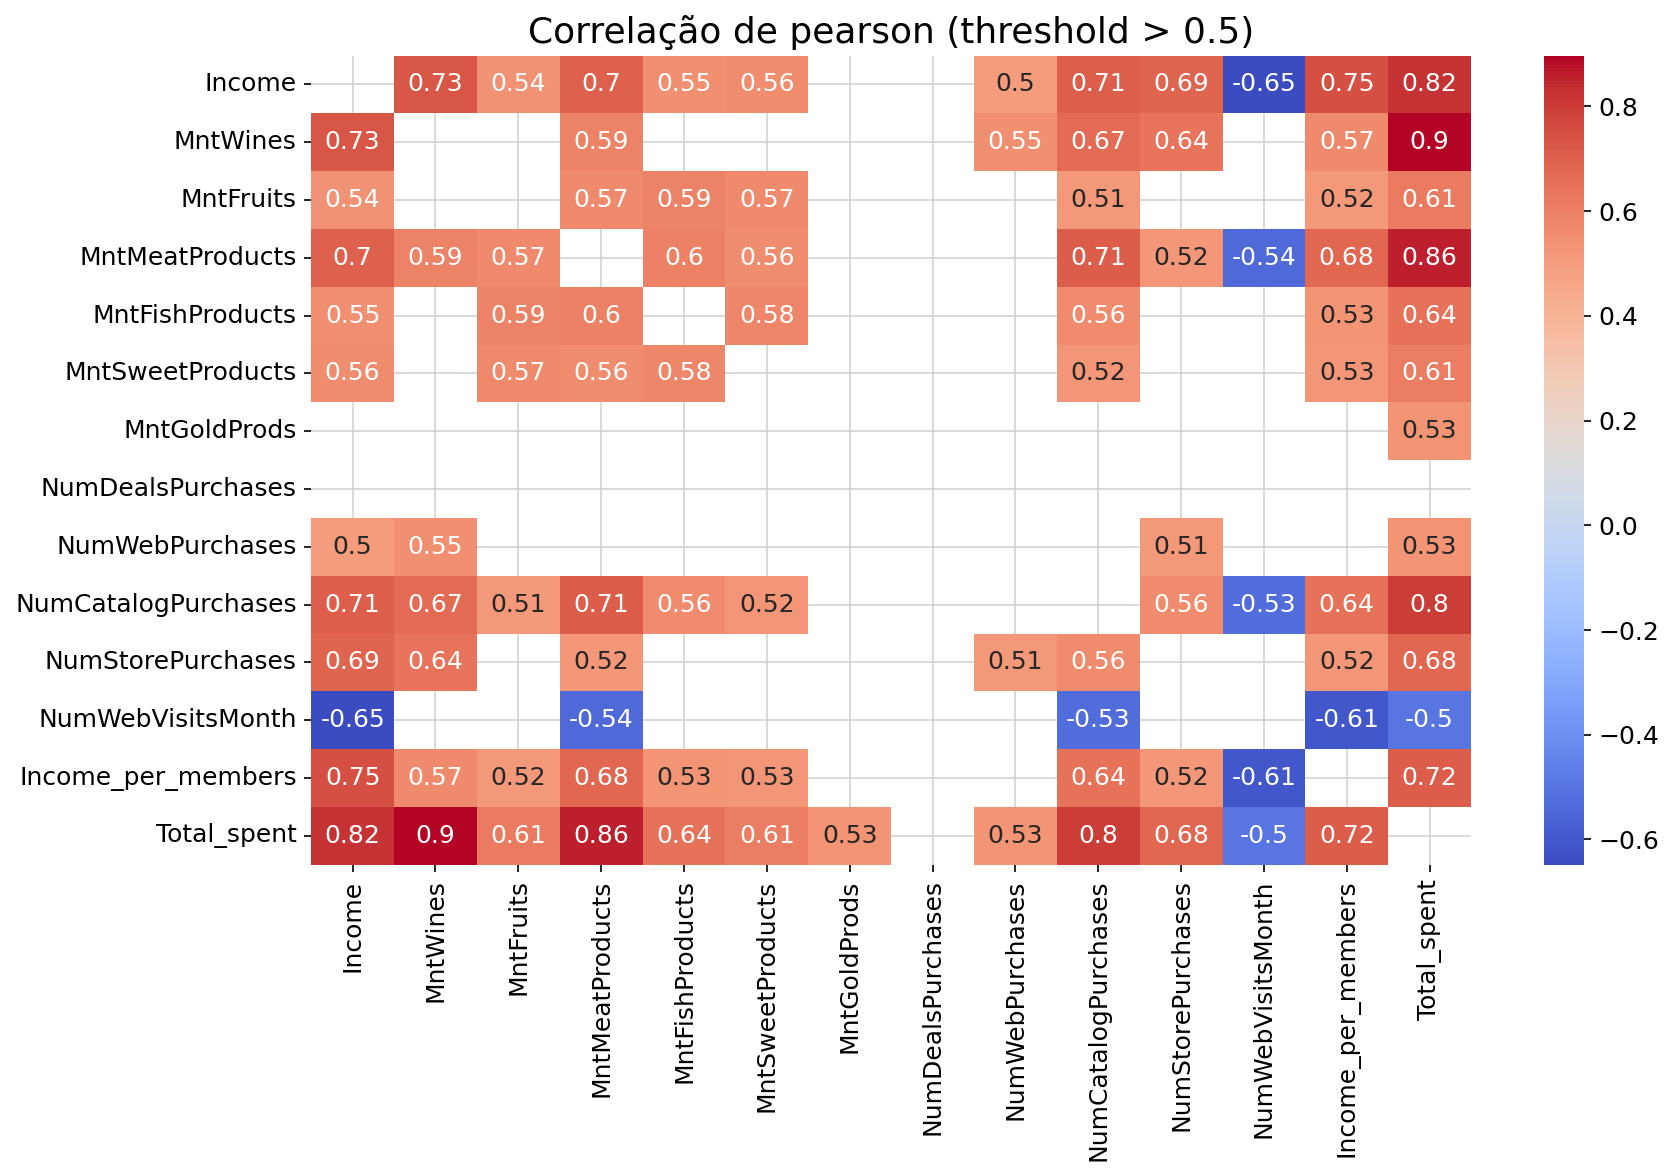

In [17]:
correlation_plot_EDA(df_feature_cat_no_out,
                     num_stat_columns,threshold=0.5)


- O número de visitantes no último mês ao site possuem uma correlação
    negativa (inversamente relacionados) à renda, renda per capita, e total gasto. Assim como a compra de carnes e em catálogos.

- O valor total gasto tem uma correlação forte em relação à compra de vinhos, carnes e em catálogos.


- A compra de carnes e as compras feitas em catálogos também possuem alta correlação.


- A compra de vinhos têm correlação média/forte com as compras na loja física e em catálogos.

## Variáveis categóricas (Chi-squared)

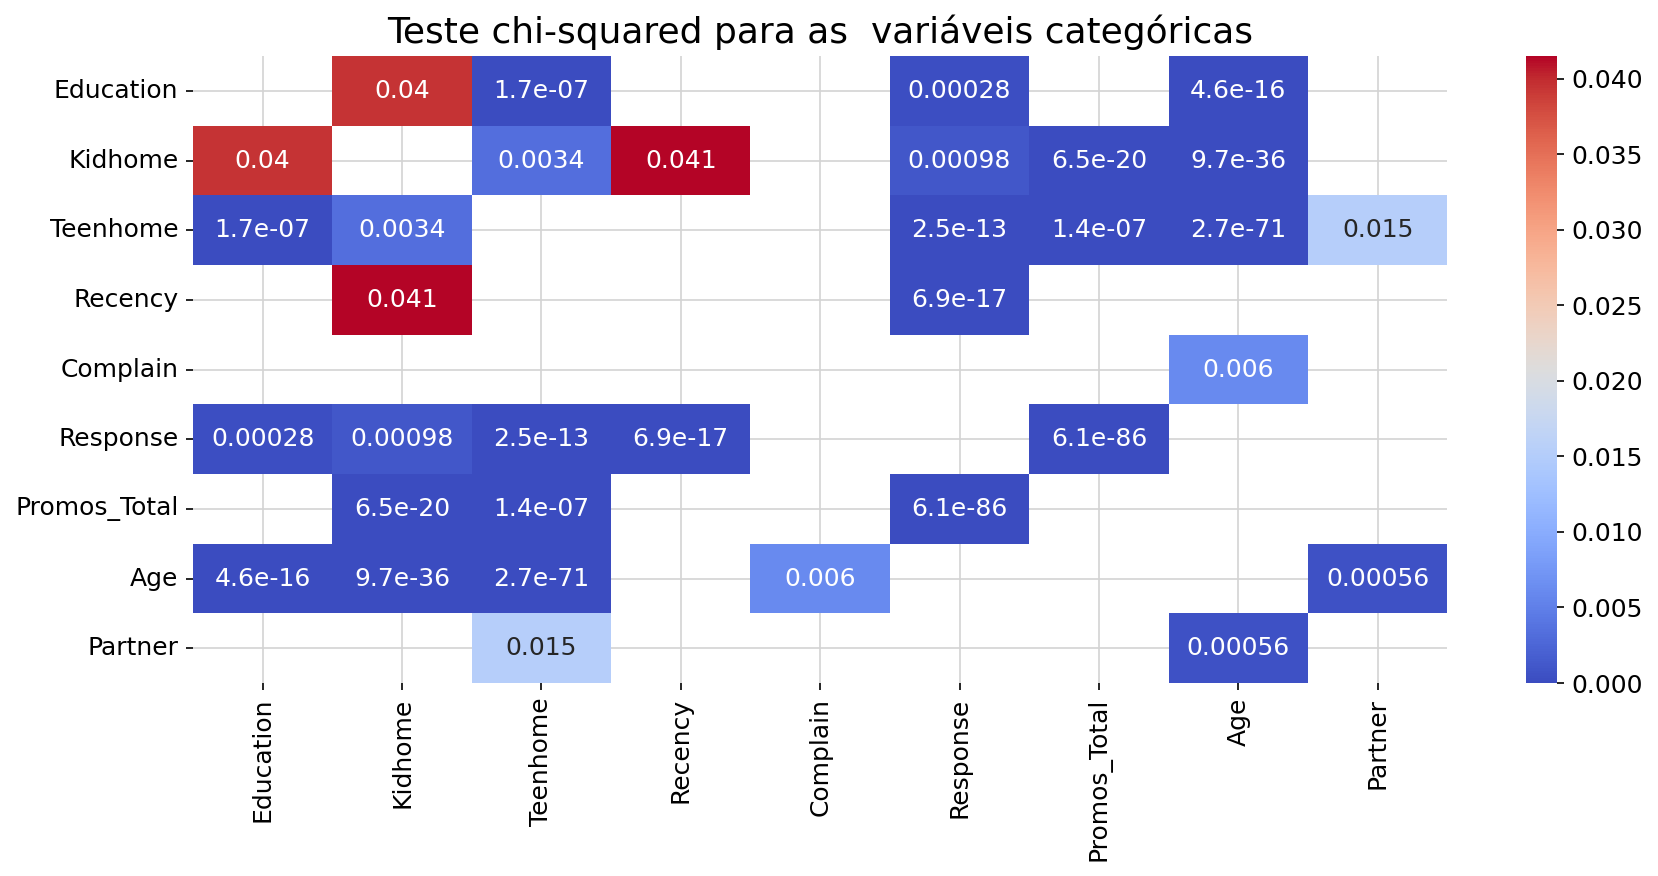

In [18]:
chi2_heatmap(df_feature_cat_no_out,
             cat_stat_columns)

Os valores representados são os **valores p** que ficaram abaixo do threshold de $p = 0.05$, indicando que há uma associação significativa entre as variáveis.

Em termos de negócio as associações mais relevantes são:

- Recency: A variável que está associada a quão recente o cliente fez a compra é "Response", indicando que a probabilidade de resposta à campanha varia com base em quão recentemente o cliente fez uma compra.

- Complain: As reclamações estão associadas à faixa etária dos clientes. Sendo um indicativo da necessidade da análise das reclamações e apresentar um feedback apropriado para as faixas etárias de forma abrangente.

- Response: Além de "Recency", ela está associada à educação, quantidade de crianças e adolescentes, e principalmente à quantidade de promoções ofertadas. Podemos interpretar que a última oferta que foi aceita pode ter sido influenciada pelo número de ofertas totais anteriores.

## Variáveis Categóricas e numéricas (Anova)

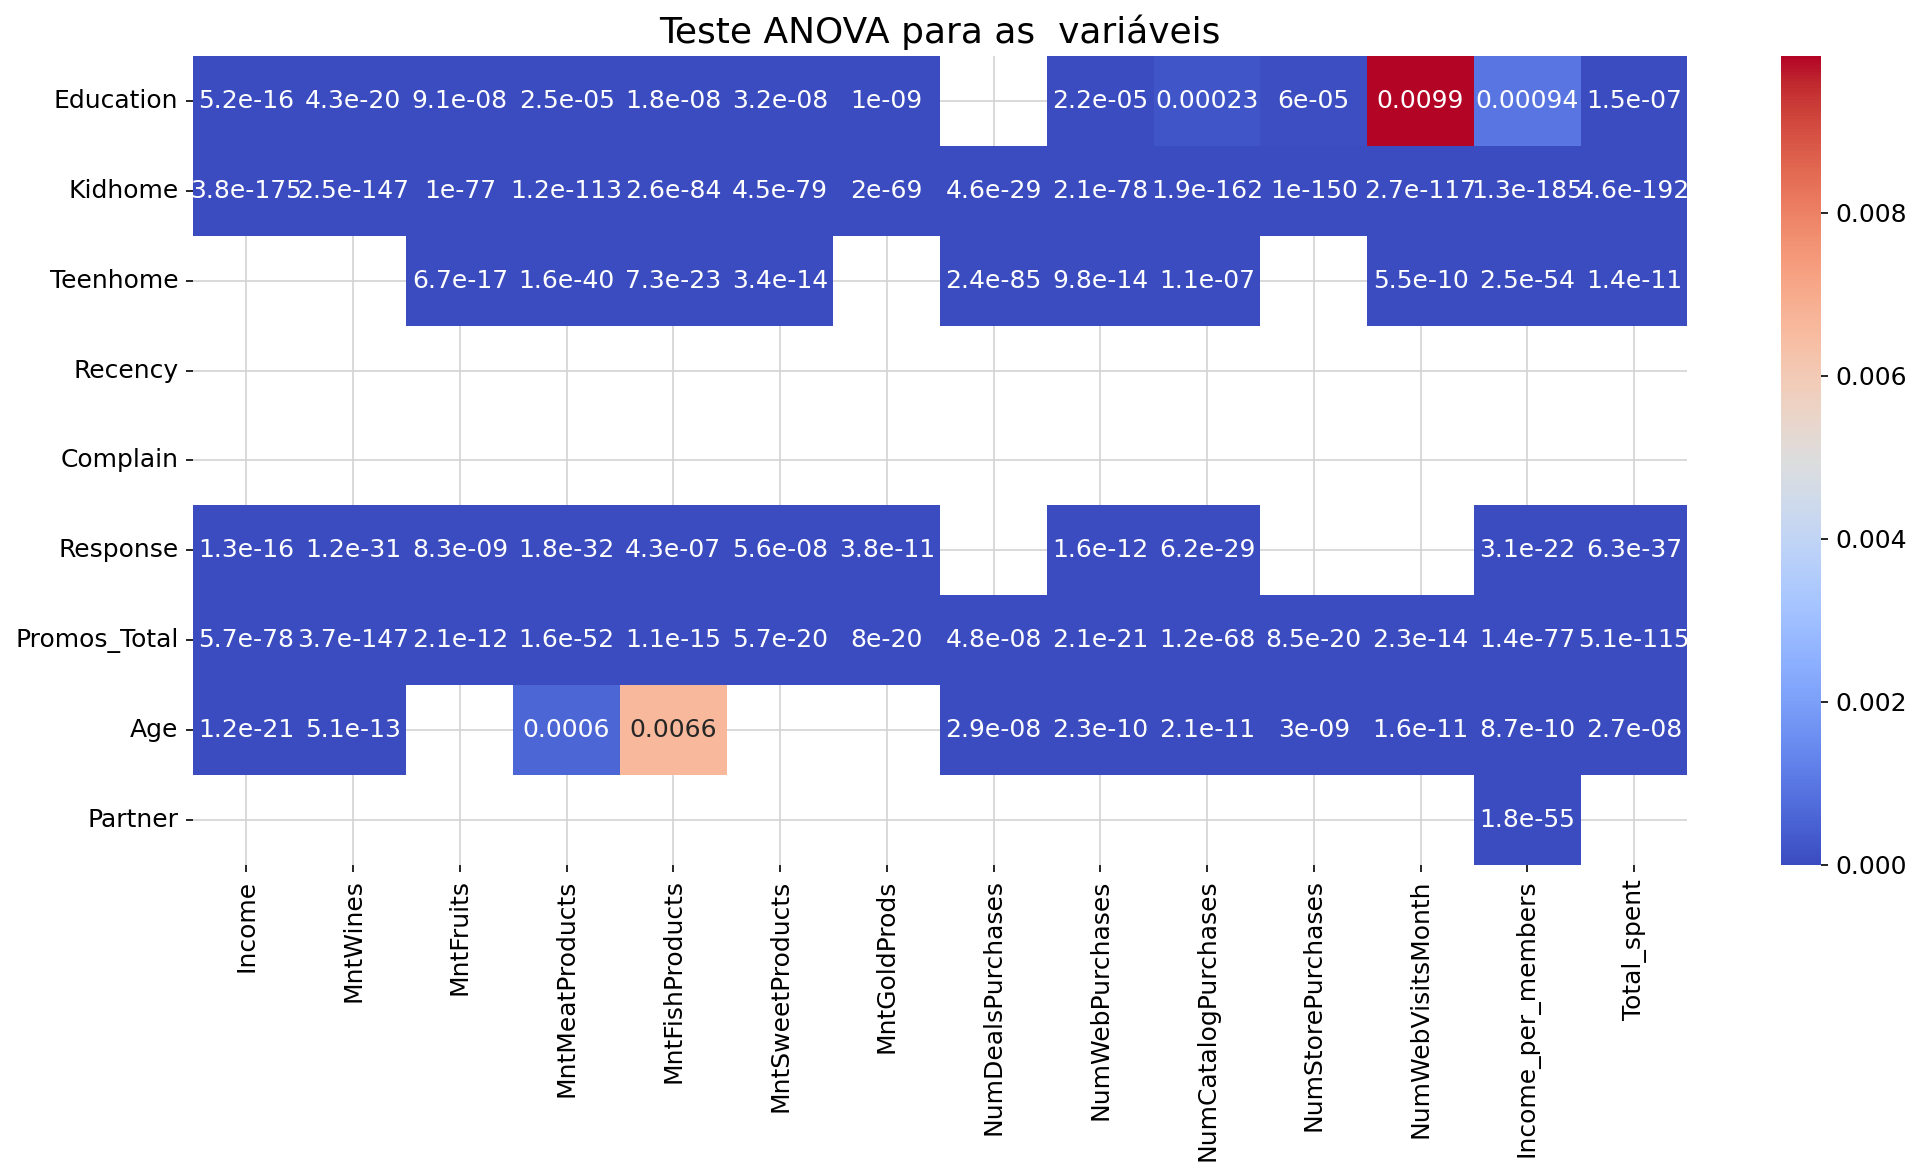

In [19]:
anova_heatmap(df_feature_cat_no_out,
                  num_stat_columns,
                  cat_stat_columns)

Os p-values extremamente baixos sugerem que as variáveis categóricas como Education, Kidhome, Age, Teenhome, Response, e Promos_Total têm um impacto estatisticamente significativo sobre as variáveis numéricas.


# Salvando dos dados pré-processados

In [20]:
path_preprocessed = f'{BASE_DIR}\\data\\processed\\marketing_campaign_processed.csv'
df_feature_cat_no_out.to_csv(path_preprocessed)